<a href="https://colab.research.google.com/github/en-ashay/SSGAN-for-Liver-Tumor-Classification/blob/main/SSGAN_for_Liver_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=e4148d09a145f77d3189afb04170be0bfc5e713e0ee4eeb2ed0dfc007030cd59
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


## Modified code for data processing of MEDMNIST class

In [2]:
!wget https://www.dropbox.com/s/dtp18smzh5o6kq9/dataset_without_pytorch.py

--2023-04-07 18:44:29--  https://www.dropbox.com/s/dtp18smzh5o6kq9/dataset_without_pytorch.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/dtp18smzh5o6kq9/dataset_without_pytorch.py [following]
--2023-04-07 18:44:29--  https://www.dropbox.com/s/raw/dtp18smzh5o6kq9/dataset_without_pytorch.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc190ddacf6be311fd4ff9195907.dl.dropboxusercontent.com/cd/0/inline/B5uHx-q6vivsmvbcxXW_5beCUW3DSdeiW0Eyo1v3gS98yHLx8B7opGsHG2QGsfHTI72WgtfAYirX6i9JYW7PrvSQ_rqkBd4qiqiUbHHUvY0U3NY0vwvgPm4ucysJBdWOg2SWEzddxF0mwlaPjh8W5_kDnRkWV50SwL59J0D1WX3qQg/file# [following]
--2023-04-07 18:44:33--  https://uc190ddacf6be311fd4ff9195907.dl.dropboxusercontent.com/cd/0/inline/B5uHx-q6vivsmvbcxXW_5beCUW3DSdeiW0Eyo1

In [3]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import medmnist
from medmnist import INFO, Evaluator
from keras import backend
import dataset_without_pytorch
from dataset_without_pytorch import get_loader_modifed as get_loader
np.random.seed(42)

In [4]:
def load_data(flag='organcmnist',dist=False,dataset_info=False):
    data_flag=  flag

    download = True

    NUM_EPOCHS = 3
    # BATCH_SIZE = 128
    lr = 0.001

    info = INFO[data_flag]
    task = info['task']
    n_channels = info['n_channels']
    n_classes = len(info['label'])

    DataClass = getattr(dataset_without_pytorch, info['python_class'])
    # load the data
    train_dataset = DataClass(split='train', download=download)
    test_dataset = DataClass(split='test', download=download)
    # encapsulate data into dataloader form
    train_loader = get_loader(dataset=train_dataset)
    test_loader = get_loader(dataset=test_dataset)
    for x, y in train_loader:
        x_new = np.expand_dims(x, axis=-1)
        x_new = x_new.astype('float32')
    # scale from [0,255] to [-1,1]
        x_new = (x_new - 127.5) / 127.5
        
        y_new = np.squeeze(y)
    print(x_new.shape,y_new.shape)

    if dist==True:
        labels = [label for _, label in train_dataset]

        unique_labels, label_counts = np.unique(labels, return_counts=True)

        for label, count in zip(unique_labels, label_counts):
            print(f"Label {label} appears {count} times in the train dataset.")
        
        print("****"*30,'\n')
        labels = [label for _, label in test_dataset]

        unique_labels, label_counts = np.unique(labels, return_counts=True)

        for label, count in zip(unique_labels, label_counts):
            print(f"Label {label} appears {count} times in the test dataset.")
    if dataset_info==True:
            print(train_dataset)
    return [x_new,y_new]

In [5]:
def load_test_data(flag='organcmnist',dist=False,dataset_info=False):
    data_flag=  flag

    download = True

    info = INFO[data_flag]
    task = info['task']
    n_channels = info['n_channels']
    n_classes = len(info['label'])

    DataClass = getattr(dataset_without_pytorch, info['python_class'])
    # load the data
    train_dataset = DataClass(split='train', download=download)
    test_dataset = DataClass(split='test', download=download)
    # encapsulate data into dataloader form
    train_loader = get_loader(dataset=train_dataset)
    test_loader = get_loader(dataset=test_dataset)
    for x, y in test_loader:
        x_new = np.expand_dims(x, axis=-1)
        x_new = x_new.astype('float32')
    # scale from [0,255] to [-1,1]
        x_new = (x_new - 127.5) / 127.5
        
        y_new = np.squeeze(y)
    print(x_new.shape,y_new.shape)

    if dist==True:
        labels = [label for _, label in train_dataset]

        unique_labels, label_counts = np.unique(labels, return_counts=True)

        for label, count in zip(unique_labels, label_counts):
            print(f"Label {label} appears {count} times in the train dataset.")
        
        print("****"*30,'\n')
        labels = [label for _, label in test_dataset]

        unique_labels, label_counts = np.unique(labels, return_counts=True)

        for label, count in zip(unique_labels, label_counts):
            print(f"Label {label} appears {count} times in the test dataset.")
    if dataset_info==True:
            print(train_dataset)
    return [x_new,y_new]

## Model

In [6]:
from tensorflow.python.framework import random_seed

# custom activation function
def custom_activation(output):
	logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result

# define the standalone supervised and unsupervised discriminator models
def define_discriminator(in_shape, n_classes):
	# image input
	in_image = Input(shape=in_shape)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(in_image)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output layer nodes
	fe = Dense(n_classes)(fe)
	# supervised output
	c_out_layer = Activation('softmax')(fe)
	# define and compile supervised discriminator model
	c_model = Model(in_image, c_out_layer)
	c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
	# unsupervised output
	d_out_layer = Lambda(custom_activation)(fe)
	# define and compile unsupervised discriminator model
	d_model = Model(in_image, d_out_layer)
	d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
	return d_model, c_model

# define the standalone generator model
def define_generator(latent_dim):
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model(in_lat, out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect image output from generator as input to discriminator
	gan_output = d_model(g_model.output)
	# define gan model as taking noise and outputting a classification
	model = Model(g_model.input, gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# select a supervised subset of the dataset, ensures classes are balanced
def select_supervised_samples(dataset, n_samples, n_classes):
	X, y = dataset
	X_list, y_list = list(), list()
	n_per_class = int(n_samples / n_classes)
	for i in range(n_classes):
		# get all images for this class
		X_with_class = X[y == i]
		# choose random instances
		ix = randint(0, len(X_with_class), n_per_class)
		# add to list
		[X_list.append(X_with_class[j]) for j in ix]
		[y_list.append(i) for j in ix]
	return asarray(X_list), asarray(y_list)

# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	z_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = z_input.reshape(n_samples, latent_dim)
	return z_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict(z_input)
	# create class labels
	y = zeros((n_samples, 1))
	return images, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples):
	# prepare fake examples
	X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
	# scale from [-1,1] to [0,1]
	X = (X + 1) / 2.0
	# plot images
	for i in range(100):
		# define subplot
		pyplot.subplot(10, 10, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename1 = 'generated_plot_%04d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# evaluate the classifier model
	X, y = dataset
	_, acc = c_model.evaluate(X, y, verbose=0)
	print('Classifier Accuracy: %.3f%%' % (acc * 100))
	# save the generator model
	filename2 = 'g_model.h5' 
	g_model.save(filename2)
	# save the classifier model
	filename3 = 'c_model.h5' 
	c_model.save(filename3)
	print('>Saved: %s, %s, and %s' % (filename1, filename2, filename3))



def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs, n_batch,n_samples,n_classes):
    # select supervised dataset
    X_sup, y_sup = select_supervised_samples(dataset,n_samples,n_classes)
    print(X_sup.shape, y_sup.shape)

    # calculate the number of batches per training epoch
    bat_per_epo = int(dataset[0].shape[0] / n_batch)

    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    
    # calculate the size of half a batch of samples
    half_batch = int(n_batch / 2)
    print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))

    # initialize lists to track loss and accuracy
    c_loss_hist = []
    c_acc_hist = []
    d1_loss_hist = []
    d2_loss_hist = []
    g_loss_hist = []

    # manually enumerate epochs
    for i in range(n_steps):
        # update supervised discriminator (c)
        [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
        c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)

        # update unsupervised discriminator (d)
        [X_real, _], y_real = generate_real_samples(dataset, half_batch)
        d_loss1 = d_model.train_on_batch(X_real, y_real)

        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)

        # update generator (g)
        X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(X_gan, y_gan)

        # append loss and accuracy to lists
        c_loss_hist.append(c_loss)
        c_acc_hist.append(c_acc*100)
        d1_loss_hist.append(d_loss1)
        d2_loss_hist.append(d_loss2)
        g_loss_hist.append(g_loss)

        # summarize loss on this batch
        print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))

        # evaluate the model performance every so often
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, c_model, latent_dim, dataset,n_samples)
    return (c_loss_hist,c_acc_hist ,d1_loss_hist,d2_loss_hist,g_loss_hist )

  

In [7]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report
from keras.models import load_model

# @tf.function(reduce_retracing=True)
# def train_step(x, y):
#     with tf.GradientTape() as tape:
#         predictions = model(x)
#         loss = loss_object(y_true=y, y_pred=predictions)
#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))

def train_gan_and_evaluate_classifier(n_samples):

    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Define hyperparameters
    input_shape = (28, 28, 1)
    n_classes = 11
    latent_dim = n_samples
    n_epochs = 20
    n_batch = 64

    # Define discriminator models
    d_model, c_model = define_discriminator(input_shape, n_classes)

    # Define generator
    g_model = define_generator(latent_dim)

    # Define GAN
    gan_model = define_gan(g_model, d_model)

    # Load image data
    train_data = load_data()
    test_data = load_test_data()

    # Train GAN and generate samples
    generated_samples = train(g_model, d_model, c_model, gan_model,
                              train_data, latent_dim, n_epochs, n_batch, n_samples, n_classes)


    # load the model
    model = load_model('c_model.h5')
    # load the dataset
    (trainX, trainy) = load_data()
    (testX, testy) = load_test_data()

    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    print('Train Accuracy: %.3f%%' % (train_acc * 100))

    # make predictions on the test data and convert probabilities to class labels
    testy_pred_probs = model.predict(testX)
    testy_pred = np.argmax(testy_pred_probs, axis=1)

    test_acc = np.mean(testy_pred == testy)
    print('Test Accuracy: %.3f%%' % (test_acc * 100))

    f1 = f1_score(testy, testy_pred, average='weighted')
    print('F1 Score: %.3f%%' % (f1 * 100))
    
    # Compute precision, recall, sensitivity and specificity
    report = classification_report(testy, testy_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    print("Precision:", precision)
    print("Recall:", recall)

    return (train_acc, test_acc, f1, precision, recall)



## Individual Sample Runs for GAN

In [ ]:
train_gan_and_evaluate_classifier(110)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
>1562, c[0.028,100], d[0.565,0.563], g[1.057]
1/1 [==============================] - 0s 18ms/step
>1563, c[0.044,100], d[0.671,0.588], g[1.002]
1/1 [==============================] - 0s 17ms/step
>1564, c[0.118,94], d[0.559,0.656], g[1.077]
1/1 [==============================] - 0s 15ms/step
>1565, c[0.034,100], d[0.606,0.572], g[1.087]
1/1 [==============================] - 0s 18ms/step
>1566, c[0.289,94], d[0.430,0.419], g[1.073]
1/1 [==============================] - 0s 15ms/step
>1567, c[0.060,100], d[0.780,0.524], g[1.080]
1/1 [==============================] - 0s 21ms/step
>1568, c[0.068,100], d[0.567,0.491], g[1.096]
1/1 [==============================] - 0s 17ms/step
>1569, c[0.057,100], d[0.664,0.732], g[1.274]
1/1 [==============================] - 0s 17ms/step
>1570, c[0.051,100], d[0.663,0.526], g[1.135]
1/1 [==============================] - 0s 16ms/step
>1571, c[0.070,97

Classifier Accuracy: 79.808%
>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 79.808%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 75.520%
F1 Score: 76.082%
Precision: 0.8020406892900597
Recall: 0.7552007740686986


(0.7980769276618958,
 0.7552007740686986,
 0.7608174853381042,
 0.8020406892900597,
 0.7552007740686986)

In [ ]:
train_gan_and_evaluate_classifier(220)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


100%|██████████| 15527535/15527535 [00:47<00:00, 323977.96it/s]


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(220, 28, 28, 1) (220,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 378ms/step
>1, c[2.399,3], d[0.087,2.487], g[0.087]
1/1 [==============================] - 0s 16ms/step
>2, c[2.407,6], d[0.086,2.486], g[0.087]
1/1 [==============================] - 0s 23ms/step
>3, c[2.382,9], d[0.085,2.485], g[0.087]
1/1 [==============================] - 0s 24ms/step
>4, c[2.344,28], d[0.085,2.484], g[0.087]
1/1 [==============================] - 0s 26ms/step
>5, c[2.334,25], d[0.083,2.487], g[0.087]
1/1 [==============================] - 0s 24ms/step
>6, c[2.365,12], d[0.083,2.491], g[0.087]
1/1 [==============================] - 0s 22ms/step
>7, c[2.274,44], d[0.084,2.485

Classifier Accuracy: 60.800%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>204, c[0.841,72], d[0.650,0.637], g[1.614]
1/1 [==============================] - 0s 16ms/step
>205, c[0.784,69], d[0.548,0.586], g[1.743]
1/1 [==============================] - 0s 19ms/step
>206, c[0.760,72], d[0.820,0.505], g[1.659]
1/1 [==============================] - 0s 15ms/step
>207, c[0.845,69], d[0.675,0.941], g[1.304]
1/1 [==============================] - 0s 16ms/step
>208, c[0.971,78], d[0.577,0.634], g[1.260]
1/1 [==============================] - 0s 17ms/step
>209, c[0.587,81], d[0.625,0.710], g[1.518]
1/1 [==============================] - 0s 17ms/step
>210, c[0.271,97], d[0.801,0.462], g[1.297]
1/1 [==============================] - 0s 23ms/step
>211, c[0.715,81], d[0.582,0.667], g[1.409]
1/1 [==============================] - 0s 15ms/step
>212, c[0.718,81], d[0.734,0.519], g[1.248]
1/1 [==============================] - 0s 19ms/

Classifier Accuracy: 71.669%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 35ms/step
>407, c[0.392,94], d[0.579,0.697], g[1.062]
1/1 [==============================] - 0s 29ms/step
>408, c[0.420,81], d[0.798,0.582], g[1.181]
1/1 [==============================] - 0s 25ms/step
>409, c[0.314,88], d[0.938,0.705], g[1.010]
1/1 [==============================] - 0s 20ms/step
>410, c[0.458,84], d[0.613,0.667], g[1.095]
1/1 [==============================] - 0s 20ms/step
>411, c[0.341,88], d[0.709,0.847], g[0.867]
1/1 [==============================] - 0s 16ms/step
>412, c[0.352,91], d[0.724,0.611], g[1.001]
1/1 [==============================] - 0s 17ms/step
>413, c[1.032,62], d[0.627,0.778], g[1.188]
1/1 [==============================] - 0s 17ms/step
>414, c[0.400,88], d[0.797,0.758], g[0.976]
1/1 [==============================] - 0s 19ms/step
>415, c[0.344,84], d[0.589,0.869], g[0.975]
1/1 [==============================] - 0s 16ms/

Classifier Accuracy: 74.508%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>610, c[0.158,100], d[0.741,0.677], g[1.251]
1/1 [==============================] - 0s 21ms/step
>611, c[0.199,97], d[0.783,0.576], g[1.100]
1/1 [==============================] - 0s 17ms/step
>612, c[0.097,100], d[0.654,0.827], g[1.197]
1/1 [==============================] - 0s 20ms/step
>613, c[0.276,91], d[0.855,0.695], g[1.130]
1/1 [==============================] - 0s 23ms/step
>614, c[0.281,97], d[0.809,0.654], g[0.985]
1/1 [==============================] - 0s 18ms/step
>615, c[0.221,94], d[0.742,0.547], g[0.933]
1/1 [==============================] - 0s 18ms/step
>616, c[0.078,100], d[0.652,0.837], g[1.130]
1/1 [==============================] - 0s 16ms/step
>617, c[0.273,94], d[0.721,0.666], g[1.083]
1/1 [==============================] - 0s 19ms/step
>618, c[0.181,97], d[0.782,0.726], g[0.985]
1/1 [==============================] - 0s 17

Classifier Accuracy: 75.815%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 31ms/step
>813, c[0.078,100], d[0.700,0.621], g[1.079]
1/1 [==============================] - 0s 26ms/step
>814, c[0.094,97], d[0.634,0.704], g[1.131]
1/1 [==============================] - 0s 28ms/step
>815, c[0.099,100], d[0.667,0.585], g[1.387]
1/1 [==============================] - 0s 19ms/step
>816, c[0.103,100], d[0.561,0.636], g[1.280]
1/1 [==============================] - 0s 20ms/step
>817, c[0.170,97], d[0.807,0.555], g[0.966]
1/1 [==============================] - 0s 18ms/step
>818, c[0.130,100], d[0.895,0.613], g[1.084]
1/1 [==============================] - 0s 21ms/step
>819, c[0.177,94], d[0.611,0.602], g[0.961]
1/1 [==============================] - 0s 20ms/step
>820, c[0.094,100], d[0.481,0.759], g[1.178]
1/1 [==============================] - 0s 18ms/step
>821, c[0.189,100], d[0.560,0.770], g[1.063]
1/1 [==============================] - 0s

Classifier Accuracy: 78.662%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>1016, c[0.065,100], d[0.692,0.636], g[1.036]
1/1 [==============================] - 0s 16ms/step
>1017, c[0.088,100], d[0.659,0.542], g[0.989]
1/1 [==============================] - 0s 16ms/step
>1018, c[0.131,94], d[0.858,0.760], g[1.016]
1/1 [==============================] - 0s 19ms/step
>1019, c[0.171,94], d[0.675,0.623], g[1.108]
1/1 [==============================] - 0s 20ms/step
>1020, c[0.088,100], d[0.718,0.609], g[1.055]
1/1 [==============================] - 0s 22ms/step
>1021, c[0.114,100], d[0.618,0.552], g[1.096]
1/1 [==============================] - 0s 22ms/step
>1022, c[0.113,100], d[0.499,0.676], g[1.035]
1/1 [==============================] - 0s 18ms/step
>1023, c[0.067,97], d[0.670,0.706], g[1.033]
1/1 [==============================] - 0s 20ms/step
>1024, c[0.080,97], d[0.564,0.689], g[1.118]
1/1 [============================

Classifier Accuracy: 78.515%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>1219, c[0.049,100], d[0.562,0.660], g[1.398]
1/1 [==============================] - 0s 29ms/step
>1220, c[0.048,100], d[0.555,0.592], g[1.315]
1/1 [==============================] - 0s 29ms/step
>1221, c[0.062,100], d[0.824,0.529], g[1.329]
1/1 [==============================] - 0s 17ms/step
>1222, c[0.150,94], d[0.689,0.537], g[1.213]
1/1 [==============================] - 0s 18ms/step
>1223, c[0.106,97], d[0.811,0.849], g[1.308]
1/1 [==============================] - 0s 20ms/step
>1224, c[0.070,100], d[0.449,0.467], g[1.256]
1/1 [==============================] - 0s 16ms/step
>1225, c[0.063,97], d[0.512,0.556], g[1.398]
1/1 [==============================] - 0s 18ms/step
>1226, c[0.125,97], d[0.642,0.675], g[1.353]
1/1 [==============================] - 0s 18ms/step
>1227, c[0.079,100], d[0.841,0.568], g[1.236]
1/1 [============================

Classifier Accuracy: 80.100%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1422, c[0.039,100], d[0.451,0.562], g[1.326]
1/1 [==============================] - 0s 20ms/step
>1423, c[0.042,100], d[0.539,0.523], g[1.324]
1/1 [==============================] - 0s 19ms/step
>1424, c[0.030,100], d[0.852,0.575], g[1.196]
1/1 [==============================] - 0s 21ms/step
>1425, c[0.030,100], d[0.765,0.570], g[1.088]
1/1 [==============================] - 0s 21ms/step
>1426, c[0.064,97], d[0.528,0.708], g[1.265]
1/1 [==============================] - 0s 19ms/step
>1427, c[0.037,100], d[0.725,0.606], g[1.287]
1/1 [==============================] - 0s 22ms/step
>1428, c[0.070,100], d[0.599,0.601], g[1.090]
1/1 [==============================] - 0s 24ms/step
>1429, c[0.057,100], d[0.501,0.476], g[1.332]
1/1 [==============================] - 0s 23ms/step
>1430, c[0.042,100], d[0.580,0.772], g[1.415]
1/1 [=========================

Classifier Accuracy: 81.331%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 15ms/step
>1625, c[0.042,100], d[0.585,0.605], g[1.255]
1/1 [==============================] - 0s 15ms/step
>1626, c[0.028,100], d[0.693,0.604], g[1.453]
1/1 [==============================] - 0s 19ms/step
>1627, c[0.037,100], d[0.543,0.581], g[1.300]
1/1 [==============================] - 0s 17ms/step
>1628, c[0.038,100], d[0.641,0.611], g[1.181]
1/1 [==============================] - 0s 16ms/step
>1629, c[0.056,100], d[0.716,0.598], g[1.267]
1/1 [==============================] - 0s 16ms/step
>1630, c[0.012,100], d[0.637,0.532], g[1.257]
1/1 [==============================] - 0s 16ms/step
>1631, c[0.082,97], d[0.712,0.627], g[1.175]
1/1 [==============================] - 0s 17ms/step
>1632, c[0.024,100], d[0.717,0.544], g[1.191]
1/1 [==============================] - 0s 16ms/step
>1633, c[0.058,100], d[0.665,0.626], g[1.184]
1/1 [=========================

Classifier Accuracy: 81.723%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>1828, c[0.040,100], d[0.850,0.651], g[1.071]
1/1 [==============================] - 0s 16ms/step
>1829, c[0.054,100], d[0.852,0.648], g[1.005]
1/1 [==============================] - 0s 19ms/step
>1830, c[0.029,100], d[0.519,0.606], g[1.001]
1/1 [==============================] - 0s 19ms/step
>1831, c[0.016,100], d[0.650,0.613], g[1.023]
1/1 [==============================] - 0s 21ms/step
>1832, c[0.029,100], d[0.801,0.673], g[0.971]
1/1 [==============================] - 0s 22ms/step
>1833, c[0.061,97], d[0.603,0.661], g[1.000]
1/1 [==============================] - 0s 21ms/step
>1834, c[0.038,100], d[0.791,0.461], g[0.992]
1/1 [==============================] - 0s 25ms/step
>1835, c[0.039,100], d[0.540,0.835], g[0.959]
1/1 [==============================] - 0s 19ms/step
>1836, c[0.073,97], d[0.818,0.643], g[1.069]
1/1 [==========================

Classifier Accuracy: 80.985%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>2031, c[0.025,100], d[0.508,0.778], g[1.222]
1/1 [==============================] - 0s 16ms/step
>2032, c[0.069,97], d[0.524,0.592], g[1.318]
1/1 [==============================] - 0s 18ms/step
>2033, c[0.055,100], d[0.677,0.476], g[1.340]
1/1 [==============================] - 0s 18ms/step
>2034, c[0.034,100], d[0.541,0.616], g[1.290]
1/1 [==============================] - 0s 16ms/step
>2035, c[0.031,100], d[0.636,0.463], g[1.249]
1/1 [==============================] - 0s 18ms/step
>2036, c[0.027,100], d[0.717,0.363], g[1.219]
1/1 [==============================] - 0s 17ms/step
>2037, c[0.019,100], d[0.703,0.524], g[1.137]
1/1 [==============================] - 0s 16ms/step
>2038, c[0.043,100], d[0.795,0.768], g[1.177]
1/1 [==============================] - 0s 16ms/step
>2039, c[0.058,100], d[0.635,0.672], g[1.238]
1/1 [=========================

Classifier Accuracy: 80.808%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>2234, c[0.017,100], d[0.574,0.775], g[1.262]
1/1 [==============================] - 0s 17ms/step
>2235, c[0.046,100], d[0.603,0.866], g[1.222]
1/1 [==============================] - 0s 16ms/step
>2236, c[0.034,100], d[0.734,0.560], g[1.018]
1/1 [==============================] - 0s 16ms/step
>2237, c[0.030,100], d[0.440,0.786], g[1.157]
1/1 [==============================] - 0s 17ms/step
>2238, c[0.046,100], d[0.682,0.543], g[1.246]
1/1 [==============================] - 0s 23ms/step
>2239, c[0.015,100], d[0.387,0.679], g[1.017]
1/1 [==============================] - 0s 17ms/step
>2240, c[0.021,100], d[0.602,0.601], g[1.245]
1/1 [==============================] - 0s 22ms/step
>2241, c[0.019,100], d[0.588,0.597], g[1.266]
1/1 [==============================] - 0s 17ms/step
>2242, c[0.028,100], d[0.624,0.436], g[1.192]
1/1 [========================

Classifier Accuracy: 82.462%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 29ms/step
>2437, c[0.030,100], d[0.490,0.670], g[1.259]
1/1 [==============================] - 0s 27ms/step
>2438, c[0.052,100], d[0.494,0.581], g[1.173]
1/1 [==============================] - 0s 25ms/step
>2439, c[0.022,100], d[0.814,0.686], g[1.037]
1/1 [==============================] - 0s 20ms/step
>2440, c[0.023,100], d[0.682,0.627], g[1.048]
1/1 [==============================] - 0s 20ms/step
>2441, c[0.017,100], d[0.754,0.634], g[1.179]
1/1 [==============================] - 0s 21ms/step
>2442, c[0.042,100], d[0.885,0.573], g[1.049]
1/1 [==============================] - 0s 26ms/step
>2443, c[0.071,97], d[0.578,1.003], g[1.060]
1/1 [==============================] - 0s 28ms/step
>2444, c[0.048,100], d[0.627,0.761], g[1.102]
1/1 [==============================] - 0s 21ms/step
>2445, c[0.029,100], d[0.606,0.560], g[1.193]
1/1 [=========================

Classifier Accuracy: 79.585%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>2640, c[0.023,100], d[0.491,0.686], g[1.149]
1/1 [==============================] - 0s 25ms/step
>2641, c[0.018,100], d[0.648,0.548], g[1.142]
1/1 [==============================] - 0s 23ms/step
>2642, c[0.034,100], d[0.709,0.507], g[1.209]
1/1 [==============================] - 0s 23ms/step
>2643, c[0.022,100], d[1.043,0.523], g[1.026]
1/1 [==============================] - 0s 23ms/step
>2644, c[0.040,100], d[0.653,0.636], g[1.157]
1/1 [==============================] - 0s 30ms/step
>2645, c[0.031,100], d[0.757,0.838], g[1.176]
1/1 [==============================] - 0s 27ms/step
>2646, c[0.032,100], d[0.834,0.661], g[1.014]
1/1 [==============================] - 0s 23ms/step
>2647, c[0.070,100], d[0.638,0.690], g[1.200]
1/1 [==============================] - 0s 29ms/step
>2648, c[0.024,100], d[0.734,0.610], g[1.115]
1/1 [========================

Classifier Accuracy: 82.662%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2843, c[0.022,100], d[0.678,0.688], g[1.131]
1/1 [==============================] - 0s 18ms/step
>2844, c[0.023,100], d[0.582,0.567], g[1.051]
1/1 [==============================] - 0s 21ms/step
>2845, c[0.040,100], d[0.580,0.672], g[1.213]
1/1 [==============================] - 0s 17ms/step
>2846, c[0.033,100], d[0.628,0.658], g[1.027]
1/1 [==============================] - 0s 19ms/step
>2847, c[0.020,100], d[0.765,0.777], g[1.181]
1/1 [==============================] - 0s 18ms/step
>2848, c[0.011,100], d[0.752,0.547], g[1.032]
1/1 [==============================] - 0s 19ms/step
>2849, c[0.014,100], d[0.572,0.908], g[1.255]
1/1 [==============================] - 0s 16ms/step
>2850, c[0.027,100], d[0.501,0.527], g[1.296]
1/1 [==============================] - 0s 17ms/step
>2851, c[0.021,100], d[0.769,0.656], g[1.270]
1/1 [========================

Classifier Accuracy: 82.438%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>3046, c[0.022,100], d[0.847,0.560], g[1.022]
1/1 [==============================] - 0s 22ms/step
>3047, c[0.018,100], d[0.533,0.514], g[1.227]
1/1 [==============================] - 0s 22ms/step
>3048, c[0.011,100], d[0.607,0.441], g[1.196]
1/1 [==============================] - 0s 23ms/step
>3049, c[0.030,100], d[0.800,0.550], g[1.113]
1/1 [==============================] - 0s 25ms/step
>3050, c[0.011,100], d[0.694,0.547], g[1.196]
1/1 [==============================] - 0s 22ms/step
>3051, c[0.018,100], d[0.718,0.609], g[1.132]
1/1 [==============================] - 0s 21ms/step
>3052, c[0.010,100], d[0.597,0.625], g[1.067]
1/1 [==============================] - 0s 23ms/step
>3053, c[0.040,100], d[0.571,0.593], g[1.114]
1/1 [==============================] - 0s 25ms/step
>3054, c[0.029,100], d[0.564,0.675], g[1.090]
1/1 [========================

Classifier Accuracy: 80.892%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3249, c[0.021,100], d[0.531,0.723], g[1.171]
1/1 [==============================] - 0s 19ms/step
>3250, c[0.010,100], d[0.547,0.476], g[1.017]
1/1 [==============================] - 0s 16ms/step
>3251, c[0.040,100], d[0.655,0.493], g[1.222]
1/1 [==============================] - 0s 18ms/step
>3252, c[0.018,100], d[0.457,0.595], g[1.140]
1/1 [==============================] - 0s 16ms/step
>3253, c[0.021,100], d[0.584,0.642], g[1.172]
1/1 [==============================] - 0s 18ms/step
>3254, c[0.028,100], d[0.690,0.463], g[1.204]
1/1 [==============================] - 0s 18ms/step
>3255, c[0.030,100], d[0.618,0.565], g[1.104]
1/1 [==============================] - 0s 15ms/step
>3256, c[0.031,100], d[0.583,0.634], g[1.295]
1/1 [==============================] - 0s 16ms/step
>3257, c[0.033,100], d[0.747,0.602], g[1.241]
1/1 [========================

Classifier Accuracy: 81.292%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3452, c[0.010,100], d[0.794,0.492], g[1.079]
1/1 [==============================] - 0s 19ms/step
>3453, c[0.027,100], d[0.467,0.714], g[1.250]
1/1 [==============================] - 0s 18ms/step
>3454, c[0.051,100], d[0.630,0.667], g[0.924]
1/1 [==============================] - 0s 17ms/step
>3455, c[0.014,100], d[0.575,0.628], g[1.086]
1/1 [==============================] - 0s 17ms/step
>3456, c[0.032,100], d[0.457,0.753], g[1.029]
1/1 [==============================] - 0s 16ms/step
>3457, c[0.027,100], d[0.635,0.760], g[1.128]
1/1 [==============================] - 0s 15ms/step
>3458, c[0.010,100], d[0.878,0.830], g[1.013]
1/1 [==============================] - 0s 18ms/step
>3459, c[0.013,100], d[0.510,0.479], g[1.265]
1/1 [==============================] - 0s 16ms/step
>3460, c[0.012,100], d[0.594,0.693], g[1.183]
1/1 [========================

Classifier Accuracy: 82.400%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3655, c[0.024,100], d[0.531,0.659], g[1.155]
1/1 [==============================] - 0s 25ms/step
>3656, c[0.016,100], d[0.545,0.572], g[1.093]
1/1 [==============================] - 0s 22ms/step
>3657, c[0.009,100], d[0.625,0.790], g[1.286]
1/1 [==============================] - 0s 16ms/step
>3658, c[0.019,100], d[0.967,0.558], g[1.180]
1/1 [==============================] - 0s 16ms/step
>3659, c[0.028,100], d[0.792,0.621], g[1.259]
1/1 [==============================] - 0s 17ms/step
>3660, c[0.032,100], d[0.729,0.647], g[1.030]
1/1 [==============================] - 0s 17ms/step
>3661, c[0.012,100], d[0.736,0.534], g[1.229]
1/1 [==============================] - 0s 19ms/step
>3662, c[0.012,100], d[0.858,0.390], g[1.224]
1/1 [==============================] - 0s 16ms/step
>3663, c[0.013,100], d[0.558,0.683], g[1.112]
1/1 [========================

Classifier Accuracy: 82.600%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>3858, c[0.011,100], d[0.809,1.042], g[1.164]
1/1 [==============================] - 0s 21ms/step
>3859, c[0.032,100], d[0.662,0.418], g[1.111]
1/1 [==============================] - 0s 20ms/step
>3860, c[0.029,100], d[0.865,0.720], g[1.026]
1/1 [==============================] - 0s 26ms/step
>3861, c[0.008,100], d[0.720,0.644], g[1.078]
1/1 [==============================] - 0s 22ms/step
>3862, c[0.030,100], d[0.628,0.658], g[1.009]
1/1 [==============================] - 0s 22ms/step
>3863, c[0.060,97], d[0.809,0.722], g[1.175]
1/1 [==============================] - 0s 19ms/step
>3864, c[0.009,100], d[0.421,0.859], g[1.215]
1/1 [==============================] - 0s 19ms/step
>3865, c[0.037,100], d[0.890,0.583], g[1.272]
1/1 [==============================] - 0s 21ms/step
>3866, c[0.019,100], d[0.556,0.649], g[1.276]
1/1 [=========================

Classifier Accuracy: 81.762%
>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 81.762%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 76.379%
F1 Score: 76.840%
Precision: 0.8126637108175072
Recall: 0.7637880986937591


(0.8176153898239136,
 0.7637880986937591,
 0.768400866441352,
 0.8126637108175072,
 0.7637880986937591)

In [ ]:
train_gan_and_evaluate_classifier(550)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(550, 28, 28, 1) (550,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 85ms/step
>1, c[2.398,6], d[0.088,2.486], g[0.087]
1/1 [==============================] - 0s 20ms/step
>2, c[2.385,12], d[0.086,2.485], g[0.087]
1/1 [==============================] - 0s 17ms/step
>3, c[2.380,22], d[0.086,2.484], g[0.087]
1/1 [==============================] - 0s 19ms/step
>4, c[2.371,28], d[0.085,2.484], g[0.087]
1/1 [==============================] - 0s 20ms/step
>5, c[2.361,22], d[0.085,2.482], g[0.088]
1/1 [==============================] - 0s 17ms/step
>6, c[2.317,41], d[0.084,2.476], g[0.088]
1/1 [========

Classifier Accuracy: 69.092%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>204, c[1.316,59], d[0.451,0.429], g[1.737]
1/1 [==============================] - 0s 18ms/step
>205, c[1.147,72], d[0.393,0.333], g[1.400]
1/1 [==============================] - 0s 17ms/step
>206, c[0.805,69], d[0.465,0.322], g[1.422]
1/1 [==============================] - 0s 19ms/step
>207, c[0.997,66], d[0.398,0.437], g[1.377]
1/1 [==============================] - 0s 19ms/step
>208, c[0.717,75], d[0.443,0.422], g[1.468]
1/1 [==============================] - 0s 20ms/step
>209, c[0.747,72], d[0.422,0.397], g[1.433]
1/1 [==============================] - 0s 16ms/step
>210, c[0.802,78], d[0.303,0.472], g[1.373]
1/1 [==============================] - 0s 17ms/step
>211, c[0.777,75], d[0.401,0.517], g[1.345]
1/1 [==============================] - 0s 18ms/step
>212, c[0.899,75], d[0.383,0.489], g[1.345]
1/1 [==============================] - 0s 16ms/

Classifier Accuracy: 73.092%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>407, c[0.616,78], d[0.661,0.659], g[0.838]
1/1 [==============================] - 0s 25ms/step
>408, c[0.630,84], d[0.633,0.786], g[1.128]
1/1 [==============================] - 0s 24ms/step
>409, c[0.477,91], d[0.779,0.456], g[1.497]
1/1 [==============================] - 0s 24ms/step
>410, c[0.780,78], d[0.975,0.464], g[1.247]
1/1 [==============================] - 0s 24ms/step
>411, c[0.564,88], d[0.539,0.521], g[1.180]
1/1 [==============================] - 0s 24ms/step
>412, c[0.550,81], d[0.539,0.400], g[1.363]
1/1 [==============================] - 0s 23ms/step
>413, c[0.751,78], d[0.926,0.558], g[1.268]
1/1 [==============================] - 0s 24ms/step
>414, c[0.901,75], d[0.737,0.540], g[1.135]
1/1 [==============================] - 0s 24ms/step
>415, c[0.718,78], d[0.531,0.532], g[1.084]
1/1 [==============================] - 0s 24ms/

Classifier Accuracy: 76.831%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>610, c[0.643,81], d[0.625,0.750], g[1.468]
1/1 [==============================] - 0s 24ms/step
>611, c[0.527,84], d[0.911,0.721], g[1.626]
1/1 [==============================] - 0s 19ms/step
>612, c[0.515,81], d[0.744,0.670], g[1.318]
1/1 [==============================] - 0s 19ms/step
>613, c[1.005,62], d[0.544,0.734], g[1.043]
1/1 [==============================] - 0s 20ms/step
>614, c[0.631,81], d[0.727,0.878], g[0.941]
1/1 [==============================] - 0s 17ms/step
>615, c[0.508,84], d[0.648,0.677], g[0.943]
1/1 [==============================] - 0s 19ms/step
>616, c[0.570,84], d[0.699,0.716], g[1.053]
1/1 [==============================] - 0s 21ms/step
>617, c[0.527,84], d[0.750,0.666], g[1.119]
1/1 [==============================] - 0s 17ms/step
>618, c[0.815,72], d[0.576,0.633], g[1.094]
1/1 [==============================] - 0s 19ms/

Classifier Accuracy: 81.492%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>813, c[0.358,88], d[0.690,0.413], g[1.251]
1/1 [==============================] - 0s 21ms/step
>814, c[0.282,94], d[0.647,0.494], g[1.156]
1/1 [==============================] - 0s 21ms/step
>815, c[0.403,88], d[0.456,0.548], g[1.279]
1/1 [==============================] - 0s 24ms/step
>816, c[0.606,78], d[0.635,0.639], g[1.365]
1/1 [==============================] - 0s 27ms/step
>817, c[0.274,97], d[0.741,0.455], g[1.324]
1/1 [==============================] - 0s 21ms/step
>818, c[0.512,88], d[0.668,0.474], g[1.067]
1/1 [==============================] - 0s 23ms/step
>819, c[0.276,88], d[0.434,0.580], g[1.149]
1/1 [==============================] - 0s 23ms/step
>820, c[0.552,81], d[0.539,0.594], g[1.143]
1/1 [==============================] - 0s 22ms/step
>821, c[0.291,94], d[0.695,0.567], g[1.231]
1/1 [==============================] - 0s 21ms/

Classifier Accuracy: 84.646%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>1016, c[0.113,97], d[0.512,0.718], g[1.304]
1/1 [==============================] - 0s 27ms/step
>1017, c[0.336,91], d[0.641,0.480], g[1.371]
1/1 [==============================] - 0s 26ms/step
>1018, c[0.334,84], d[0.721,0.419], g[1.514]
1/1 [==============================] - 0s 26ms/step
>1019, c[0.133,97], d[0.711,0.525], g[1.477]
1/1 [==============================] - 0s 26ms/step
>1020, c[0.165,97], d[0.638,0.540], g[1.637]
1/1 [==============================] - 0s 27ms/step
>1021, c[0.469,84], d[0.617,0.441], g[1.074]
1/1 [==============================] - 0s 28ms/step
>1022, c[0.297,91], d[0.448,0.513], g[1.155]
1/1 [==============================] - 0s 27ms/step
>1023, c[0.151,94], d[0.347,0.509], g[1.255]
1/1 [==============================] - 0s 28ms/step
>1024, c[0.353,88], d[0.753,0.442], g[1.117]
1/1 [==============================] -

Classifier Accuracy: 84.723%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>1219, c[0.244,91], d[0.587,0.558], g[1.268]
1/1 [==============================] - 0s 18ms/step
>1220, c[0.071,100], d[0.590,0.534], g[1.197]
1/1 [==============================] - 0s 18ms/step
>1221, c[0.311,88], d[0.530,0.512], g[1.317]
1/1 [==============================] - 0s 16ms/step
>1222, c[0.181,94], d[0.498,0.344], g[1.491]
1/1 [==============================] - 0s 19ms/step
>1223, c[0.228,97], d[0.898,0.546], g[1.243]
1/1 [==============================] - 0s 16ms/step
>1224, c[0.111,100], d[0.425,0.481], g[1.178]
1/1 [==============================] - 0s 17ms/step
>1225, c[0.363,91], d[0.631,0.524], g[1.346]
1/1 [==============================] - 0s 17ms/step
>1226, c[0.229,94], d[0.566,0.398], g[1.305]
1/1 [==============================] - 0s 19ms/step
>1227, c[0.152,91], d[0.565,0.480], g[1.150]
1/1 [==============================]

Classifier Accuracy: 86.000%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 33ms/step
>1422, c[0.075,100], d[0.747,0.492], g[1.345]
1/1 [==============================] - 0s 19ms/step
>1423, c[0.061,100], d[0.500,0.461], g[1.352]
1/1 [==============================] - 0s 19ms/step
>1424, c[0.078,100], d[0.438,0.268], g[1.309]
1/1 [==============================] - 0s 20ms/step
>1425, c[0.125,100], d[0.486,0.582], g[1.284]
1/1 [==============================] - 0s 18ms/step
>1426, c[0.236,97], d[0.637,0.472], g[1.279]
1/1 [==============================] - 0s 18ms/step
>1427, c[0.120,100], d[0.560,0.495], g[1.279]
1/1 [==============================] - 0s 17ms/step
>1428, c[0.100,100], d[0.663,0.469], g[1.362]
1/1 [==============================] - 0s 17ms/step
>1429, c[0.212,94], d[0.435,0.540], g[1.239]
1/1 [==============================] - 0s 17ms/step
>1430, c[0.111,97], d[0.617,0.603], g[1.376]
1/1 [===========================

Classifier Accuracy: 85.731%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>1625, c[0.147,97], d[0.625,0.491], g[1.287]
1/1 [==============================] - 0s 18ms/step
>1626, c[0.070,97], d[0.680,0.430], g[1.303]
1/1 [==============================] - 0s 16ms/step
>1627, c[0.072,100], d[0.457,0.621], g[1.236]
1/1 [==============================] - 0s 18ms/step
>1628, c[0.071,100], d[0.722,0.733], g[1.189]
1/1 [==============================] - 0s 16ms/step
>1629, c[0.116,100], d[0.499,0.603], g[1.101]
1/1 [==============================] - 0s 18ms/step
>1630, c[0.051,100], d[0.539,0.548], g[1.158]
1/1 [==============================] - 0s 16ms/step
>1631, c[0.131,97], d[0.414,0.661], g[1.180]
1/1 [==============================] - 0s 17ms/step
>1632, c[0.116,97], d[0.558,0.458], g[1.327]
1/1 [==============================] - 0s 18ms/step
>1633, c[0.139,97], d[0.422,0.622], g[1.284]
1/1 [=============================

Classifier Accuracy: 85.285%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>1828, c[0.165,97], d[0.667,0.664], g[1.258]
1/1 [==============================] - 0s 20ms/step
>1829, c[0.151,97], d[0.663,0.672], g[1.180]
1/1 [==============================] - 0s 20ms/step
>1830, c[0.133,97], d[0.592,0.722], g[1.320]
1/1 [==============================] - 0s 21ms/step
>1831, c[0.180,91], d[0.564,0.771], g[1.188]
1/1 [==============================] - 0s 20ms/step
>1832, c[0.151,97], d[0.450,0.615], g[1.088]
1/1 [==============================] - 0s 19ms/step
>1833, c[0.106,100], d[0.458,0.504], g[1.220]
1/1 [==============================] - 0s 19ms/step
>1834, c[0.157,94], d[0.573,0.447], g[1.328]
1/1 [==============================] - 0s 25ms/step
>1835, c[0.143,97], d[0.893,0.573], g[1.315]
1/1 [==============================] - 0s 19ms/step
>1836, c[0.183,94], d[0.458,0.451], g[1.210]
1/1 [==============================] 

Classifier Accuracy: 86.485%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2031, c[0.091,97], d[0.588,0.478], g[1.277]
1/1 [==============================] - 0s 22ms/step
>2032, c[0.058,100], d[0.490,0.488], g[1.220]
1/1 [==============================] - 0s 17ms/step
>2033, c[0.060,100], d[0.673,0.631], g[1.329]
1/1 [==============================] - 0s 16ms/step
>2034, c[0.043,100], d[0.672,0.455], g[1.273]
1/1 [==============================] - 0s 16ms/step
>2035, c[0.083,100], d[0.533,0.594], g[1.159]
1/1 [==============================] - 0s 20ms/step
>2036, c[0.139,94], d[0.769,0.534], g[1.363]
1/1 [==============================] - 0s 21ms/step
>2037, c[0.087,100], d[0.729,0.648], g[1.231]
1/1 [==============================] - 0s 21ms/step
>2038, c[0.270,94], d[0.556,0.594], g[1.224]
1/1 [==============================] - 0s 16ms/step
>2039, c[0.126,94], d[0.827,0.401], g[1.245]
1/1 [============================

Classifier Accuracy: 86.954%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>2234, c[0.096,100], d[0.595,0.640], g[1.350]
1/1 [==============================] - 0s 23ms/step
>2235, c[0.204,94], d[0.939,0.649], g[1.230]
1/1 [==============================] - 0s 21ms/step
>2236, c[0.102,100], d[0.774,0.762], g[1.122]
1/1 [==============================] - 0s 26ms/step
>2237, c[0.086,100], d[0.712,0.457], g[1.167]
1/1 [==============================] - 0s 26ms/step
>2238, c[0.063,100], d[0.616,0.635], g[1.204]
1/1 [==============================] - 0s 23ms/step
>2239, c[0.048,100], d[0.607,0.680], g[1.125]
1/1 [==============================] - 0s 22ms/step
>2240, c[0.130,97], d[0.671,0.640], g[1.074]
1/1 [==============================] - 0s 20ms/step
>2241, c[0.122,94], d[0.581,0.673], g[1.122]
1/1 [==============================] - 0s 19ms/step
>2242, c[0.138,97], d[0.698,0.631], g[1.202]
1/1 [============================

Classifier Accuracy: 86.577%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>2437, c[0.051,100], d[0.658,0.508], g[1.216]
1/1 [==============================] - 0s 25ms/step
>2438, c[0.123,97], d[0.518,0.604], g[1.318]
1/1 [==============================] - 0s 28ms/step
>2439, c[0.067,100], d[0.694,0.686], g[1.101]
1/1 [==============================] - 0s 25ms/step
>2440, c[0.065,100], d[0.795,0.530], g[1.283]
1/1 [==============================] - 0s 29ms/step
>2441, c[0.087,100], d[0.604,0.717], g[1.037]
1/1 [==============================] - 0s 23ms/step
>2442, c[0.258,94], d[0.546,0.618], g[1.160]
1/1 [==============================] - 0s 25ms/step
>2443, c[0.057,97], d[0.580,0.599], g[1.193]
1/1 [==============================] - 0s 24ms/step
>2444, c[0.085,97], d[0.541,0.818], g[1.304]
1/1 [==============================] - 0s 26ms/step
>2445, c[0.078,100], d[0.563,0.520], g[1.350]
1/1 [============================

Classifier Accuracy: 85.885%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2640, c[0.059,100], d[0.550,0.620], g[1.161]
1/1 [==============================] - 0s 16ms/step
>2641, c[0.052,100], d[0.792,0.443], g[1.139]
1/1 [==============================] - 0s 17ms/step
>2642, c[0.356,88], d[0.619,0.705], g[1.233]
1/1 [==============================] - 0s 17ms/step
>2643, c[0.113,100], d[0.695,0.768], g[1.092]
1/1 [==============================] - 0s 18ms/step
>2644, c[0.116,97], d[0.633,0.744], g[1.036]
1/1 [==============================] - 0s 16ms/step
>2645, c[0.147,94], d[0.492,0.493], g[1.013]
1/1 [==============================] - 0s 16ms/step
>2646, c[0.101,100], d[0.621,0.630], g[1.264]
1/1 [==============================] - 0s 16ms/step
>2647, c[0.060,100], d[0.620,0.540], g[1.280]
1/1 [==============================] - 0s 16ms/step
>2648, c[0.114,97], d[0.568,0.736], g[1.206]
1/1 [============================

Classifier Accuracy: 86.285%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2843, c[0.128,97], d[0.674,0.573], g[1.216]
1/1 [==============================] - 0s 16ms/step
>2844, c[0.096,97], d[0.660,0.532], g[1.095]
1/1 [==============================] - 0s 17ms/step
>2845, c[0.175,94], d[0.552,1.007], g[1.199]
1/1 [==============================] - 0s 17ms/step
>2846, c[0.166,94], d[0.507,0.542], g[1.397]
1/1 [==============================] - 0s 17ms/step
>2847, c[0.067,100], d[0.804,0.513], g[1.201]
1/1 [==============================] - 0s 18ms/step
>2848, c[0.053,97], d[0.726,0.542], g[1.080]
1/1 [==============================] - 0s 17ms/step
>2849, c[0.145,97], d[0.485,0.517], g[1.253]
1/1 [==============================] - 0s 16ms/step
>2850, c[0.136,94], d[0.608,0.552], g[1.220]
1/1 [==============================] - 0s 16ms/step
>2851, c[0.037,100], d[0.687,0.733], g[1.227]
1/1 [==============================]

Classifier Accuracy: 87.592%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3046, c[0.067,100], d[0.677,0.641], g[1.071]
1/1 [==============================] - 0s 16ms/step
>3047, c[0.033,100], d[0.682,0.740], g[1.263]
1/1 [==============================] - 0s 22ms/step
>3048, c[0.122,97], d[0.607,0.527], g[1.335]
1/1 [==============================] - 0s 30ms/step
>3049, c[0.036,100], d[0.586,0.530], g[1.298]
1/1 [==============================] - 0s 26ms/step
>3050, c[0.065,100], d[0.733,0.599], g[1.231]
1/1 [==============================] - 0s 40ms/step
>3051, c[0.100,100], d[0.488,0.509], g[1.338]
1/1 [==============================] - 0s 24ms/step
>3052, c[0.127,97], d[0.638,0.529], g[1.232]
1/1 [==============================] - 0s 23ms/step
>3053, c[0.047,100], d[0.673,0.470], g[1.166]
1/1 [==============================] - 0s 26ms/step
>3054, c[0.074,100], d[0.511,0.797], g[1.206]
1/1 [==========================

Classifier Accuracy: 84.900%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3249, c[0.143,97], d[0.578,0.511], g[1.159]
1/1 [==============================] - 0s 17ms/step
>3250, c[0.084,97], d[0.461,0.588], g[1.197]
1/1 [==============================] - 0s 25ms/step
>3251, c[0.032,100], d[0.741,0.660], g[1.318]
1/1 [==============================] - 0s 17ms/step
>3252, c[0.034,100], d[0.634,0.591], g[1.267]
1/1 [==============================] - 0s 24ms/step
>3253, c[0.030,100], d[0.624,0.794], g[1.250]
1/1 [==============================] - 0s 17ms/step
>3254, c[0.081,97], d[0.639,0.376], g[1.263]
1/1 [==============================] - 0s 17ms/step
>3255, c[0.056,100], d[0.617,0.437], g[1.240]
1/1 [==============================] - 0s 17ms/step
>3256, c[0.280,97], d[0.608,0.633], g[1.231]
1/1 [==============================] - 0s 19ms/step
>3257, c[0.091,100], d[0.719,0.793], g[1.168]
1/1 [============================

Classifier Accuracy: 87.100%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 28ms/step
>3452, c[0.054,100], d[0.659,0.413], g[1.209]
1/1 [==============================] - 0s 40ms/step
>3453, c[0.062,97], d[0.658,0.566], g[1.129]
1/1 [==============================] - 0s 34ms/step
>3454, c[0.040,100], d[0.731,0.638], g[1.157]
1/1 [==============================] - 0s 19ms/step
>3455, c[0.205,91], d[0.502,0.745], g[1.233]
1/1 [==============================] - 0s 19ms/step
>3456, c[0.036,100], d[0.614,0.615], g[1.381]
1/1 [==============================] - 0s 18ms/step
>3457, c[0.073,100], d[0.701,0.658], g[1.130]
1/1 [==============================] - 0s 18ms/step
>3458, c[0.054,100], d[0.726,0.528], g[1.089]
1/1 [==============================] - 0s 17ms/step
>3459, c[0.193,97], d[0.649,0.665], g[1.357]
1/1 [==============================] - 0s 20ms/step
>3460, c[0.093,97], d[0.471,0.674], g[1.214]
1/1 [============================

Classifier Accuracy: 85.392%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>3655, c[0.057,100], d[0.562,0.479], g[1.152]
1/1 [==============================] - 0s 21ms/step
>3656, c[0.058,100], d[0.572,0.452], g[1.209]
1/1 [==============================] - 0s 25ms/step
>3657, c[0.141,97], d[0.735,0.788], g[1.021]
1/1 [==============================] - 0s 21ms/step
>3658, c[0.059,100], d[0.532,0.545], g[1.084]
1/1 [==============================] - 0s 24ms/step
>3659, c[0.051,100], d[0.510,0.478], g[1.157]
1/1 [==============================] - 0s 23ms/step
>3660, c[0.050,100], d[0.538,0.692], g[1.238]
1/1 [==============================] - 0s 23ms/step
>3661, c[0.048,100], d[0.497,0.570], g[1.273]
1/1 [==============================] - 0s 21ms/step
>3662, c[0.099,100], d[0.476,0.402], g[1.373]
1/1 [==============================] - 0s 21ms/step
>3663, c[0.045,100], d[0.585,0.464], g[1.350]
1/1 [=========================

Classifier Accuracy: 86.254%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3858, c[0.065,100], d[0.980,0.469], g[1.187]
1/1 [==============================] - 0s 23ms/step
>3859, c[0.094,97], d[0.703,0.583], g[1.243]
1/1 [==============================] - 0s 15ms/step
>3860, c[0.128,97], d[0.657,0.613], g[1.019]
1/1 [==============================] - 0s 16ms/step
>3861, c[0.065,100], d[0.786,0.596], g[1.177]
1/1 [==============================] - 0s 16ms/step
>3862, c[0.093,97], d[0.628,0.752], g[1.124]
1/1 [==============================] - 0s 21ms/step
>3863, c[0.115,97], d[0.582,0.702], g[1.073]
1/1 [==============================] - 0s 17ms/step
>3864, c[0.084,97], d[0.525,0.676], g[1.091]
1/1 [==============================] - 0s 16ms/step
>3865, c[0.037,100], d[0.637,0.630], g[1.230]
1/1 [==============================] - 0s 16ms/step
>3866, c[0.079,97], d[0.714,0.576], g[1.099]
1/1 [==============================

Classifier Accuracy: 86.192%
>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 86.192%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 80.467%
F1 Score: 80.783%
Precision: 0.8331466218025775
Recall: 0.8046686018384132


(0.861923098564148,
 0.8046686018384132,
 0.8078330563751444,
 0.8331466218025775,
 0.8046686018384132)

In [ ]:
train_gan_and_evaluate_classifier(880)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(880, 28, 28, 1) (880,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 88ms/step
>1, c[2.405,3], d[0.087,2.487], g[0.087]
1/1 [==============================] - 0s 17ms/step
>2, c[2.400,9], d[0.086,2.485], g[0.087]
1/1 [==============================] - 0s 17ms/step
>3, c[2.388,12], d[0.087,2.485], g[0.087]
1/1 [==============================] - 0s 18ms/step
>4, c[2.389,12], d[0.086,2.483], g[0.088]
1/1 [==============================] - 0s 17ms/step
>5, c[2.387,12], d[0.087,2.478], g[0.088]
1/1 [==============================] - 0s 19ms/step
>6, c[2.356,22], d[0.088,2.479], g[0.088]
1/1 [=========

Classifier Accuracy: 68.762%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>204, c[0.929,59], d[0.359,0.257], g[1.711]
1/1 [==============================] - 0s 18ms/step
>205, c[1.118,66], d[0.561,0.345], g[1.421]
1/1 [==============================] - 0s 18ms/step
>206, c[1.337,56], d[0.316,0.459], g[1.212]
1/1 [==============================] - 0s 18ms/step
>207, c[0.713,78], d[0.386,0.523], g[1.094]
1/1 [==============================] - 0s 21ms/step
>208, c[0.953,69], d[0.401,0.809], g[0.821]
1/1 [==============================] - 0s 17ms/step
>209, c[1.161,62], d[0.486,1.225], g[0.680]
1/1 [==============================] - 0s 18ms/step
>210, c[1.257,72], d[0.536,1.459], g[0.619]
1/1 [==============================] - 0s 17ms/step
>211, c[1.767,44], d[0.600,1.017], g[0.836]
1/1 [==============================] - 0s 18ms/step
>212, c[0.904,69], d[0.670,0.753], g[1.010]
1/1 [==============================] - 0s 17ms/

Classifier Accuracy: 74.469%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 29ms/step
>407, c[0.939,72], d[0.590,0.633], g[0.973]
1/1 [==============================] - 0s 23ms/step
>408, c[0.610,81], d[0.629,0.598], g[1.152]
1/1 [==============================] - 0s 23ms/step
>409, c[0.705,78], d[0.491,0.566], g[1.159]
1/1 [==============================] - 0s 25ms/step
>410, c[0.590,81], d[0.677,0.499], g[1.157]
1/1 [==============================] - 0s 23ms/step
>411, c[0.569,84], d[0.686,0.584], g[1.158]
1/1 [==============================] - 0s 25ms/step
>412, c[0.926,72], d[0.542,0.535], g[1.128]
1/1 [==============================] - 0s 27ms/step
>413, c[0.703,78], d[0.566,0.474], g[1.113]
1/1 [==============================] - 0s 35ms/step
>414, c[0.627,72], d[0.609,0.538], g[1.087]
1/1 [==============================] - 0s 25ms/step
>415, c[0.453,88], d[0.582,0.534], g[1.054]
1/1 [==============================] - 0s 23ms/

Classifier Accuracy: 78.100%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>610, c[0.543,81], d[0.591,0.500], g[1.103]
1/1 [==============================] - 0s 21ms/step
>611, c[0.426,91], d[0.633,0.532], g[1.034]
1/1 [==============================] - 0s 21ms/step
>612, c[0.789,81], d[0.446,0.585], g[1.017]
1/1 [==============================] - 0s 21ms/step
>613, c[0.444,88], d[0.581,0.521], g[1.029]
1/1 [==============================] - 0s 21ms/step
>614, c[0.441,91], d[0.551,0.579], g[0.851]
1/1 [==============================] - 0s 25ms/step
>615, c[0.241,97], d[0.357,0.803], g[0.861]
1/1 [==============================] - 0s 22ms/step
>616, c[0.531,84], d[0.511,0.611], g[0.980]
1/1 [==============================] - 0s 23ms/step
>617, c[0.305,97], d[0.577,0.576], g[0.990]
1/1 [==============================] - 0s 19ms/step
>618, c[0.493,94], d[0.581,0.680], g[1.081]
1/1 [==============================] - 0s 20ms/

Classifier Accuracy: 81.615%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>813, c[0.301,91], d[0.403,0.658], g[0.986]
1/1 [==============================] - 0s 21ms/step
>814, c[0.252,91], d[0.701,0.595], g[1.041]
1/1 [==============================] - 0s 19ms/step
>815, c[0.552,84], d[0.661,0.851], g[1.105]
1/1 [==============================] - 0s 18ms/step
>816, c[0.726,81], d[0.742,0.969], g[1.204]
1/1 [==============================] - 0s 19ms/step
>817, c[0.394,88], d[0.809,0.640], g[1.227]
1/1 [==============================] - 0s 20ms/step
>818, c[0.216,97], d[0.681,0.738], g[0.994]
1/1 [==============================] - 0s 25ms/step
>819, c[0.646,84], d[0.608,0.696], g[0.904]
1/1 [==============================] - 0s 21ms/step
>820, c[0.272,88], d[0.609,0.918], g[0.995]
1/1 [==============================] - 0s 20ms/step
>821, c[0.687,78], d[0.804,0.708], g[0.883]
1/1 [==============================] - 0s 18ms/

Classifier Accuracy: 83.846%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>1016, c[0.447,78], d[0.692,0.549], g[1.305]
1/1 [==============================] - 0s 19ms/step
>1017, c[0.306,91], d[0.645,0.457], g[1.271]
1/1 [==============================] - 0s 21ms/step
>1018, c[0.207,94], d[0.541,0.470], g[1.208]
1/1 [==============================] - 0s 20ms/step
>1019, c[0.507,81], d[0.627,0.555], g[1.265]
1/1 [==============================] - 0s 22ms/step
>1020, c[0.150,97], d[0.779,0.526], g[1.150]
1/1 [==============================] - 0s 22ms/step
>1021, c[0.436,91], d[0.517,0.589], g[1.121]
1/1 [==============================] - 0s 19ms/step
>1022, c[0.347,88], d[0.456,0.609], g[1.285]
1/1 [==============================] - 0s 18ms/step
>1023, c[0.152,97], d[0.677,0.433], g[1.390]
1/1 [==============================] - 0s 21ms/step
>1024, c[0.319,91], d[0.690,0.495], g[1.275]
1/1 [==============================] -

Classifier Accuracy: 86.500%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 38ms/step
>1219, c[0.061,100], d[0.603,0.580], g[1.257]
1/1 [==============================] - 0s 39ms/step
>1220, c[0.218,97], d[0.662,0.541], g[1.443]
1/1 [==============================] - 0s 29ms/step
>1221, c[0.359,88], d[0.812,0.321], g[1.358]
1/1 [==============================] - 0s 17ms/step
>1222, c[0.134,100], d[0.644,0.472], g[1.199]
1/1 [==============================] - 0s 17ms/step
>1223, c[0.199,97], d[0.594,0.565], g[1.233]
1/1 [==============================] - 0s 25ms/step
>1224, c[0.469,91], d[0.392,0.527], g[1.206]
1/1 [==============================] - 0s 18ms/step
>1225, c[0.231,94], d[0.730,0.570], g[1.183]
1/1 [==============================] - 0s 19ms/step
>1226, c[0.316,91], d[0.739,0.512], g[1.068]
1/1 [==============================] - 0s 20ms/step
>1227, c[0.221,94], d[0.426,0.578], g[1.063]
1/1 [==============================]

Classifier Accuracy: 87.608%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>1422, c[0.322,88], d[0.698,0.650], g[1.131]
1/1 [==============================] - 0s 16ms/step
>1423, c[0.293,88], d[0.569,0.609], g[1.245]
1/1 [==============================] - 0s 18ms/step
>1424, c[0.183,91], d[0.570,0.422], g[1.129]
1/1 [==============================] - 0s 18ms/step
>1425, c[0.125,100], d[0.435,0.442], g[1.259]
1/1 [==============================] - 0s 20ms/step
>1426, c[0.200,97], d[0.599,0.682], g[1.248]
1/1 [==============================] - 0s 18ms/step
>1427, c[0.247,94], d[0.461,0.587], g[1.364]
1/1 [==============================] - 0s 20ms/step
>1428, c[0.328,88], d[0.599,0.430], g[1.366]
1/1 [==============================] - 0s 20ms/step
>1429, c[0.272,94], d[0.724,0.354], g[1.332]
1/1 [==============================] - 0s 19ms/step
>1430, c[0.124,97], d[0.581,0.518], g[1.239]
1/1 [==============================] 

Classifier Accuracy: 87.562%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1625, c[0.157,97], d[0.628,0.513], g[1.111]
1/1 [==============================] - 0s 20ms/step
>1626, c[0.146,97], d[0.693,0.914], g[1.108]
1/1 [==============================] - 0s 22ms/step
>1627, c[0.135,100], d[0.695,0.615], g[1.087]
1/1 [==============================] - 0s 22ms/step
>1628, c[0.080,100], d[0.682,0.674], g[1.127]
1/1 [==============================] - 0s 22ms/step
>1629, c[0.184,97], d[0.472,0.694], g[1.289]
1/1 [==============================] - 0s 25ms/step
>1630, c[0.281,84], d[0.596,0.600], g[1.270]
1/1 [==============================] - 0s 20ms/step
>1631, c[0.227,91], d[0.744,0.605], g[1.372]
1/1 [==============================] - 0s 21ms/step
>1632, c[0.139,100], d[0.855,0.753], g[1.313]
1/1 [==============================] - 0s 21ms/step
>1633, c[0.239,97], d[0.620,0.477], g[1.138]
1/1 [==============================

Classifier Accuracy: 87.008%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>1828, c[0.280,91], d[0.640,0.616], g[1.267]
1/1 [==============================] - 0s 16ms/step
>1829, c[0.174,97], d[0.528,0.549], g[1.304]
1/1 [==============================] - 0s 16ms/step
>1830, c[0.175,97], d[0.597,0.408], g[1.125]
1/1 [==============================] - 0s 16ms/step
>1831, c[0.140,97], d[0.520,0.522], g[1.115]
1/1 [==============================] - 0s 18ms/step
>1832, c[0.127,97], d[0.697,0.533], g[1.047]
1/1 [==============================] - 0s 19ms/step
>1833, c[0.225,97], d[0.588,0.546], g[1.115]
1/1 [==============================] - 0s 28ms/step
>1834, c[0.216,91], d[0.493,0.640], g[1.320]
1/1 [==============================] - 0s 27ms/step
>1835, c[0.180,97], d[0.636,0.456], g[1.313]
1/1 [==============================] - 0s 25ms/step
>1836, c[0.250,88], d[0.720,0.647], g[1.339]
1/1 [==============================] -

Classifier Accuracy: 87.954%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2031, c[0.151,97], d[0.495,0.436], g[1.309]
1/1 [==============================] - 0s 18ms/step
>2032, c[0.179,94], d[0.599,0.520], g[1.146]
1/1 [==============================] - 0s 21ms/step
>2033, c[0.221,91], d[0.670,0.514], g[1.231]
1/1 [==============================] - 0s 17ms/step
>2034, c[0.144,100], d[0.675,0.544], g[1.155]
1/1 [==============================] - 0s 21ms/step
>2035, c[0.062,100], d[0.542,0.586], g[1.191]
1/1 [==============================] - 0s 17ms/step
>2036, c[0.185,94], d[0.657,0.656], g[1.377]
1/1 [==============================] - 0s 18ms/step
>2037, c[0.064,100], d[0.642,0.589], g[1.254]
1/1 [==============================] - 0s 16ms/step
>2038, c[0.124,94], d[0.636,0.452], g[1.285]
1/1 [==============================] - 0s 16ms/step
>2039, c[0.324,94], d[0.497,0.518], g[1.328]
1/1 [==============================

Classifier Accuracy: 85.769%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>2234, c[0.542,78], d[0.546,0.438], g[1.158]
1/1 [==============================] - 0s 23ms/step
>2235, c[0.160,97], d[0.669,0.738], g[1.251]
1/1 [==============================] - 0s 23ms/step
>2236, c[0.236,94], d[0.605,0.509], g[1.207]
1/1 [==============================] - 0s 27ms/step
>2237, c[0.110,97], d[0.903,0.505], g[1.237]
1/1 [==============================] - 0s 27ms/step
>2238, c[0.147,97], d[0.389,0.719], g[1.108]
1/1 [==============================] - 0s 23ms/step
>2239, c[0.124,94], d[0.402,0.451], g[1.222]
1/1 [==============================] - 0s 22ms/step
>2240, c[0.097,100], d[0.669,0.696], g[1.226]
1/1 [==============================] - 0s 31ms/step
>2241, c[0.124,100], d[0.710,0.769], g[1.319]
1/1 [==============================] - 0s 22ms/step
>2242, c[0.121,94], d[0.516,0.652], g[1.190]
1/1 [==============================]

Classifier Accuracy: 87.946%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2437, c[0.083,100], d[0.852,0.544], g[1.262]
1/1 [==============================] - 0s 16ms/step
>2438, c[0.098,94], d[0.671,0.640], g[1.127]
1/1 [==============================] - 0s 16ms/step
>2439, c[0.177,97], d[0.715,0.560], g[1.205]
1/1 [==============================] - 0s 18ms/step
>2440, c[0.127,97], d[0.643,0.461], g[1.211]
1/1 [==============================] - 0s 16ms/step
>2441, c[0.263,91], d[0.480,0.655], g[1.233]
1/1 [==============================] - 0s 17ms/step
>2442, c[0.142,97], d[0.555,0.504], g[1.214]
1/1 [==============================] - 0s 17ms/step
>2443, c[0.143,97], d[0.510,0.544], g[1.184]
1/1 [==============================] - 0s 16ms/step
>2444, c[0.148,100], d[0.444,0.583], g[1.431]
1/1 [==============================] - 0s 18ms/step
>2445, c[0.050,100], d[0.772,0.540], g[1.316]
1/1 [==============================

Classifier Accuracy: 88.469%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2640, c[0.089,100], d[0.444,0.431], g[1.112]
1/1 [==============================] - 0s 18ms/step
>2641, c[0.136,97], d[0.689,0.704], g[1.086]
1/1 [==============================] - 0s 17ms/step
>2642, c[0.197,97], d[0.555,0.474], g[1.141]
1/1 [==============================] - 0s 18ms/step
>2643, c[0.127,97], d[0.613,0.630], g[1.186]
1/1 [==============================] - 0s 18ms/step
>2644, c[0.105,97], d[0.452,0.436], g[1.237]
1/1 [==============================] - 0s 16ms/step
>2645, c[0.168,94], d[0.512,0.694], g[1.140]
1/1 [==============================] - 0s 17ms/step
>2646, c[0.061,100], d[0.448,0.545], g[1.186]
1/1 [==============================] - 0s 16ms/step
>2647, c[0.096,100], d[0.639,0.447], g[1.325]
1/1 [==============================] - 0s 16ms/step
>2648, c[0.196,94], d[0.833,0.580], g[1.129]
1/1 [==============================

Classifier Accuracy: 88.808%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>2843, c[0.127,97], d[0.536,0.552], g[1.276]
1/1 [==============================] - 0s 20ms/step
>2844, c[0.129,100], d[0.863,0.689], g[1.200]
1/1 [==============================] - 0s 21ms/step
>2845, c[0.109,97], d[0.520,0.619], g[1.188]
1/1 [==============================] - 0s 29ms/step
>2846, c[0.047,100], d[0.718,0.597], g[1.242]
1/1 [==============================] - 0s 24ms/step
>2847, c[0.073,97], d[0.672,0.493], g[1.070]
1/1 [==============================] - 0s 21ms/step
>2848, c[0.067,100], d[0.532,0.667], g[1.191]
1/1 [==============================] - 0s 20ms/step
>2849, c[0.130,97], d[0.724,0.709], g[1.156]
1/1 [==============================] - 0s 19ms/step
>2850, c[0.113,97], d[0.722,0.651], g[1.280]
1/1 [==============================] - 0s 22ms/step
>2851, c[0.073,100], d[0.743,0.552], g[1.227]
1/1 [=============================

Classifier Accuracy: 88.192%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3046, c[0.088,97], d[0.542,0.536], g[1.262]
1/1 [==============================] - 0s 16ms/step
>3047, c[0.099,100], d[0.787,0.424], g[1.155]
1/1 [==============================] - 0s 16ms/step
>3048, c[0.132,94], d[0.526,0.546], g[1.225]
1/1 [==============================] - 0s 16ms/step
>3049, c[0.127,97], d[0.688,0.554], g[1.227]
1/1 [==============================] - 0s 22ms/step
>3050, c[0.099,97], d[0.646,0.586], g[1.120]
1/1 [==============================] - 0s 18ms/step
>3051, c[0.121,97], d[0.604,0.563], g[1.214]
1/1 [==============================] - 0s 20ms/step
>3052, c[0.096,94], d[0.734,0.577], g[1.199]
1/1 [==============================] - 0s 17ms/step
>3053, c[0.052,100], d[0.586,0.523], g[1.299]
1/1 [==============================] - 0s 17ms/step
>3054, c[0.081,97], d[0.702,0.507], g[1.157]
1/1 [==============================]

Classifier Accuracy: 88.408%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>3249, c[0.080,100], d[0.657,0.678], g[1.185]
1/1 [==============================] - 0s 17ms/step
>3250, c[0.125,94], d[0.564,0.527], g[1.127]
1/1 [==============================] - 0s 16ms/step
>3251, c[0.078,97], d[0.746,0.575], g[1.134]
1/1 [==============================] - 0s 21ms/step
>3252, c[0.100,97], d[0.672,0.658], g[1.175]
1/1 [==============================] - 0s 17ms/step
>3253, c[0.138,97], d[0.507,0.675], g[1.249]
1/1 [==============================] - 0s 16ms/step
>3254, c[0.078,97], d[0.584,0.472], g[1.259]
1/1 [==============================] - 0s 18ms/step
>3255, c[0.090,100], d[0.605,0.458], g[1.347]
1/1 [==============================] - 0s 17ms/step
>3256, c[0.101,100], d[0.226,0.406], g[1.314]
1/1 [==============================] - 0s 16ms/step
>3257, c[0.084,100], d[0.618,0.504], g[1.364]
1/1 [=============================

Classifier Accuracy: 88.762%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>3452, c[0.140,100], d[0.606,0.508], g[1.214]
1/1 [==============================] - 0s 22ms/step
>3453, c[0.091,100], d[0.646,0.747], g[1.273]
1/1 [==============================] - 0s 28ms/step
>3454, c[0.135,97], d[0.638,0.552], g[1.264]
1/1 [==============================] - 0s 21ms/step
>3455, c[0.078,100], d[0.554,0.478], g[1.097]
1/1 [==============================] - 0s 20ms/step
>3456, c[0.127,100], d[0.431,0.602], g[1.169]
1/1 [==============================] - 0s 24ms/step
>3457, c[0.048,100], d[0.463,0.501], g[1.200]
1/1 [==============================] - 0s 21ms/step
>3458, c[0.099,97], d[0.580,0.536], g[1.242]
1/1 [==============================] - 0s 26ms/step
>3459, c[0.081,100], d[0.505,0.632], g[1.151]
1/1 [==============================] - 0s 25ms/step
>3460, c[0.039,100], d[0.494,0.454], g[1.203]
1/1 [==========================

Classifier Accuracy: 87.300%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>3655, c[0.046,100], d[0.663,0.505], g[1.269]
1/1 [==============================] - 0s 18ms/step
>3656, c[0.065,100], d[0.609,0.630], g[1.277]
1/1 [==============================] - 0s 17ms/step
>3657, c[0.123,97], d[0.597,0.520], g[1.239]
1/1 [==============================] - 0s 23ms/step
>3658, c[0.104,97], d[0.702,0.579], g[0.972]
1/1 [==============================] - 0s 18ms/step
>3659, c[0.112,97], d[0.509,0.633], g[1.305]
1/1 [==============================] - 0s 16ms/step
>3660, c[0.064,100], d[0.515,0.649], g[1.228]
1/1 [==============================] - 0s 18ms/step
>3661, c[0.090,100], d[0.594,0.702], g[1.248]
1/1 [==============================] - 0s 25ms/step
>3662, c[0.104,97], d[0.828,0.574], g[1.212]
1/1 [==============================] - 0s 25ms/step
>3663, c[0.066,100], d[0.563,0.481], g[1.196]
1/1 [============================

Classifier Accuracy: 88.223%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>3858, c[0.176,97], d[0.545,0.594], g[1.254]
1/1 [==============================] - 0s 16ms/step
>3859, c[0.050,100], d[0.677,0.629], g[1.153]
1/1 [==============================] - 0s 16ms/step
>3860, c[0.143,94], d[0.659,0.514], g[1.158]
1/1 [==============================] - 0s 17ms/step
>3861, c[0.071,97], d[0.567,0.666], g[1.262]
1/1 [==============================] - 0s 17ms/step
>3862, c[0.051,100], d[0.624,0.570], g[1.411]
1/1 [==============================] - 0s 18ms/step
>3863, c[0.041,100], d[0.503,0.683], g[1.205]
1/1 [==============================] - 0s 23ms/step
>3864, c[0.047,100], d[0.534,0.462], g[1.157]
1/1 [==============================] - 0s 23ms/step
>3865, c[0.065,100], d[0.545,0.473], g[1.173]
1/1 [==============================] - 0s 16ms/step
>3866, c[0.067,100], d[0.479,0.654], g[1.380]
1/1 [===========================

Classifier Accuracy: 86.615%
>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 86.615%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 80.527%
F1 Score: 81.346%
Precision: 0.8383260965372317
Recall: 0.8052733430091921


(0.8661538362503052,
 0.8052733430091921,
 0.8134635537174079,
 0.8383260965372317,
 0.8052733430091921)

In [ ]:
train_gan_and_evaluate_classifier(1100)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(1100, 28, 28, 1) (1100,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 104ms/step
>1, c[2.412,0], d[0.086,2.489], g[0.087]
1/1 [==============================] - 0s 23ms/step
>2, c[2.390,22], d[0.085,2.487], g[0.087]
1/1 [==============================] - 0s 31ms/step
>3, c[2.375,6], d[0.085,2.487], g[0.087]
1/1 [==============================] - 0s 29ms/step
>4, c[2.378,9], d[0.084,2.484], g[0.088]
1/1 [==============================] - 0s 28ms/step
>5, c[2.351,16], d[0.084,2.481], g[0.088]
1/1 [==============================] - 0s 29ms/step
>6, c[2.365,22], d[0.084,2.485], g[0.088]
1/1 [=======

Classifier Accuracy: 71.823%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>204, c[0.962,78], d[0.343,0.522], g[1.090]
1/1 [==============================] - 0s 23ms/step
>205, c[0.704,81], d[0.429,0.497], g[1.324]
1/1 [==============================] - 0s 23ms/step
>206, c[1.162,62], d[0.463,0.331], g[1.752]
1/1 [==============================] - 0s 24ms/step
>207, c[0.991,72], d[0.664,0.316], g[1.657]
1/1 [==============================] - 0s 25ms/step
>208, c[0.994,62], d[0.575,0.374], g[1.648]
1/1 [==============================] - 0s 23ms/step
>209, c[0.726,72], d[0.502,0.360], g[1.673]
1/1 [==============================] - 0s 21ms/step
>210, c[0.866,66], d[0.485,0.273], g[1.898]
1/1 [==============================] - 0s 22ms/step
>211, c[0.987,69], d[0.639,0.250], g[1.681]
1/1 [==============================] - 0s 20ms/step
>212, c[0.628,84], d[0.491,0.383], g[1.278]
1/1 [==============================] - 0s 22ms/

Classifier Accuracy: 73.877%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>407, c[0.825,75], d[0.528,0.739], g[0.932]
1/1 [==============================] - 0s 17ms/step
>408, c[0.903,72], d[0.595,0.770], g[0.952]
1/1 [==============================] - 0s 17ms/step
>409, c[0.885,72], d[0.638,0.632], g[0.982]
1/1 [==============================] - 0s 19ms/step
>410, c[0.793,72], d[0.515,0.521], g[1.055]
1/1 [==============================] - 0s 18ms/step
>411, c[0.536,88], d[0.605,0.482], g[1.061]
1/1 [==============================] - 0s 19ms/step
>412, c[0.454,91], d[0.544,0.539], g[1.181]
1/1 [==============================] - 0s 20ms/step
>413, c[0.682,78], d[0.615,0.504], g[1.104]
1/1 [==============================] - 0s 16ms/step
>414, c[1.150,66], d[0.742,0.490], g[1.004]
1/1 [==============================] - 0s 20ms/step
>415, c[1.185,78], d[0.575,0.625], g[0.972]
1/1 [==============================] - 0s 17ms/

Classifier Accuracy: 78.923%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>610, c[0.556,88], d[0.591,0.642], g[0.903]
1/1 [==============================] - 0s 27ms/step
>611, c[0.750,75], d[0.496,0.568], g[1.026]
1/1 [==============================] - 0s 28ms/step
>612, c[0.686,78], d[0.629,0.706], g[0.937]
1/1 [==============================] - 0s 25ms/step
>613, c[0.458,88], d[0.437,0.603], g[0.892]
1/1 [==============================] - 0s 25ms/step
>614, c[0.650,84], d[0.647,0.686], g[0.867]
1/1 [==============================] - 0s 28ms/step
>615, c[0.325,94], d[0.453,0.637], g[1.031]
1/1 [==============================] - 0s 26ms/step
>616, c[0.382,88], d[0.613,0.633], g[1.092]
1/1 [==============================] - 0s 32ms/step
>617, c[0.659,84], d[0.692,0.526], g[1.168]
1/1 [==============================] - 0s 19ms/step
>618, c[0.701,72], d[0.630,0.752], g[1.031]
1/1 [==============================] - 0s 16ms/

Classifier Accuracy: 80.854%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>813, c[0.418,88], d[0.684,0.520], g[1.334]
1/1 [==============================] - 0s 18ms/step
>814, c[0.512,88], d[0.522,0.573], g[1.308]
1/1 [==============================] - 0s 17ms/step
>815, c[0.446,88], d[0.548,0.466], g[1.331]
1/1 [==============================] - 0s 18ms/step
>816, c[0.372,88], d[0.666,0.698], g[1.125]
1/1 [==============================] - 0s 19ms/step
>817, c[0.404,84], d[0.659,0.646], g[1.167]
1/1 [==============================] - 0s 20ms/step
>818, c[0.421,84], d[0.658,1.034], g[1.118]
1/1 [==============================] - 0s 19ms/step
>819, c[0.761,69], d[0.750,0.678], g[1.334]
1/1 [==============================] - 0s 17ms/step
>820, c[0.638,75], d[0.638,0.485], g[1.228]
1/1 [==============================] - 0s 17ms/step
>821, c[0.315,91], d[0.843,0.752], g[1.078]
1/1 [==============================] - 0s 19ms/

Classifier Accuracy: 84.031%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1016, c[0.425,91], d[0.539,0.422], g[1.261]
1/1 [==============================] - 0s 21ms/step
>1017, c[0.575,81], d[0.699,0.614], g[1.221]
1/1 [==============================] - 0s 22ms/step
>1018, c[0.695,75], d[0.668,0.607], g[1.212]
1/1 [==============================] - 0s 19ms/step
>1019, c[0.625,72], d[0.676,0.619], g[1.242]
1/1 [==============================] - 0s 20ms/step
>1020, c[0.564,88], d[0.684,0.676], g[1.273]
1/1 [==============================] - 0s 20ms/step
>1021, c[0.467,94], d[0.802,0.519], g[1.301]
1/1 [==============================] - 0s 17ms/step
>1022, c[0.585,78], d[0.646,0.580], g[1.148]
1/1 [==============================] - 0s 19ms/step
>1023, c[0.338,91], d[0.661,0.545], g[1.105]
1/1 [==============================] - 0s 22ms/step
>1024, c[0.717,88], d[0.565,0.535], g[1.093]
1/1 [==============================] -

Classifier Accuracy: 85.892%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>1219, c[0.373,94], d[0.706,0.784], g[0.945]
1/1 [==============================] - 0s 17ms/step
>1220, c[0.219,94], d[0.486,0.703], g[1.219]
1/1 [==============================] - 0s 18ms/step
>1221, c[0.182,97], d[0.846,0.434], g[1.168]
1/1 [==============================] - 0s 17ms/step
>1222, c[0.411,88], d[0.842,0.621], g[1.055]
1/1 [==============================] - 0s 18ms/step
>1223, c[0.313,88], d[0.517,0.678], g[0.966]
1/1 [==============================] - 0s 19ms/step
>1224, c[0.228,94], d[0.615,0.594], g[1.051]
1/1 [==============================] - 0s 16ms/step
>1225, c[0.506,84], d[0.580,0.611], g[1.258]
1/1 [==============================] - 0s 16ms/step
>1226, c[0.570,78], d[0.560,0.455], g[1.147]
1/1 [==============================] - 0s 23ms/step
>1227, c[0.404,91], d[0.511,0.643], g[1.247]
1/1 [==============================] -

Classifier Accuracy: 87.085%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>1422, c[0.314,88], d[0.558,0.607], g[1.040]
1/1 [==============================] - 0s 19ms/step
>1423, c[0.316,97], d[0.581,0.654], g[1.138]
1/1 [==============================] - 0s 30ms/step
>1424, c[0.132,97], d[0.334,0.554], g[1.258]
1/1 [==============================] - 0s 22ms/step
>1425, c[0.372,88], d[0.590,0.432], g[1.178]
1/1 [==============================] - 0s 21ms/step
>1426, c[0.196,94], d[0.589,0.592], g[1.346]
1/1 [==============================] - 0s 20ms/step
>1427, c[0.578,78], d[0.421,0.457], g[1.102]
1/1 [==============================] - 0s 20ms/step
>1428, c[0.214,94], d[0.646,0.515], g[1.262]
1/1 [==============================] - 0s 18ms/step
>1429, c[0.189,94], d[0.508,0.485], g[1.222]
1/1 [==============================] - 0s 20ms/step
>1430, c[0.426,88], d[0.553,0.729], g[1.268]
1/1 [==============================] -

Classifier Accuracy: 87.731%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 28ms/step
>1625, c[0.225,94], d[0.555,0.670], g[1.257]
1/1 [==============================] - 0s 24ms/step
>1626, c[0.158,97], d[0.605,0.382], g[1.211]
1/1 [==============================] - 0s 25ms/step
>1627, c[0.233,91], d[0.677,0.633], g[1.130]
1/1 [==============================] - 0s 20ms/step
>1628, c[0.242,94], d[0.615,0.559], g[1.042]
1/1 [==============================] - 0s 22ms/step
>1629, c[0.222,91], d[0.544,0.511], g[1.096]
1/1 [==============================] - 0s 18ms/step
>1630, c[0.175,97], d[0.615,0.467], g[1.125]
1/1 [==============================] - 0s 18ms/step
>1631, c[0.235,94], d[0.573,0.559], g[1.147]
1/1 [==============================] - 0s 16ms/step
>1632, c[0.106,97], d[0.444,0.607], g[1.360]
1/1 [==============================] - 0s 16ms/step
>1633, c[0.303,88], d[0.560,0.621], g[1.286]
1/1 [==============================] -

Classifier Accuracy: 87.215%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 25ms/step
>1828, c[0.235,94], d[0.702,0.489], g[1.364]
1/1 [==============================] - 0s 21ms/step
>1829, c[0.280,91], d[0.865,0.665], g[1.261]
1/1 [==============================] - 0s 23ms/step
>1830, c[0.383,91], d[0.708,0.593], g[1.347]
1/1 [==============================] - 0s 25ms/step
>1831, c[0.243,94], d[0.570,0.621], g[1.000]
1/1 [==============================] - 0s 22ms/step
>1832, c[0.164,94], d[0.656,0.617], g[1.080]
1/1 [==============================] - 0s 22ms/step
>1833, c[0.267,91], d[0.387,0.831], g[1.189]
1/1 [==============================] - 0s 27ms/step
>1834, c[0.167,97], d[0.633,0.630], g[1.329]
1/1 [==============================] - 0s 28ms/step
>1835, c[0.173,97], d[0.555,0.558], g[1.224]
1/1 [==============================] - 0s 21ms/step
>1836, c[0.175,94], d[0.617,0.500], g[1.281]
1/1 [==============================] -

Classifier Accuracy: 87.646%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2031, c[0.252,94], d[0.695,0.418], g[1.378]
1/1 [==============================] - 0s 18ms/step
>2032, c[0.230,94], d[0.595,0.456], g[1.316]
1/1 [==============================] - 0s 20ms/step
>2033, c[0.167,97], d[0.585,0.392], g[1.331]
1/1 [==============================] - 0s 16ms/step
>2034, c[0.103,100], d[0.667,0.584], g[1.348]
1/1 [==============================] - 0s 16ms/step
>2035, c[0.161,97], d[0.486,0.463], g[1.374]
1/1 [==============================] - 0s 20ms/step
>2036, c[0.224,97], d[0.630,0.482], g[1.428]
1/1 [==============================] - 0s 18ms/step
>2037, c[0.241,88], d[0.502,0.456], g[1.390]
1/1 [==============================] - 0s 20ms/step
>2038, c[0.118,97], d[0.819,0.671], g[1.217]
1/1 [==============================] - 0s 17ms/step
>2039, c[0.234,94], d[0.357,0.413], g[1.149]
1/1 [==============================] 

Classifier Accuracy: 88.769%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>2234, c[0.116,100], d[0.704,0.446], g[1.098]
1/1 [==============================] - 0s 24ms/step
>2235, c[0.133,94], d[0.578,0.600], g[1.096]
1/1 [==============================] - 0s 34ms/step
>2236, c[0.353,91], d[0.647,0.603], g[1.268]
1/1 [==============================] - 0s 34ms/step
>2237, c[0.099,97], d[0.352,0.794], g[1.392]
1/1 [==============================] - 0s 26ms/step
>2238, c[0.309,91], d[0.720,0.609], g[1.426]
1/1 [==============================] - 0s 25ms/step
>2239, c[0.125,94], d[0.621,0.676], g[1.296]
1/1 [==============================] - 0s 27ms/step
>2240, c[0.111,100], d[0.606,0.623], g[1.332]
1/1 [==============================] - 0s 16ms/step
>2241, c[0.211,94], d[0.571,0.511], g[1.304]
1/1 [==============================] - 0s 18ms/step
>2242, c[0.210,94], d[0.446,0.353], g[1.395]
1/1 [==============================]

Classifier Accuracy: 88.700%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>2437, c[0.277,88], d[0.462,0.538], g[1.223]
1/1 [==============================] - 0s 20ms/step
>2438, c[0.087,100], d[0.450,0.606], g[1.285]
1/1 [==============================] - 0s 20ms/step
>2439, c[0.198,94], d[0.616,0.779], g[1.206]
1/1 [==============================] - 0s 21ms/step
>2440, c[0.097,97], d[0.633,0.669], g[1.427]
1/1 [==============================] - 0s 20ms/step
>2441, c[0.138,100], d[0.619,0.500], g[1.476]
1/1 [==============================] - 0s 23ms/step
>2442, c[0.230,91], d[0.789,0.460], g[1.341]
1/1 [==============================] - 0s 23ms/step
>2443, c[0.281,94], d[0.777,0.620], g[1.414]
1/1 [==============================] - 0s 23ms/step
>2444, c[0.250,97], d[0.384,0.502], g[1.242]
1/1 [==============================] - 0s 22ms/step
>2445, c[0.162,94], d[0.560,0.443], g[1.436]
1/1 [==============================]

Classifier Accuracy: 88.269%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2640, c[0.108,97], d[0.656,0.519], g[1.302]
1/1 [==============================] - 0s 16ms/step
>2641, c[0.126,100], d[0.685,0.404], g[1.293]
1/1 [==============================] - 0s 16ms/step
>2642, c[0.251,91], d[0.729,0.459], g[1.024]
1/1 [==============================] - 0s 25ms/step
>2643, c[0.144,94], d[0.673,0.667], g[1.279]
1/1 [==============================] - 0s 18ms/step
>2644, c[0.194,94], d[0.637,0.558], g[1.173]
1/1 [==============================] - 0s 17ms/step
>2645, c[0.091,100], d[0.539,0.499], g[1.384]
1/1 [==============================] - 0s 24ms/step
>2646, c[0.106,100], d[0.800,0.656], g[1.214]
1/1 [==============================] - 0s 16ms/step
>2647, c[0.196,97], d[0.601,0.681], g[1.255]
1/1 [==============================] - 0s 18ms/step
>2648, c[0.161,97], d[0.459,0.521], g[1.414]
1/1 [==============================

Classifier Accuracy: 88.377%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>2843, c[0.119,100], d[0.536,0.612], g[1.245]
1/1 [==============================] - 0s 30ms/step
>2844, c[0.077,100], d[0.727,0.745], g[1.314]
1/1 [==============================] - 0s 25ms/step
>2845, c[0.306,97], d[0.503,0.484], g[1.313]
1/1 [==============================] - 0s 23ms/step
>2846, c[0.088,100], d[0.446,0.485], g[1.318]
1/1 [==============================] - 0s 24ms/step
>2847, c[0.173,97], d[0.750,0.612], g[1.267]
1/1 [==============================] - 0s 28ms/step
>2848, c[0.129,97], d[0.468,0.477], g[1.370]
1/1 [==============================] - 0s 25ms/step
>2849, c[0.047,100], d[0.626,0.503], g[1.189]
1/1 [==============================] - 0s 24ms/step
>2850, c[0.161,97], d[0.642,0.697], g[1.251]
1/1 [==============================] - 0s 29ms/step
>2851, c[0.082,100], d[0.739,0.487], g[1.186]
1/1 [============================

Classifier Accuracy: 88.938%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>3046, c[0.300,94], d[0.702,0.485], g[1.231]
1/1 [==============================] - 0s 20ms/step
>3047, c[0.153,97], d[0.694,0.703], g[1.125]
1/1 [==============================] - 0s 27ms/step
>3048, c[0.316,88], d[0.486,0.574], g[1.179]
1/1 [==============================] - 0s 26ms/step
>3049, c[0.316,97], d[0.527,0.690], g[1.061]
1/1 [==============================] - 0s 22ms/step
>3050, c[0.192,94], d[0.628,0.590], g[1.218]
1/1 [==============================] - 0s 20ms/step
>3051, c[0.128,97], d[0.782,0.543], g[1.172]
1/1 [==============================] - 0s 21ms/step
>3052, c[0.235,91], d[0.693,0.618], g[1.319]
1/1 [==============================] - 0s 22ms/step
>3053, c[0.082,97], d[0.629,0.419], g[1.022]
1/1 [==============================] - 0s 22ms/step
>3054, c[0.136,94], d[0.729,0.577], g[1.218]
1/1 [==============================] -

Classifier Accuracy: 87.485%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3249, c[0.176,97], d[0.421,0.602], g[1.199]
1/1 [==============================] - 0s 16ms/step
>3250, c[0.194,97], d[0.529,0.560], g[1.227]
1/1 [==============================] - 0s 19ms/step
>3251, c[0.105,100], d[0.525,0.618], g[1.243]
1/1 [==============================] - 0s 17ms/step
>3252, c[0.187,97], d[0.676,0.699], g[1.268]
1/1 [==============================] - 0s 16ms/step
>3253, c[0.110,100], d[0.722,0.568], g[1.287]
1/1 [==============================] - 0s 17ms/step
>3254, c[0.144,97], d[0.521,0.766], g[1.319]
1/1 [==============================] - 0s 21ms/step
>3255, c[0.346,91], d[0.484,0.482], g[1.357]
1/1 [==============================] - 0s 17ms/step
>3256, c[0.149,94], d[0.576,0.397], g[1.297]
1/1 [==============================] - 0s 23ms/step
>3257, c[0.038,100], d[0.579,0.649], g[1.347]
1/1 [==============================

Classifier Accuracy: 89.115%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 35ms/step
>3452, c[0.154,100], d[0.715,0.587], g[1.147]
1/1 [==============================] - 0s 23ms/step
>3453, c[0.117,97], d[0.681,0.593], g[1.141]
1/1 [==============================] - 0s 28ms/step
>3454, c[0.142,97], d[0.599,0.551], g[1.243]
1/1 [==============================] - 0s 40ms/step
>3455, c[0.103,97], d[0.687,0.501], g[1.256]
1/1 [==============================] - 0s 25ms/step
>3456, c[0.101,97], d[0.451,0.547], g[1.143]
1/1 [==============================] - 0s 25ms/step
>3457, c[0.114,97], d[0.606,0.574], g[1.265]
1/1 [==============================] - 0s 24ms/step
>3458, c[0.327,88], d[0.506,0.749], g[1.129]
1/1 [==============================] - 0s 20ms/step
>3459, c[0.135,100], d[0.526,0.565], g[1.115]
1/1 [==============================] - 0s 18ms/step
>3460, c[0.167,94], d[0.456,0.496], g[1.247]
1/1 [==============================]

Classifier Accuracy: 89.277%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3655, c[0.118,100], d[0.545,0.495], g[1.225]
1/1 [==============================] - 0s 18ms/step
>3656, c[0.079,100], d[0.811,0.544], g[1.432]
1/1 [==============================] - 0s 18ms/step
>3657, c[0.151,97], d[0.600,0.618], g[1.283]
1/1 [==============================] - 0s 18ms/step
>3658, c[0.092,97], d[0.353,0.467], g[1.480]
1/1 [==============================] - 0s 16ms/step
>3659, c[0.047,100], d[0.641,0.485], g[1.301]
1/1 [==============================] - 0s 16ms/step
>3660, c[0.104,97], d[0.697,0.509], g[1.171]
1/1 [==============================] - 0s 16ms/step
>3661, c[0.117,97], d[0.643,0.451], g[1.190]
1/1 [==============================] - 0s 18ms/step
>3662, c[0.054,100], d[0.437,0.475], g[1.100]
1/1 [==============================] - 0s 19ms/step
>3663, c[0.246,88], d[0.525,0.595], g[1.146]
1/1 [=============================

Classifier Accuracy: 88.438%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 31ms/step
>3858, c[0.069,100], d[0.584,0.737], g[1.432]
1/1 [==============================] - 0s 21ms/step
>3859, c[0.268,91], d[0.698,0.355], g[1.313]
1/1 [==============================] - 0s 23ms/step
>3860, c[0.140,94], d[0.580,0.611], g[1.157]
1/1 [==============================] - 0s 27ms/step
>3861, c[0.165,97], d[0.505,0.579], g[1.236]
1/1 [==============================] - 0s 21ms/step
>3862, c[0.142,97], d[0.738,0.602], g[1.211]
1/1 [==============================] - 0s 21ms/step
>3863, c[0.174,97], d[0.473,0.677], g[1.162]
1/1 [==============================] - 0s 28ms/step
>3864, c[0.127,94], d[0.758,0.541], g[1.147]
1/1 [==============================] - 0s 23ms/step
>3865, c[0.310,94], d[0.669,0.723], g[1.146]
1/1 [==============================] - 0s 27ms/step
>3866, c[0.086,97], d[0.519,0.603], g[1.201]
1/1 [==============================] 

Classifier Accuracy: 88.315%
>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 88.315%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 82.293%
F1 Score: 82.533%
Precision: 0.8464548200469622
Recall: 0.8229317851959361


(0.8831538558006287,
 0.8229317851959361,
 0.8253349983308325,
 0.8464548200469622,
 0.8229317851959361)

In [ ]:
train_gan_and_evaluate_classifier(2200)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(2200, 28, 28, 1) (2200,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 88ms/step
>1, c[2.394,9], d[0.087,2.488], g[0.087]
1/1 [==============================] - 0s 18ms/step
>2, c[2.391,9], d[0.086,2.487], g[0.087]
1/1 [==============================] - 0s 20ms/step
>3, c[2.385,16], d[0.086,2.483], g[0.088]
1/1 [==============================] - 0s 19ms/step
>4, c[2.387,22], d[0.087,2.486], g[0.087]
1/1 [==============================] - 0s 18ms/step
>5, c[2.378,16], d[0.087,2.493], g[0.087]
1/1 [==============================] - 0s 18ms/step
>6, c[2.340,31], d[0.088,2.483], g[0.089]
1/1 [=======

Classifier Accuracy: 59.923%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>204, c[1.468,50], d[0.796,0.426], g[1.374]
1/1 [==============================] - 0s 17ms/step
>205, c[0.909,72], d[0.673,0.615], g[0.974]
1/1 [==============================] - 0s 18ms/step
>206, c[1.064,62], d[0.572,0.732], g[0.993]
1/1 [==============================] - 0s 17ms/step
>207, c[1.005,59], d[0.475,0.561], g[1.120]
1/1 [==============================] - 0s 21ms/step
>208, c[1.059,75], d[0.450,0.503], g[1.213]
1/1 [==============================] - 0s 20ms/step
>209, c[1.071,69], d[0.467,0.473], g[1.179]
1/1 [==============================] - 0s 18ms/step
>210, c[1.115,59], d[0.512,0.489], g[1.181]
1/1 [==============================] - 0s 18ms/step
>211, c[0.965,69], d[0.743,0.470], g[1.088]
1/1 [==============================] - 0s 18ms/step
>212, c[0.776,75], d[0.643,0.549], g[0.997]
1/1 [==============================] - 0s 18ms/

Classifier Accuracy: 78.900%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>407, c[1.321,69], d[0.531,0.712], g[1.185]
1/1 [==============================] - 0s 16ms/step
>408, c[0.703,72], d[0.855,0.647], g[1.154]
1/1 [==============================] - 0s 19ms/step
>409, c[1.024,69], d[0.632,0.647], g[1.171]
1/1 [==============================] - 0s 17ms/step
>410, c[0.874,75], d[0.760,0.725], g[1.122]
1/1 [==============================] - 0s 17ms/step
>411, c[0.858,75], d[0.708,0.765], g[1.046]
1/1 [==============================] - 0s 17ms/step
>412, c[0.761,81], d[0.665,1.062], g[0.990]
1/1 [==============================] - 0s 16ms/step
>413, c[0.878,69], d[0.641,0.647], g[1.102]
1/1 [==============================] - 0s 17ms/step
>414, c[0.719,72], d[0.739,0.845], g[1.000]
1/1 [==============================] - 0s 16ms/step
>415, c[1.094,66], d[0.521,1.019], g[0.879]
1/1 [==============================] - 0s 18ms/

Classifier Accuracy: 80.392%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>610, c[0.489,88], d[0.534,0.712], g[1.046]
1/1 [==============================] - 0s 24ms/step
>611, c[0.569,81], d[0.531,0.786], g[1.065]
1/1 [==============================] - 0s 23ms/step
>612, c[0.609,72], d[0.646,0.565], g[1.157]
1/1 [==============================] - 0s 25ms/step
>613, c[0.405,88], d[0.677,0.550], g[1.191]
1/1 [==============================] - 0s 22ms/step
>614, c[0.549,81], d[0.749,0.487], g[1.214]
1/1 [==============================] - 0s 22ms/step
>615, c[0.637,75], d[0.492,0.557], g[1.243]
1/1 [==============================] - 0s 21ms/step
>616, c[0.588,81], d[0.661,0.574], g[1.114]
1/1 [==============================] - 0s 26ms/step
>617, c[0.859,72], d[0.454,0.569], g[1.224]
1/1 [==============================] - 0s 21ms/step
>618, c[0.747,78], d[0.662,0.578], g[1.162]
1/1 [==============================] - 0s 21ms/

Classifier Accuracy: 83.692%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>813, c[0.589,75], d[0.438,0.309], g[1.452]
1/1 [==============================] - 0s 24ms/step
>814, c[0.344,91], d[0.506,0.331], g[1.409]
1/1 [==============================] - 0s 27ms/step
>815, c[0.439,84], d[0.434,0.357], g[1.330]
1/1 [==============================] - 0s 23ms/step
>816, c[0.560,91], d[0.410,0.358], g[1.345]
1/1 [==============================] - 0s 24ms/step
>817, c[0.350,88], d[0.269,0.383], g[1.332]
1/1 [==============================] - 0s 23ms/step
>818, c[0.478,88], d[0.294,0.397], g[1.324]
1/1 [==============================] - 0s 27ms/step
>819, c[0.544,81], d[0.460,0.659], g[1.013]
1/1 [==============================] - 0s 26ms/step
>820, c[0.243,97], d[0.413,0.794], g[1.006]
1/1 [==============================] - 0s 26ms/step
>821, c[0.603,78], d[0.605,0.636], g[0.951]
1/1 [==============================] - 0s 16ms/

Classifier Accuracy: 84.723%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1016, c[0.293,94], d[0.757,0.552], g[1.215]
1/1 [==============================] - 0s 24ms/step
>1017, c[0.432,91], d[0.597,0.509], g[1.222]
1/1 [==============================] - 0s 22ms/step
>1018, c[0.564,81], d[0.633,0.508], g[1.198]
1/1 [==============================] - 0s 21ms/step
>1019, c[0.381,91], d[0.613,0.563], g[1.117]
1/1 [==============================] - 0s 22ms/step
>1020, c[0.325,84], d[0.493,0.649], g[1.203]
1/1 [==============================] - 0s 23ms/step
>1021, c[0.470,88], d[0.451,0.491], g[1.265]
1/1 [==============================] - 0s 21ms/step
>1022, c[0.597,81], d[0.764,0.850], g[1.347]
1/1 [==============================] - 0s 21ms/step
>1023, c[0.578,81], d[0.703,0.535], g[1.235]
1/1 [==============================] - 0s 19ms/step
>1024, c[0.316,84], d[0.480,0.552], g[1.350]
1/1 [==============================] -

Classifier Accuracy: 86.908%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1219, c[0.329,94], d[0.658,0.428], g[1.141]
1/1 [==============================] - 0s 19ms/step
>1220, c[0.197,94], d[0.730,0.566], g[1.154]
1/1 [==============================] - 0s 20ms/step
>1221, c[0.244,91], d[0.613,0.561], g[1.062]
1/1 [==============================] - 0s 18ms/step
>1222, c[0.399,91], d[0.643,0.529], g[1.034]
1/1 [==============================] - 0s 23ms/step
>1223, c[0.219,91], d[0.428,0.552], g[1.119]
1/1 [==============================] - 0s 19ms/step
>1224, c[0.325,91], d[0.449,0.598], g[1.040]
1/1 [==============================] - 0s 17ms/step
>1225, c[0.336,84], d[0.400,0.596], g[1.115]
1/1 [==============================] - 0s 24ms/step
>1226, c[0.514,81], d[0.578,0.523], g[1.114]
1/1 [==============================] - 0s 17ms/step
>1227, c[0.410,91], d[0.554,0.523], g[1.201]
1/1 [==============================] -

Classifier Accuracy: 88.100%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 30ms/step
>1422, c[0.289,88], d[0.478,0.514], g[1.257]
1/1 [==============================] - 0s 27ms/step
>1423, c[0.415,88], d[0.567,0.503], g[1.164]
1/1 [==============================] - 0s 24ms/step
>1424, c[0.157,97], d[0.545,0.617], g[1.202]
1/1 [==============================] - 0s 17ms/step
>1425, c[0.574,88], d[0.476,0.559], g[1.336]
1/1 [==============================] - 0s 19ms/step
>1426, c[0.228,97], d[0.443,0.666], g[1.146]
1/1 [==============================] - 0s 18ms/step
>1427, c[0.512,78], d[0.394,0.637], g[1.217]
1/1 [==============================] - 0s 18ms/step
>1428, c[0.221,91], d[0.782,0.680], g[1.310]
1/1 [==============================] - 0s 16ms/step
>1429, c[0.280,94], d[0.418,0.490], g[1.097]
1/1 [==============================] - 0s 18ms/step
>1430, c[0.185,97], d[0.489,0.556], g[1.249]
1/1 [==============================] -

Classifier Accuracy: 89.777%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>1625, c[0.448,91], d[0.712,0.502], g[1.188]
1/1 [==============================] - 0s 19ms/step
>1626, c[0.319,88], d[0.453,0.665], g[1.213]
1/1 [==============================] - 0s 22ms/step
>1627, c[0.265,94], d[0.782,0.471], g[1.305]
1/1 [==============================] - 0s 22ms/step
>1628, c[0.165,97], d[0.500,0.551], g[1.295]
1/1 [==============================] - 0s 21ms/step
>1629, c[0.217,91], d[0.699,0.443], g[1.248]
1/1 [==============================] - 0s 22ms/step
>1630, c[0.342,88], d[0.553,0.439], g[1.206]
1/1 [==============================] - 0s 25ms/step
>1631, c[0.322,88], d[0.556,0.717], g[1.108]
1/1 [==============================] - 0s 22ms/step
>1632, c[0.222,97], d[0.418,0.368], g[1.262]
1/1 [==============================] - 0s 22ms/step
>1633, c[0.355,88], d[0.580,0.498], g[1.087]
1/1 [==============================] -

Classifier Accuracy: 89.585%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>1828, c[0.168,97], d[0.560,0.466], g[1.515]
1/1 [==============================] - 0s 20ms/step
>1829, c[0.304,91], d[0.446,0.433], g[1.189]
1/1 [==============================] - 0s 21ms/step
>1830, c[0.132,100], d[0.569,0.451], g[1.362]
1/1 [==============================] - 0s 18ms/step
>1831, c[0.240,97], d[0.716,0.508], g[1.292]
1/1 [==============================] - 0s 16ms/step
>1832, c[0.165,91], d[0.427,0.517], g[1.272]
1/1 [==============================] - 0s 16ms/step
>1833, c[0.266,91], d[0.435,0.648], g[1.323]
1/1 [==============================] - 0s 18ms/step
>1834, c[0.115,100], d[0.928,0.482], g[1.147]
1/1 [==============================] - 0s 17ms/step
>1835, c[0.392,94], d[0.558,0.518], g[1.197]
1/1 [==============================] - 0s 17ms/step
>1836, c[0.206,94], d[0.522,0.470], g[1.234]
1/1 [==============================]

Classifier Accuracy: 90.646%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>2031, c[0.181,97], d[0.281,0.519], g[1.298]
1/1 [==============================] - 0s 17ms/step
>2032, c[0.229,91], d[0.653,0.505], g[1.460]
1/1 [==============================] - 0s 17ms/step
>2033, c[0.167,97], d[0.467,0.604], g[1.475]
1/1 [==============================] - 0s 21ms/step
>2034, c[0.279,88], d[0.420,0.490], g[1.599]
1/1 [==============================] - 0s 18ms/step
>2035, c[0.198,91], d[0.520,0.434], g[1.574]
1/1 [==============================] - 0s 18ms/step
>2036, c[0.228,91], d[0.724,0.416], g[1.353]
1/1 [==============================] - 0s 17ms/step
>2037, c[0.315,84], d[0.538,0.490], g[1.456]
1/1 [==============================] - 0s 20ms/step
>2038, c[0.260,97], d[0.539,0.432], g[1.424]
1/1 [==============================] - 0s 17ms/step
>2039, c[0.205,97], d[0.636,0.485], g[1.337]
1/1 [==============================] -

Classifier Accuracy: 89.392%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 34ms/step
>2234, c[0.243,91], d[0.585,0.586], g[1.389]
1/1 [==============================] - 0s 32ms/step
>2235, c[0.283,81], d[0.466,0.607], g[1.368]
1/1 [==============================] - 0s 31ms/step
>2236, c[0.221,94], d[0.543,0.490], g[1.379]
1/1 [==============================] - 0s 30ms/step
>2237, c[0.256,94], d[0.566,0.407], g[1.290]
1/1 [==============================] - 0s 32ms/step
>2238, c[0.169,94], d[0.249,0.495], g[1.307]
1/1 [==============================] - 0s 30ms/step
>2239, c[0.138,94], d[0.627,0.601], g[1.287]
1/1 [==============================] - 0s 37ms/step
>2240, c[0.311,88], d[0.502,0.538], g[1.391]
1/1 [==============================] - 0s 39ms/step
>2241, c[0.175,94], d[0.340,0.418], g[1.635]
1/1 [==============================] - 0s 23ms/step
>2242, c[0.263,94], d[0.424,0.286], g[1.403]
1/1 [==============================] -

Classifier Accuracy: 90.254%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2437, c[0.356,91], d[0.505,0.309], g[1.251]
1/1 [==============================] - 0s 17ms/step
>2438, c[0.207,91], d[0.600,0.422], g[1.357]
1/1 [==============================] - 0s 21ms/step
>2439, c[0.122,97], d[0.509,0.544], g[1.348]
1/1 [==============================] - 0s 18ms/step
>2440, c[0.131,94], d[0.723,0.508], g[1.439]
1/1 [==============================] - 0s 17ms/step
>2441, c[0.302,84], d[0.441,0.501], g[1.312]
1/1 [==============================] - 0s 17ms/step
>2442, c[0.158,94], d[0.417,0.556], g[1.266]
1/1 [==============================] - 0s 16ms/step
>2443, c[0.273,94], d[0.550,0.657], g[1.354]
1/1 [==============================] - 0s 16ms/step
>2444, c[0.101,97], d[0.639,0.491], g[1.330]
1/1 [==============================] - 0s 16ms/step
>2445, c[0.148,94], d[0.668,0.468], g[1.262]
1/1 [==============================] -

Classifier Accuracy: 90.431%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>2640, c[0.136,94], d[0.559,0.424], g[1.279]
1/1 [==============================] - 0s 17ms/step
>2641, c[0.304,88], d[0.548,0.359], g[1.362]
1/1 [==============================] - 0s 16ms/step
>2642, c[0.300,88], d[0.559,0.453], g[1.246]
1/1 [==============================] - 0s 16ms/step
>2643, c[0.243,94], d[0.595,0.497], g[1.282]
1/1 [==============================] - 0s 16ms/step
>2644, c[0.192,94], d[0.702,0.458], g[1.175]
1/1 [==============================] - 0s 16ms/step
>2645, c[0.227,94], d[0.414,0.474], g[1.306]
1/1 [==============================] - 0s 16ms/step
>2646, c[0.218,91], d[0.429,0.530], g[1.140]
1/1 [==============================] - 0s 17ms/step
>2647, c[0.149,94], d[0.387,0.629], g[1.380]
1/1 [==============================] - 0s 19ms/step
>2648, c[0.204,97], d[0.549,0.582], g[1.471]
1/1 [==============================] -

Classifier Accuracy: 90.608%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>2843, c[0.193,94], d[0.598,0.674], g[1.149]
1/1 [==============================] - 0s 16ms/step
>2844, c[0.267,91], d[0.569,0.664], g[1.293]
1/1 [==============================] - 0s 17ms/step
>2845, c[0.110,94], d[0.367,0.568], g[1.322]
1/1 [==============================] - 0s 17ms/step
>2846, c[0.282,91], d[0.377,0.296], g[1.407]
1/1 [==============================] - 0s 18ms/step
>2847, c[0.278,94], d[0.535,0.574], g[1.404]
1/1 [==============================] - 0s 16ms/step
>2848, c[0.239,94], d[0.493,0.494], g[1.443]
1/1 [==============================] - 0s 20ms/step
>2849, c[0.149,100], d[0.524,0.568], g[1.321]
1/1 [==============================] - 0s 16ms/step
>2850, c[0.188,94], d[0.572,0.480], g[1.399]
1/1 [==============================] - 0s 19ms/step
>2851, c[0.171,100], d[0.451,0.384], g[1.376]
1/1 [==============================]

Classifier Accuracy: 90.677%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>3046, c[0.116,97], d[0.614,0.600], g[1.215]
1/1 [==============================] - 0s 25ms/step
>3047, c[0.185,94], d[0.493,0.562], g[1.238]
1/1 [==============================] - 0s 17ms/step
>3048, c[0.098,97], d[0.720,0.492], g[1.248]
1/1 [==============================] - 0s 19ms/step
>3049, c[0.234,97], d[0.531,0.492], g[1.187]
1/1 [==============================] - 0s 16ms/step
>3050, c[0.147,100], d[0.864,0.384], g[1.446]
1/1 [==============================] - 0s 18ms/step
>3051, c[0.242,94], d[0.444,0.432], g[1.114]
1/1 [==============================] - 0s 16ms/step
>3052, c[0.286,88], d[0.510,0.497], g[1.249]
1/1 [==============================] - 0s 21ms/step
>3053, c[0.239,91], d[0.562,0.549], g[1.196]
1/1 [==============================] - 0s 19ms/step
>3054, c[0.174,94], d[0.455,0.467], g[1.382]
1/1 [==============================] 

Classifier Accuracy: 89.946%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 15ms/step
>3249, c[0.196,94], d[0.417,0.547], g[1.183]
1/1 [==============================] - 0s 17ms/step
>3250, c[0.190,97], d[0.641,0.512], g[1.219]
1/1 [==============================] - 0s 17ms/step
>3251, c[0.178,97], d[0.550,0.585], g[1.311]
1/1 [==============================] - 0s 16ms/step
>3252, c[0.085,97], d[0.727,0.532], g[1.239]
1/1 [==============================] - 0s 18ms/step
>3253, c[0.138,97], d[0.531,0.451], g[1.264]
1/1 [==============================] - 0s 16ms/step
>3254, c[0.237,97], d[0.459,0.651], g[1.213]
1/1 [==============================] - 0s 20ms/step
>3255, c[0.488,81], d[0.616,0.690], g[1.116]
1/1 [==============================] - 0s 15ms/step
>3256, c[0.177,94], d[0.429,0.466], g[1.348]
1/1 [==============================] - 0s 22ms/step
>3257, c[0.240,94], d[0.544,0.635], g[1.304]
1/1 [==============================] -

Classifier Accuracy: 91.185%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>3452, c[0.074,100], d[0.546,0.585], g[1.216]
1/1 [==============================] - 0s 20ms/step
>3453, c[0.084,97], d[0.657,0.631], g[1.123]
1/1 [==============================] - 0s 22ms/step
>3454, c[0.161,100], d[0.763,0.429], g[1.214]
1/1 [==============================] - 0s 25ms/step
>3455, c[0.198,94], d[0.593,0.553], g[1.131]
1/1 [==============================] - 0s 27ms/step
>3456, c[0.095,100], d[0.402,0.611], g[1.275]
1/1 [==============================] - 0s 22ms/step
>3457, c[0.147,97], d[0.565,0.505], g[1.236]
1/1 [==============================] - 0s 25ms/step
>3458, c[0.172,97], d[0.480,0.502], g[1.392]
1/1 [==============================] - 0s 22ms/step
>3459, c[0.186,94], d[0.530,0.507], g[1.244]
1/1 [==============================] - 0s 23ms/step
>3460, c[0.420,81], d[0.503,0.642], g[1.360]
1/1 [==============================

Classifier Accuracy: 90.108%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3655, c[0.088,100], d[0.500,0.605], g[1.180]
1/1 [==============================] - 0s 18ms/step
>3656, c[0.471,91], d[0.627,0.486], g[1.128]
1/1 [==============================] - 0s 18ms/step
>3657, c[0.206,97], d[0.611,0.592], g[1.152]
1/1 [==============================] - 0s 18ms/step
>3658, c[0.137,94], d[0.527,0.445], g[1.084]
1/1 [==============================] - 0s 23ms/step
>3659, c[0.154,100], d[0.766,0.637], g[1.028]
1/1 [==============================] - 0s 29ms/step
>3660, c[0.216,94], d[0.640,0.726], g[1.039]
1/1 [==============================] - 0s 26ms/step
>3661, c[0.101,97], d[0.494,0.579], g[1.142]
1/1 [==============================] - 0s 34ms/step
>3662, c[0.127,97], d[0.497,0.712], g[1.091]
1/1 [==============================] - 0s 21ms/step
>3663, c[0.171,97], d[0.466,0.865], g[1.319]
1/1 [==============================]

Classifier Accuracy: 90.623%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3858, c[0.182,94], d[0.455,0.542], g[1.311]
1/1 [==============================] - 0s 17ms/step
>3859, c[0.430,88], d[0.583,0.546], g[1.196]
1/1 [==============================] - 0s 16ms/step
>3860, c[0.166,94], d[0.581,0.498], g[1.301]
1/1 [==============================] - 0s 16ms/step
>3861, c[0.155,94], d[0.731,0.681], g[1.155]
1/1 [==============================] - 0s 22ms/step
>3862, c[0.200,94], d[0.490,0.536], g[1.149]
1/1 [==============================] - 0s 23ms/step
>3863, c[0.044,100], d[0.624,0.518], g[1.170]
1/1 [==============================] - 0s 19ms/step
>3864, c[0.236,94], d[0.595,0.579], g[1.259]
1/1 [==============================] - 0s 17ms/step
>3865, c[0.233,91], d[0.597,0.640], g[1.163]
1/1 [==============================] - 0s 22ms/step
>3866, c[0.085,100], d[0.371,0.495], g[1.493]
1/1 [==============================]

Classifier Accuracy: 91.569%


>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 91.569%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 84.894%
F1 Score: 84.966%
Precision: 0.8535219383807139
Recall: 0.8489356555394292


(0.9156923294067383,
 0.8489356555394292,
 0.8496629674302708,
 0.8535219383807139,
 0.8489356555394292)

In [ ]:
train_gan_and_evaluate_classifier(3300)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(3300, 28, 28, 1) (3300,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 89ms/step
>1, c[2.385,16], d[0.087,2.492], g[0.087]
1/1 [==============================] - 0s 18ms/step
>2, c[2.391,9], d[0.086,2.485], g[0.088]
1/1 [==============================] - 0s 19ms/step
>3, c[2.383,16], d[0.086,2.480], g[0.088]
1/1 [==============================] - 0s 19ms/step
>4, c[2.386,19], d[0.087,2.492], g[0.087]
1/1 [==============================] - 0s 19ms/step
>5, c[2.362,19], d[0.088,2.496], g[0.087]
1/1 [==============================] - 0s 20ms/step
>6, c[2.319,38], d[0.088,2.482], g[0.089]
1/1 [======

Classifier Accuracy: 69.515%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>204, c[0.975,69], d[0.536,0.653], g[0.877]
1/1 [==============================] - 0s 23ms/step
>205, c[0.917,75], d[0.553,0.706], g[0.830]
1/1 [==============================] - 0s 21ms/step
>206, c[1.058,78], d[0.508,0.706], g[0.854]
1/1 [==============================] - 0s 22ms/step
>207, c[0.614,84], d[0.582,0.651], g[0.893]
1/1 [==============================] - 0s 21ms/step
>208, c[0.952,72], d[0.478,0.629], g[0.931]
1/1 [==============================] - 0s 30ms/step
>209, c[0.885,78], d[0.574,0.510], g[0.976]
1/1 [==============================] - 0s 21ms/step
>210, c[1.282,53], d[0.657,0.631], g[0.866]
1/1 [==============================] - 0s 22ms/step
>211, c[0.918,72], d[0.451,0.660], g[0.939]
1/1 [==============================] - 0s 21ms/step
>212, c[0.836,75], d[0.531,0.518], g[1.043]
1/1 [==============================] - 0s 26ms/

Classifier Accuracy: 77.762%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>407, c[0.837,78], d[0.489,0.581], g[1.059]
1/1 [==============================] - 0s 21ms/step
>408, c[0.947,69], d[0.778,0.755], g[0.908]
1/1 [==============================] - 0s 17ms/step
>409, c[0.839,69], d[0.639,0.927], g[0.820]
1/1 [==============================] - 0s 21ms/step
>410, c[0.520,91], d[0.585,0.702], g[1.041]
1/1 [==============================] - 0s 17ms/step
>411, c[1.226,59], d[0.604,0.607], g[1.472]
1/1 [==============================] - 0s 19ms/step
>412, c[1.470,69], d[0.697,0.520], g[1.441]
1/1 [==============================] - 0s 17ms/step
>413, c[0.445,88], d[0.620,0.544], g[1.344]
1/1 [==============================] - 0s 19ms/step
>414, c[0.878,78], d[0.825,1.067], g[1.190]
1/1 [==============================] - 0s 21ms/step
>415, c[0.638,84], d[0.692,0.954], g[1.060]
1/1 [==============================] - 0s 21ms/

Classifier Accuracy: 80.108%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>610, c[0.562,78], d[0.781,0.622], g[0.958]
1/1 [==============================] - 0s 22ms/step
>611, c[0.514,75], d[0.523,0.668], g[1.060]
1/1 [==============================] - 0s 21ms/step
>612, c[0.598,78], d[0.405,0.562], g[1.191]
1/1 [==============================] - 0s 17ms/step
>613, c[0.799,69], d[0.656,0.411], g[1.266]
1/1 [==============================] - 0s 17ms/step
>614, c[0.725,81], d[0.562,0.435], g[1.215]
1/1 [==============================] - 0s 19ms/step
>615, c[0.645,72], d[0.577,0.431], g[1.198]
1/1 [==============================] - 0s 20ms/step
>616, c[0.646,78], d[0.552,0.509], g[1.176]
1/1 [==============================] - 0s 21ms/step
>617, c[0.676,81], d[0.645,0.544], g[1.070]
1/1 [==============================] - 0s 17ms/step
>618, c[0.520,81], d[0.442,0.610], g[1.079]
1/1 [==============================] - 0s 20ms/

Classifier Accuracy: 81.931%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>813, c[0.795,72], d[0.463,0.305], g[1.626]
1/1 [==============================] - 0s 18ms/step
>814, c[0.741,69], d[0.344,0.250], g[1.693]
1/1 [==============================] - 0s 16ms/step
>815, c[0.640,75], d[0.563,0.262], g[1.722]
1/1 [==============================] - 0s 18ms/step
>816, c[0.413,88], d[0.522,0.295], g[1.506]
1/1 [==============================] - 0s 18ms/step
>817, c[0.407,91], d[0.553,0.584], g[1.185]
1/1 [==============================] - 0s 18ms/step
>818, c[0.872,72], d[0.421,1.741], g[0.636]
1/1 [==============================] - 0s 19ms/step
>819, c[0.629,72], d[0.681,1.276], g[1.265]
1/1 [==============================] - 0s 21ms/step
>820, c[0.752,69], d[0.742,0.939], g[2.453]
1/1 [==============================] - 0s 19ms/step
>821, c[0.897,75], d[0.608,0.079], g[2.958]
1/1 [==============================] - 0s 16ms/

Classifier Accuracy: 84.015%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>1016, c[0.495,88], d[0.660,0.498], g[0.975]
1/1 [==============================] - 0s 23ms/step
>1017, c[0.348,91], d[0.461,0.515], g[0.985]
1/1 [==============================] - 0s 31ms/step
>1018, c[0.462,84], d[0.425,0.609], g[0.988]
1/1 [==============================] - 0s 31ms/step
>1019, c[0.398,84], d[0.581,0.689], g[0.969]
1/1 [==============================] - 0s 24ms/step
>1020, c[0.281,94], d[0.575,0.670], g[1.001]
1/1 [==============================] - 0s 25ms/step
>1021, c[0.568,78], d[0.483,0.477], g[0.966]
1/1 [==============================] - 0s 32ms/step
>1022, c[0.312,91], d[0.464,0.762], g[1.043]
1/1 [==============================] - 0s 32ms/step
>1023, c[0.604,78], d[0.617,0.584], g[0.962]
1/1 [==============================] - 0s 29ms/step
>1024, c[0.373,84], d[0.414,0.578], g[1.136]
1/1 [==============================] -

Classifier Accuracy: 87.215%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>1219, c[0.280,91], d[0.758,0.630], g[1.176]
1/1 [==============================] - 0s 16ms/step
>1220, c[0.294,91], d[0.695,0.599], g[0.975]
1/1 [==============================] - 0s 21ms/step
>1221, c[0.254,91], d[0.502,0.491], g[1.008]
1/1 [==============================] - 0s 20ms/step
>1222, c[0.458,84], d[0.397,0.713], g[1.043]
1/1 [==============================] - 0s 18ms/step
>1223, c[0.585,78], d[0.543,0.680], g[0.965]
1/1 [==============================] - 0s 20ms/step
>1224, c[0.531,78], d[0.433,0.561], g[1.115]
1/1 [==============================] - 0s 18ms/step
>1225, c[0.271,94], d[0.476,0.592], g[1.164]
1/1 [==============================] - 0s 18ms/step
>1226, c[0.486,84], d[0.395,0.501], g[1.329]
1/1 [==============================] - 0s 19ms/step
>1227, c[0.452,88], d[0.633,0.495], g[1.172]
1/1 [==============================] -

Classifier Accuracy: 86.685%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>1422, c[0.474,91], d[0.574,0.530], g[1.123]
1/1 [==============================] - 0s 20ms/step
>1423, c[0.196,97], d[0.433,0.459], g[1.100]
1/1 [==============================] - 0s 24ms/step
>1424, c[0.426,81], d[0.512,0.588], g[1.146]
1/1 [==============================] - 0s 23ms/step
>1425, c[0.454,78], d[0.623,0.480], g[1.016]
1/1 [==============================] - 0s 21ms/step
>1426, c[0.357,94], d[0.444,0.581], g[1.060]
1/1 [==============================] - 0s 22ms/step
>1427, c[0.193,97], d[0.589,0.686], g[1.076]
1/1 [==============================] - 0s 22ms/step
>1428, c[0.370,81], d[0.381,0.617], g[1.085]
1/1 [==============================] - 0s 21ms/step
>1429, c[0.329,84], d[0.403,0.548], g[1.094]
1/1 [==============================] - 0s 21ms/step
>1430, c[0.369,84], d[0.586,0.557], g[1.180]
1/1 [==============================] -

Classifier Accuracy: 88.508%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>1625, c[0.263,94], d[0.500,0.415], g[1.133]
1/1 [==============================] - 0s 18ms/step
>1626, c[0.221,91], d[0.325,0.511], g[1.381]
1/1 [==============================] - 0s 22ms/step
>1627, c[0.156,94], d[0.537,0.419], g[1.232]
1/1 [==============================] - 0s 17ms/step
>1628, c[0.172,94], d[0.395,0.447], g[1.262]
1/1 [==============================] - 0s 22ms/step
>1629, c[0.193,94], d[0.521,0.426], g[1.343]
1/1 [==============================] - 0s 23ms/step
>1630, c[0.307,88], d[0.646,0.418], g[1.254]
1/1 [==============================] - 0s 18ms/step
>1631, c[0.250,91], d[0.508,0.556], g[1.274]
1/1 [==============================] - 0s 17ms/step
>1632, c[0.618,84], d[0.527,0.402], g[1.371]
1/1 [==============================] - 0s 19ms/step
>1633, c[0.330,88], d[0.571,0.432], g[1.302]
1/1 [==============================] -

Classifier Accuracy: 89.085%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>1828, c[0.257,97], d[0.441,0.318], g[1.695]
1/1 [==============================] - 0s 31ms/step
>1829, c[0.429,81], d[0.641,0.389], g[1.629]
1/1 [==============================] - 0s 22ms/step
>1830, c[0.400,84], d[0.613,0.312], g[1.405]
1/1 [==============================] - 0s 20ms/step
>1831, c[0.400,84], d[0.593,0.385], g[1.302]
1/1 [==============================] - 0s 22ms/step
>1832, c[0.190,97], d[0.368,0.437], g[1.298]
1/1 [==============================] - 0s 23ms/step
>1833, c[0.198,94], d[0.427,0.389], g[1.208]
1/1 [==============================] - 0s 22ms/step
>1834, c[0.240,91], d[0.483,0.501], g[1.298]
1/1 [==============================] - 0s 21ms/step
>1835, c[0.115,97], d[0.307,0.439], g[1.278]
1/1 [==============================] - 0s 22ms/step
>1836, c[0.556,84], d[0.438,0.517], g[1.332]
1/1 [==============================] -

Classifier Accuracy: 89.908%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 25ms/step
>2031, c[0.138,97], d[0.482,0.459], g[1.450]
1/1 [==============================] - 0s 19ms/step
>2032, c[0.214,94], d[0.609,0.458], g[1.423]
1/1 [==============================] - 0s 19ms/step
>2033, c[0.341,94], d[0.367,0.441], g[1.380]
1/1 [==============================] - 0s 17ms/step
>2034, c[0.202,97], d[0.539,0.453], g[1.377]
1/1 [==============================] - 0s 23ms/step
>2035, c[0.285,94], d[0.545,0.374], g[1.306]
1/1 [==============================] - 0s 20ms/step
>2036, c[0.185,97], d[0.467,0.456], g[1.275]
1/1 [==============================] - 0s 19ms/step
>2037, c[0.301,91], d[0.533,0.568], g[1.365]
1/1 [==============================] - 0s 19ms/step
>2038, c[0.435,84], d[0.373,0.489], g[1.460]
1/1 [==============================] - 0s 17ms/step
>2039, c[0.231,94], d[0.619,0.454], g[1.275]
1/1 [==============================] -

Classifier Accuracy: 90.669%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>2234, c[0.298,91], d[0.606,0.299], g[1.436]
1/1 [==============================] - 0s 26ms/step
>2235, c[0.327,84], d[0.629,0.558], g[1.271]
1/1 [==============================] - 0s 25ms/step
>2236, c[0.228,88], d[0.442,0.510], g[1.345]
1/1 [==============================] - 0s 24ms/step
>2237, c[0.262,91], d[0.562,0.485], g[1.425]
1/1 [==============================] - 0s 27ms/step
>2238, c[0.172,97], d[0.473,0.347], g[1.252]
1/1 [==============================] - 0s 24ms/step
>2239, c[0.137,97], d[0.337,0.527], g[1.423]
1/1 [==============================] - 0s 24ms/step
>2240, c[0.218,94], d[0.381,0.320], g[1.595]
1/1 [==============================] - 0s 22ms/step
>2241, c[0.243,91], d[0.337,0.359], g[1.386]
1/1 [==============================] - 0s 28ms/step
>2242, c[0.157,97], d[0.722,0.512], g[1.448]
1/1 [==============================] -

Classifier Accuracy: 90.885%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2437, c[0.357,88], d[0.460,0.391], g[1.292]
1/1 [==============================] - 0s 20ms/step
>2438, c[0.368,91], d[0.449,0.522], g[1.497]
1/1 [==============================] - 0s 19ms/step
>2439, c[0.159,94], d[0.513,0.379], g[1.494]
1/1 [==============================] - 0s 25ms/step
>2440, c[0.263,94], d[0.610,0.336], g[1.357]
1/1 [==============================] - 0s 19ms/step
>2441, c[0.130,97], d[0.558,0.441], g[1.247]
1/1 [==============================] - 0s 17ms/step
>2442, c[0.187,97], d[0.557,0.333], g[1.248]
1/1 [==============================] - 0s 16ms/step
>2443, c[0.068,100], d[0.341,0.527], g[1.221]
1/1 [==============================] - 0s 20ms/step
>2444, c[0.202,94], d[0.507,0.479], g[1.436]
1/1 [==============================] - 0s 18ms/step
>2445, c[0.299,84], d[0.573,0.327], g[1.468]
1/1 [==============================] 

Classifier Accuracy: 90.608%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>2640, c[0.184,97], d[0.510,0.445], g[1.255]
1/1 [==============================] - 0s 24ms/step
>2641, c[0.346,91], d[0.293,0.561], g[1.271]
1/1 [==============================] - 0s 30ms/step
>2642, c[0.429,88], d[0.430,0.439], g[1.383]
1/1 [==============================] - 0s 23ms/step
>2643, c[0.088,97], d[0.509,0.404], g[1.379]
1/1 [==============================] - 0s 25ms/step
>2644, c[0.085,100], d[0.800,0.558], g[1.317]
1/1 [==============================] - 0s 17ms/step
>2645, c[0.274,94], d[0.630,0.477], g[1.301]
1/1 [==============================] - 0s 22ms/step
>2646, c[0.265,91], d[0.556,0.480], g[1.312]
1/1 [==============================] - 0s 18ms/step
>2647, c[0.097,100], d[0.694,0.629], g[1.324]
1/1 [==============================] - 0s 17ms/step
>2648, c[0.237,94], d[0.516,0.396], g[1.228]
1/1 [==============================]

Classifier Accuracy: 91.631%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 30ms/step
>2843, c[0.171,94], d[0.540,0.323], g[1.363]
1/1 [==============================] - 0s 37ms/step
>2844, c[0.474,84], d[0.624,0.532], g[1.328]
1/1 [==============================] - 0s 37ms/step
>2845, c[0.218,94], d[0.413,0.495], g[1.269]
1/1 [==============================] - 0s 33ms/step
>2846, c[0.112,100], d[0.666,0.522], g[1.254]
1/1 [==============================] - 0s 29ms/step
>2847, c[0.132,97], d[0.427,0.417], g[1.347]
1/1 [==============================] - 0s 33ms/step
>2848, c[0.240,91], d[0.476,0.511], g[1.671]
1/1 [==============================] - 0s 31ms/step
>2849, c[0.204,94], d[0.850,0.419], g[1.338]
1/1 [==============================] - 0s 28ms/step
>2850, c[0.130,100], d[0.586,0.577], g[1.431]
1/1 [==============================] - 0s 28ms/step
>2851, c[0.320,88], d[0.620,0.572], g[1.248]
1/1 [==============================]

Classifier Accuracy: 91.046%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3046, c[0.271,88], d[0.621,0.613], g[1.331]
1/1 [==============================] - 0s 27ms/step
>3047, c[0.153,94], d[0.531,0.758], g[1.373]
1/1 [==============================] - 0s 23ms/step
>3048, c[0.167,97], d[0.649,0.581], g[1.450]
1/1 [==============================] - 0s 16ms/step
>3049, c[0.086,100], d[0.513,0.373], g[1.514]
1/1 [==============================] - 0s 18ms/step
>3050, c[0.276,88], d[0.534,0.437], g[1.554]
1/1 [==============================] - 0s 22ms/step
>3051, c[0.292,94], d[0.612,0.449], g[1.418]
1/1 [==============================] - 0s 16ms/step
>3052, c[0.165,94], d[0.676,0.546], g[1.643]
1/1 [==============================] - 0s 16ms/step
>3053, c[0.152,97], d[0.585,0.507], g[1.444]
1/1 [==============================] - 0s 21ms/step
>3054, c[0.161,94], d[0.640,0.429], g[1.423]
1/1 [==============================] 

Classifier Accuracy: 92.162%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>3249, c[0.243,91], d[0.430,0.556], g[1.344]
1/1 [==============================] - 0s 21ms/step
>3250, c[0.087,97], d[0.408,0.553], g[1.403]
1/1 [==============================] - 0s 21ms/step
>3251, c[0.350,91], d[0.390,0.355], g[1.461]
1/1 [==============================] - 0s 20ms/step
>3252, c[0.203,91], d[0.631,0.299], g[1.340]
1/1 [==============================] - 0s 23ms/step
>3253, c[0.222,94], d[0.373,0.537], g[1.477]
1/1 [==============================] - 0s 19ms/step
>3254, c[0.139,94], d[0.674,0.638], g[1.375]
1/1 [==============================] - 0s 22ms/step
>3255, c[0.240,94], d[0.580,0.492], g[1.306]
1/1 [==============================] - 0s 27ms/step
>3256, c[0.258,94], d[0.720,0.462], g[1.370]
1/1 [==============================] - 0s 21ms/step
>3257, c[0.155,97], d[0.608,0.533], g[1.407]
1/1 [==============================] -

Classifier Accuracy: 91.646%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 16ms/step
>3452, c[0.158,94], d[0.512,0.367], g[1.275]
1/1 [==============================] - 0s 18ms/step
>3453, c[0.197,97], d[0.431,0.607], g[1.323]
1/1 [==============================] - 0s 16ms/step
>3454, c[0.156,97], d[0.405,0.374], g[1.394]
1/1 [==============================] - 0s 16ms/step
>3455, c[0.178,94], d[0.592,0.503], g[1.477]
1/1 [==============================] - 0s 21ms/step
>3456, c[0.141,100], d[0.508,0.537], g[1.281]
1/1 [==============================] - 0s 22ms/step
>3457, c[0.238,94], d[0.666,0.566], g[1.343]
1/1 [==============================] - 0s 20ms/step
>3458, c[0.186,97], d[0.701,0.516], g[1.264]
1/1 [==============================] - 0s 16ms/step
>3459, c[0.160,97], d[0.529,0.694], g[1.260]
1/1 [==============================] - 0s 17ms/step
>3460, c[0.058,100], d[0.598,0.524], g[1.418]
1/1 [==============================]

Classifier Accuracy: 91.208%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>3655, c[0.160,94], d[0.583,0.377], g[1.245]
1/1 [==============================] - 0s 23ms/step
>3656, c[0.261,94], d[0.683,0.555], g[1.351]
1/1 [==============================] - 0s 21ms/step
>3657, c[0.229,94], d[0.735,0.501], g[1.232]
1/1 [==============================] - 0s 21ms/step
>3658, c[0.133,91], d[0.515,0.587], g[1.217]
1/1 [==============================] - 0s 25ms/step
>3659, c[0.348,91], d[0.497,0.596], g[1.177]
1/1 [==============================] - 0s 24ms/step
>3660, c[0.195,97], d[0.473,0.353], g[1.223]
1/1 [==============================] - 0s 25ms/step
>3661, c[0.226,91], d[0.525,0.625], g[1.236]
1/1 [==============================] - 0s 26ms/step
>3662, c[0.156,94], d[0.541,0.549], g[1.345]
1/1 [==============================] - 0s 21ms/step
>3663, c[0.247,94], d[0.531,0.550], g[1.142]
1/1 [==============================] -

Classifier Accuracy: 91.346%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3858, c[0.140,97], d[0.556,0.495], g[1.402]
1/1 [==============================] - 0s 17ms/step
>3859, c[0.284,84], d[0.536,0.515], g[1.386]
1/1 [==============================] - 0s 18ms/step
>3860, c[0.205,94], d[0.455,0.325], g[1.494]
1/1 [==============================] - 0s 30ms/step
>3861, c[0.094,100], d[0.596,0.460], g[1.332]
1/1 [==============================] - 0s 17ms/step
>3862, c[0.205,94], d[0.527,0.548], g[1.329]
1/1 [==============================] - 0s 16ms/step
>3863, c[0.188,94], d[0.420,0.451], g[1.617]
1/1 [==============================] - 0s 16ms/step
>3864, c[0.263,94], d[0.642,0.448], g[1.463]
1/1 [==============================] - 0s 21ms/step
>3865, c[0.131,97], d[0.451,0.461], g[1.246]
1/1 [==============================] - 0s 17ms/step
>3866, c[0.301,91], d[0.536,0.512], g[1.434]
1/1 [==============================] 

Classifier Accuracy: 91.838%


>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 91.838%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 85.184%
F1 Score: 85.308%
Precision: 0.8610038041435617
Recall: 0.8518384131591679


(0.9183846116065979,
 0.8518384131591679,
 0.8530769136042018,
 0.8610038041435617,
 0.8518384131591679)

In [ ]:
train_gan_and_evaluate_classifier(4400)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(4400, 28, 28, 1) (4400,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 95ms/step
>1, c[2.400,12], d[0.088,2.485], g[0.087]
1/1 [==============================] - 0s 26ms/step
>2, c[2.397,16], d[0.087,2.485], g[0.087]
1/1 [==============================] - 0s 27ms/step
>3, c[2.389,16], d[0.087,2.483], g[0.088]
1/1 [==============================] - 0s 34ms/step
>4, c[2.370,25], d[0.088,2.484], g[0.088]
1/1 [==============================] - 0s 26ms/step
>5, c[2.356,25], d[0.088,2.480], g[0.089]
1/1 [==============================] - 0s 30ms/step
>6, c[2.346,22], d[0.089,2.461], g[0.091]
1/1 [=====

Classifier Accuracy: 69.308%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>204, c[0.827,72], d[0.465,0.612], g[0.932]
1/1 [==============================] - 0s 26ms/step
>205, c[0.799,81], d[0.591,0.556], g[0.979]
1/1 [==============================] - 0s 25ms/step
>206, c[1.335,59], d[0.396,0.604], g[0.998]
1/1 [==============================] - 0s 28ms/step
>207, c[0.647,88], d[0.444,0.588], g[1.066]
1/1 [==============================] - 0s 25ms/step
>208, c[1.176,66], d[0.612,0.490], g[1.020]
1/1 [==============================] - 0s 28ms/step
>209, c[1.323,56], d[0.699,0.576], g[0.940]
1/1 [==============================] - 0s 29ms/step
>210, c[0.786,69], d[0.442,0.585], g[0.944]
1/1 [==============================] - 0s 27ms/step
>211, c[1.018,66], d[0.415,0.621], g[0.948]
1/1 [==============================] - 0s 25ms/step
>212, c[1.353,59], d[0.559,0.616], g[0.872]
1/1 [==============================] - 0s 28ms/

Classifier Accuracy: 77.423%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>407, c[0.710,75], d[0.521,0.826], g[0.840]
1/1 [==============================] - 0s 23ms/step
>408, c[0.559,84], d[0.554,0.691], g[0.866]
1/1 [==============================] - 0s 23ms/step
>409, c[0.984,72], d[0.640,0.691], g[1.097]
1/1 [==============================] - 0s 21ms/step
>410, c[0.763,72], d[0.743,0.574], g[1.364]
1/1 [==============================] - 0s 22ms/step
>411, c[0.733,75], d[0.474,0.754], g[1.457]
1/1 [==============================] - 0s 21ms/step
>412, c[0.576,81], d[0.515,0.398], g[1.635]
1/1 [==============================] - 0s 26ms/step
>413, c[0.635,84], d[0.574,0.605], g[1.297]
1/1 [==============================] - 0s 22ms/step
>414, c[0.737,81], d[0.476,0.735], g[1.038]
1/1 [==============================] - 0s 24ms/step
>415, c[0.771,78], d[0.586,0.735], g[1.122]
1/1 [==============================] - 0s 23ms/

Classifier Accuracy: 80.462%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>610, c[0.717,75], d[0.767,0.679], g[0.827]
1/1 [==============================] - 0s 22ms/step
>611, c[0.732,75], d[0.601,0.700], g[1.018]
1/1 [==============================] - 0s 19ms/step
>612, c[0.273,88], d[0.509,0.526], g[1.062]
1/1 [==============================] - 0s 17ms/step
>613, c[0.851,72], d[0.543,0.600], g[1.126]
1/1 [==============================] - 0s 18ms/step
>614, c[0.870,72], d[0.605,0.829], g[1.084]
1/1 [==============================] - 0s 19ms/step
>615, c[0.763,84], d[0.520,0.564], g[1.159]
1/1 [==============================] - 0s 18ms/step
>616, c[0.508,84], d[0.523,0.714], g[1.235]
1/1 [==============================] - 0s 23ms/step
>617, c[0.980,72], d[0.543,0.614], g[1.486]
1/1 [==============================] - 0s 18ms/step
>618, c[1.017,72], d[0.603,0.488], g[1.541]
1/1 [==============================] - 0s 20ms/

Classifier Accuracy: 80.354%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>813, c[0.624,81], d[0.797,0.499], g[1.546]
1/1 [==============================] - 0s 19ms/step
>814, c[0.437,88], d[0.689,0.447], g[1.712]
1/1 [==============================] - 0s 19ms/step
>815, c[0.510,78], d[0.917,0.361], g[1.481]
1/1 [==============================] - 0s 17ms/step
>816, c[0.665,78], d[0.656,0.416], g[1.348]
1/1 [==============================] - 0s 24ms/step
>817, c[0.720,69], d[0.509,0.563], g[1.225]
1/1 [==============================] - 0s 19ms/step
>818, c[0.855,75], d[0.645,0.526], g[1.198]
1/1 [==============================] - 0s 20ms/step
>819, c[0.429,94], d[0.432,0.583], g[1.260]
1/1 [==============================] - 0s 19ms/step
>820, c[0.540,84], d[0.714,0.536], g[1.241]
1/1 [==============================] - 0s 21ms/step
>821, c[0.556,78], d[0.579,0.522], g[1.197]
1/1 [==============================] - 0s 19ms/

Classifier Accuracy: 84.192%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>1016, c[0.624,75], d[0.549,0.529], g[1.280]
1/1 [==============================] - 0s 22ms/step
>1017, c[0.444,84], d[0.582,0.550], g[1.287]
1/1 [==============================] - 0s 20ms/step
>1018, c[0.505,81], d[0.732,0.628], g[1.127]
1/1 [==============================] - 0s 19ms/step
>1019, c[0.485,84], d[0.602,0.449], g[1.140]
1/1 [==============================] - 0s 21ms/step
>1020, c[0.600,78], d[0.552,0.471], g[1.157]
1/1 [==============================] - 0s 18ms/step
>1021, c[0.630,78], d[0.544,0.618], g[1.061]
1/1 [==============================] - 0s 19ms/step
>1022, c[0.411,94], d[0.559,0.576], g[1.037]
1/1 [==============================] - 0s 21ms/step
>1023, c[0.628,84], d[0.523,0.600], g[1.020]
1/1 [==============================] - 0s 19ms/step
>1024, c[0.408,84], d[0.589,0.591], g[1.015]
1/1 [==============================] -

Classifier Accuracy: 85.862%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>1219, c[0.404,84], d[0.686,0.432], g[1.175]
1/1 [==============================] - 0s 24ms/step
>1220, c[0.570,81], d[0.470,0.387], g[1.314]
1/1 [==============================] - 0s 19ms/step
>1221, c[0.380,84], d[0.693,0.495], g[1.186]
1/1 [==============================] - 0s 20ms/step
>1222, c[0.612,84], d[0.704,0.622], g[1.220]
1/1 [==============================] - 0s 18ms/step
>1223, c[0.289,94], d[0.529,0.576], g[1.209]
1/1 [==============================] - 0s 16ms/step
>1224, c[0.368,91], d[0.447,0.527], g[1.202]
1/1 [==============================] - 0s 20ms/step
>1225, c[0.426,91], d[0.525,0.535], g[1.297]
1/1 [==============================] - 0s 18ms/step
>1226, c[0.850,72], d[0.657,0.611], g[1.263]
1/1 [==============================] - 0s 21ms/step
>1227, c[0.490,81], d[0.698,0.605], g[1.320]
1/1 [==============================] -

Classifier Accuracy: 88.115%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>1422, c[0.135,97], d[0.302,0.491], g[1.090]
1/1 [==============================] - 0s 21ms/step
>1423, c[0.141,97], d[0.518,0.626], g[0.995]
1/1 [==============================] - 0s 22ms/step
>1424, c[0.361,91], d[0.420,0.564], g[1.238]
1/1 [==============================] - 0s 25ms/step
>1425, c[0.498,88], d[0.370,0.460], g[1.450]
1/1 [==============================] - 0s 26ms/step
>1426, c[0.236,94], d[0.409,0.335], g[1.660]
1/1 [==============================] - 0s 26ms/step
>1427, c[0.209,94], d[0.340,0.276], g[1.688]
1/1 [==============================] - 0s 22ms/step
>1428, c[0.411,84], d[0.554,0.318], g[1.503]
1/1 [==============================] - 0s 20ms/step
>1429, c[0.356,91], d[0.468,0.387], g[1.410]
1/1 [==============================] - 0s 23ms/step
>1430, c[0.155,97], d[0.399,0.669], g[1.079]
1/1 [==============================] -

Classifier Accuracy: 88.462%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>1625, c[0.279,94], d[0.632,0.436], g[1.242]
1/1 [==============================] - 0s 21ms/step
>1626, c[0.334,91], d[0.453,0.568], g[1.144]
1/1 [==============================] - 0s 16ms/step
>1627, c[0.375,88], d[0.499,0.527], g[1.352]
1/1 [==============================] - 0s 20ms/step
>1628, c[0.402,81], d[0.626,0.486], g[1.285]
1/1 [==============================] - 0s 16ms/step
>1629, c[0.429,78], d[0.457,0.562], g[1.410]
1/1 [==============================] - 0s 16ms/step
>1630, c[0.477,84], d[0.548,0.388], g[1.573]
1/1 [==============================] - 0s 19ms/step
>1631, c[0.252,88], d[0.607,0.376], g[1.471]
1/1 [==============================] - 0s 19ms/step
>1632, c[0.311,84], d[0.604,0.404], g[1.337]
1/1 [==============================] - 0s 16ms/step
>1633, c[0.305,91], d[0.589,0.328], g[1.361]
1/1 [==============================] -

Classifier Accuracy: 89.454%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 27ms/step
>1828, c[0.174,97], d[0.545,0.533], g[1.363]
1/1 [==============================] - 0s 23ms/step
>1829, c[0.372,88], d[0.387,0.710], g[1.433]
1/1 [==============================] - 0s 21ms/step
>1830, c[0.266,94], d[0.777,0.441], g[1.307]
1/1 [==============================] - 0s 21ms/step
>1831, c[0.308,84], d[0.388,0.508], g[1.390]
1/1 [==============================] - 0s 21ms/step
>1832, c[0.247,94], d[0.545,0.342], g[1.240]
1/1 [==============================] - 0s 22ms/step
>1833, c[0.348,88], d[0.422,0.552], g[1.516]
1/1 [==============================] - 0s 20ms/step
>1834, c[0.267,91], d[0.664,0.399], g[1.395]
1/1 [==============================] - 0s 28ms/step
>1835, c[0.308,97], d[0.649,0.366], g[1.310]
1/1 [==============================] - 0s 22ms/step
>1836, c[0.163,97], d[0.542,0.506], g[1.449]
1/1 [==============================] -

Classifier Accuracy: 89.192%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 20ms/step
>2031, c[0.513,88], d[0.338,0.398], g[1.500]
1/1 [==============================] - 0s 21ms/step
>2032, c[0.278,88], d[0.535,0.475], g[1.288]
1/1 [==============================] - 0s 20ms/step
>2033, c[0.356,88], d[0.573,0.421], g[1.399]
1/1 [==============================] - 0s 22ms/step
>2034, c[0.410,81], d[0.607,0.453], g[1.307]
1/1 [==============================] - 0s 24ms/step
>2035, c[0.462,91], d[0.537,0.556], g[1.406]
1/1 [==============================] - 0s 21ms/step
>2036, c[0.547,81], d[0.549,0.613], g[1.538]
1/1 [==============================] - 0s 18ms/step
>2037, c[0.258,91], d[0.677,0.411], g[1.749]
1/1 [==============================] - 0s 22ms/step
>2038, c[0.414,88], d[0.487,0.242], g[1.848]
1/1 [==============================] - 0s 24ms/step
>2039, c[0.365,88], d[0.563,0.454], g[1.731]
1/1 [==============================] -

Classifier Accuracy: 91.192%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2234, c[0.156,97], d[0.641,0.493], g[1.374]
1/1 [==============================] - 0s 22ms/step
>2235, c[0.176,100], d[0.446,0.479], g[1.334]
1/1 [==============================] - 0s 22ms/step
>2236, c[0.192,94], d[0.513,0.412], g[1.394]
1/1 [==============================] - 0s 22ms/step
>2237, c[0.161,91], d[0.605,0.550], g[1.394]
1/1 [==============================] - 0s 22ms/step
>2238, c[0.257,94], d[0.502,0.503], g[1.319]
1/1 [==============================] - 0s 17ms/step
>2239, c[0.250,97], d[0.254,0.351], g[1.446]
1/1 [==============================] - 0s 20ms/step
>2240, c[0.198,94], d[0.574,0.593], g[1.532]
1/1 [==============================] - 0s 22ms/step
>2241, c[0.081,100], d[0.564,0.420], g[1.439]
1/1 [==============================] - 0s 23ms/step
>2242, c[0.206,94], d[0.583,0.477], g[1.435]
1/1 [==============================]

Classifier Accuracy: 91.423%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 24ms/step
>2437, c[0.222,91], d[0.559,0.562], g[1.391]
1/1 [==============================] - 0s 22ms/step
>2438, c[0.160,97], d[0.367,0.401], g[1.272]
1/1 [==============================] - 0s 24ms/step
>2439, c[0.253,88], d[0.404,0.380], g[1.609]
1/1 [==============================] - 0s 22ms/step
>2440, c[0.199,100], d[0.785,0.501], g[1.443]
1/1 [==============================] - 0s 25ms/step
>2441, c[0.368,88], d[0.403,0.371], g[1.356]
1/1 [==============================] - 0s 23ms/step
>2442, c[0.209,94], d[0.624,0.374], g[1.537]
1/1 [==============================] - 0s 21ms/step
>2443, c[0.188,97], d[0.553,0.478], g[1.437]
1/1 [==============================] - 0s 22ms/step
>2444, c[0.310,94], d[0.598,0.288], g[1.250]
1/1 [==============================] - 0s 22ms/step
>2445, c[0.245,91], d[0.534,0.602], g[1.287]
1/1 [==============================] 

Classifier Accuracy: 91.123%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2640, c[0.315,88], d[0.471,0.520], g[1.428]
1/1 [==============================] - 0s 21ms/step
>2641, c[0.244,94], d[0.632,0.412], g[1.330]
1/1 [==============================] - 0s 20ms/step
>2642, c[0.540,81], d[0.712,0.559], g[1.260]
1/1 [==============================] - 0s 22ms/step
>2643, c[0.341,88], d[0.759,0.496], g[1.290]
1/1 [==============================] - 0s 20ms/step
>2644, c[0.416,88], d[0.409,0.433], g[1.314]
1/1 [==============================] - 0s 19ms/step
>2645, c[0.183,94], d[0.536,0.481], g[1.361]
1/1 [==============================] - 0s 24ms/step
>2646, c[0.586,84], d[0.650,0.390], g[1.554]
1/1 [==============================] - 0s 20ms/step
>2647, c[0.199,94], d[0.640,0.526], g[1.559]
1/1 [==============================] - 0s 20ms/step
>2648, c[0.149,91], d[0.591,0.452], g[1.612]
1/1 [==============================] -

Classifier Accuracy: 91.254%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2843, c[0.074,100], d[0.659,0.530], g[1.567]
1/1 [==============================] - 0s 21ms/step
>2844, c[0.250,88], d[0.704,0.375], g[1.451]
1/1 [==============================] - 0s 19ms/step
>2845, c[0.152,94], d[0.345,0.512], g[1.462]
1/1 [==============================] - 0s 26ms/step
>2846, c[0.238,91], d[0.496,0.366], g[1.568]
1/1 [==============================] - 0s 20ms/step
>2847, c[0.210,94], d[0.672,0.569], g[1.466]
1/1 [==============================] - 0s 22ms/step
>2848, c[0.216,97], d[0.518,0.435], g[1.443]
1/1 [==============================] - 0s 23ms/step
>2849, c[0.252,97], d[0.600,0.351], g[1.486]
1/1 [==============================] - 0s 24ms/step
>2850, c[0.147,97], d[0.729,0.411], g[1.186]
1/1 [==============================] - 0s 18ms/step
>2851, c[0.191,94], d[0.727,0.426], g[1.376]
1/1 [==============================] 

Classifier Accuracy: 92.392%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 26ms/step
>3046, c[0.363,84], d[0.561,0.579], g[1.397]
1/1 [==============================] - 0s 24ms/step
>3047, c[0.152,94], d[0.495,0.440], g[1.236]
1/1 [==============================] - 0s 21ms/step
>3048, c[0.237,97], d[0.696,0.483], g[1.495]
1/1 [==============================] - 0s 24ms/step
>3049, c[0.292,91], d[0.631,0.432], g[1.371]
1/1 [==============================] - 0s 22ms/step
>3050, c[0.170,97], d[0.444,0.380], g[1.277]
1/1 [==============================] - 0s 21ms/step
>3051, c[0.143,97], d[0.514,0.588], g[1.300]
1/1 [==============================] - 0s 26ms/step
>3052, c[0.390,84], d[0.717,0.481], g[1.389]
1/1 [==============================] - 0s 22ms/step
>3053, c[0.352,94], d[0.584,0.534], g[1.395]
1/1 [==============================] - 0s 22ms/step
>3054, c[0.170,97], d[0.673,0.507], g[1.351]
1/1 [==============================] -

Classifier Accuracy: 92.662%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3249, c[0.202,91], d[0.575,0.390], g[1.366]
1/1 [==============================] - 0s 21ms/step
>3250, c[0.072,97], d[0.589,0.518], g[1.282]
1/1 [==============================] - 0s 19ms/step
>3251, c[0.149,97], d[0.606,0.491], g[1.452]
1/1 [==============================] - 0s 16ms/step
>3252, c[0.151,97], d[0.577,0.438], g[1.383]
1/1 [==============================] - 0s 25ms/step
>3253, c[0.080,100], d[0.722,0.527], g[1.333]
1/1 [==============================] - 0s 21ms/step
>3254, c[0.298,91], d[0.435,0.363], g[1.434]
1/1 [==============================] - 0s 16ms/step
>3255, c[0.122,100], d[0.508,0.600], g[1.467]
1/1 [==============================] - 0s 18ms/step
>3256, c[0.243,88], d[0.446,0.422], g[1.536]
1/1 [==============================] - 0s 20ms/step
>3257, c[0.106,97], d[0.578,0.567], g[1.394]
1/1 [==============================]

Classifier Accuracy: 93.038%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3452, c[0.044,100], d[0.395,0.573], g[1.360]
1/1 [==============================] - 0s 21ms/step
>3453, c[0.060,100], d[0.578,0.404], g[1.269]
1/1 [==============================] - 0s 21ms/step
>3454, c[0.034,100], d[0.511,0.420], g[1.491]
1/1 [==============================] - 0s 20ms/step
>3455, c[0.295,88], d[0.567,0.490], g[1.434]
1/1 [==============================] - 0s 20ms/step
>3456, c[0.240,91], d[0.702,0.448], g[1.329]
1/1 [==============================] - 0s 24ms/step
>3457, c[0.184,97], d[0.317,0.365], g[1.424]
1/1 [==============================] - 0s 19ms/step
>3458, c[0.345,91], d[0.434,0.504], g[1.340]
1/1 [==============================] - 0s 20ms/step
>3459, c[0.244,97], d[0.533,0.415], g[1.322]
1/1 [==============================] - 0s 22ms/step
>3460, c[0.281,91], d[0.259,0.469], g[1.265]
1/1 [==============================

Classifier Accuracy: 92.400%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3655, c[0.131,97], d[0.581,0.548], g[1.643]
1/1 [==============================] - 0s 17ms/step
>3656, c[0.335,94], d[0.655,0.317], g[1.397]
1/1 [==============================] - 0s 18ms/step
>3657, c[0.179,94], d[0.616,0.435], g[1.424]
1/1 [==============================] - 0s 18ms/step
>3658, c[0.105,94], d[0.610,0.512], g[1.436]
1/1 [==============================] - 0s 22ms/step
>3659, c[0.266,91], d[0.587,0.416], g[1.457]
1/1 [==============================] - 0s 23ms/step
>3660, c[0.097,100], d[0.408,0.429], g[1.510]
1/1 [==============================] - 0s 16ms/step
>3661, c[0.114,94], d[0.708,0.423], g[1.258]
1/1 [==============================] - 0s 22ms/step
>3662, c[0.228,91], d[0.489,0.405], g[1.302]
1/1 [==============================] - 0s 21ms/step
>3663, c[0.186,94], d[0.540,0.600], g[1.292]
1/1 [==============================] 

Classifier Accuracy: 92.023%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 21ms/step
>3858, c[0.569,84], d[0.529,0.504], g[1.413]
1/1 [==============================] - 0s 24ms/step
>3859, c[0.252,94], d[0.877,0.335], g[1.275]
1/1 [==============================] - 0s 23ms/step
>3860, c[0.105,97], d[0.383,0.489], g[1.385]
1/1 [==============================] - 0s 23ms/step
>3861, c[0.540,78], d[0.508,0.488], g[1.305]
1/1 [==============================] - 0s 21ms/step
>3862, c[0.404,91], d[0.465,0.495], g[1.319]
1/1 [==============================] - 0s 27ms/step
>3863, c[0.237,91], d[0.543,0.431], g[1.254]
1/1 [==============================] - 0s 24ms/step
>3864, c[0.183,94], d[0.600,0.455], g[1.340]
1/1 [==============================] - 0s 22ms/step
>3865, c[0.353,97], d[0.484,0.521], g[1.223]
1/1 [==============================] - 0s 21ms/step
>3866, c[0.204,94], d[0.508,0.467], g[1.372]
1/1 [==============================] -

Classifier Accuracy: 91.946%


>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 91.946%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 85.051%
F1 Score: 85.282%
Precision: 0.8673730143157683
Recall: 0.8505079825834543


(0.9194615483283997,
 0.8505079825834543,
 0.8528234741462062,
 0.8673730143157683,
 0.8505079825834543)

In [ ]:
train_gan_and_evaluate_classifier(5500)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(5500, 28, 28, 1) (5500,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 101ms/step
>1, c[2.390,12], d[0.087,2.488], g[0.087]
1/1 [==============================] - 0s 19ms/step
>2, c[2.386,19], d[0.086,2.487], g[0.087]
1/1 [==============================] - 0s 18ms/step
>3, c[2.383,9], d[0.086,2.487], g[0.087]
1/1 [==============================] - 0s 20ms/step
>4, c[2.372,6], d[0.087,2.481], g[0.088]
1/1 [==============================] - 0s 20ms/step
>5, c[2.378,9], d[0.087,2.476], g[0.089]
1/1 [==============================] - 0s 20ms/step
>6, c[2.356,16], d[0.088,2.481], g[0.089]
1/1 [=======

Classifier Accuracy: 73.485%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 22ms/step
>204, c[0.996,69], d[0.599,0.738], g[1.871]
1/1 [==============================] - 0s 20ms/step
>205, c[0.857,75], d[0.697,0.368], g[1.281]
1/1 [==============================] - 0s 19ms/step
>206, c[1.153,66], d[0.759,0.717], g[0.982]
1/1 [==============================] - 0s 18ms/step
>207, c[0.928,75], d[0.611,0.503], g[1.288]
1/1 [==============================] - 0s 22ms/step
>208, c[0.920,78], d[0.613,0.326], g[1.637]
1/1 [==============================] - 0s 21ms/step
>209, c[1.338,56], d[0.896,0.502], g[1.037]
1/1 [==============================] - 0s 22ms/step
>210, c[0.975,72], d[0.657,0.748], g[0.831]
1/1 [==============================] - 0s 21ms/step
>211, c[1.216,62], d[0.602,1.006], g[0.764]
1/1 [==============================] - 0s 19ms/step
>212, c[0.936,75], d[0.693,0.719], g[0.842]
1/1 [==============================] - 0s 20ms/

Classifier Accuracy: 76.738%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>407, c[0.705,84], d[0.649,0.613], g[0.969]
1/1 [==============================] - 0s 22ms/step
>408, c[1.115,75], d[0.503,0.791], g[1.097]
1/1 [==============================] - 0s 19ms/step
>409, c[0.736,78], d[0.640,0.720], g[1.198]
1/1 [==============================] - 0s 22ms/step
>410, c[0.759,78], d[0.559,0.487], g[1.748]
1/1 [==============================] - 0s 20ms/step
>411, c[0.990,66], d[0.716,0.463], g[2.348]
1/1 [==============================] - 0s 21ms/step
>412, c[0.744,78], d[0.863,0.203], g[2.141]
1/1 [==============================] - 0s 26ms/step
>413, c[0.972,69], d[0.745,0.360], g[1.708]
1/1 [==============================] - 0s 21ms/step
>414, c[1.128,53], d[0.503,0.795], g[1.010]
1/1 [==============================] - 0s 22ms/step
>415, c[0.683,88], d[0.816,1.434], g[0.830]
1/1 [==============================] - 0s 20ms/

Classifier Accuracy: 78.869%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>610, c[0.811,78], d[0.468,0.700], g[1.120]
1/1 [==============================] - 0s 22ms/step
>611, c[0.687,78], d[0.776,0.602], g[1.192]
1/1 [==============================] - 0s 24ms/step
>612, c[0.801,75], d[0.693,0.536], g[1.446]
1/1 [==============================] - 0s 21ms/step
>613, c[0.974,75], d[0.743,0.425], g[1.356]
1/1 [==============================] - 0s 23ms/step
>614, c[0.954,66], d[0.786,0.413], g[1.268]
1/1 [==============================] - 0s 26ms/step
>615, c[0.419,91], d[0.591,0.998], g[1.296]
1/1 [==============================] - 0s 23ms/step
>616, c[0.649,81], d[0.578,0.660], g[1.268]
1/1 [==============================] - 0s 22ms/step
>617, c[0.450,88], d[0.751,0.558], g[1.117]
1/1 [==============================] - 0s 25ms/step
>618, c[0.559,84], d[0.635,0.676], g[1.111]
1/1 [==============================] - 0s 22ms/

Classifier Accuracy: 83.608%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>813, c[0.873,62], d[0.569,0.502], g[1.077]
1/1 [==============================] - 0s 23ms/step
>814, c[0.438,84], d[0.474,0.493], g[1.085]
1/1 [==============================] - 0s 24ms/step
>815, c[0.541,78], d[0.624,0.537], g[1.050]
1/1 [==============================] - 0s 20ms/step
>816, c[0.485,91], d[0.489,0.560], g[1.049]
1/1 [==============================] - 0s 23ms/step
>817, c[0.367,84], d[0.363,0.476], g[1.251]
1/1 [==============================] - 0s 23ms/step
>818, c[0.695,78], d[0.537,0.430], g[1.266]
1/1 [==============================] - 0s 21ms/step
>819, c[0.619,78], d[0.548,0.380], g[1.292]
1/1 [==============================] - 0s 22ms/step
>820, c[0.569,81], d[0.368,0.328], g[1.607]
1/1 [==============================] - 0s 22ms/step
>821, c[0.532,81], d[0.564,0.268], g[1.593]
1/1 [==============================] - 0s 22ms/

Classifier Accuracy: 85.269%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>1016, c[0.663,75], d[0.429,0.532], g[1.453]
1/1 [==============================] - 0s 21ms/step
>1017, c[0.276,94], d[0.349,0.510], g[1.348]
1/1 [==============================] - 0s 22ms/step
>1018, c[0.910,75], d[0.443,0.546], g[1.425]
1/1 [==============================] - 0s 22ms/step
>1019, c[0.381,91], d[0.789,0.404], g[1.478]
1/1 [==============================] - 0s 20ms/step
>1020, c[0.543,81], d[0.417,0.286], g[1.631]
1/1 [==============================] - 0s 21ms/step
>1021, c[0.627,84], d[0.389,0.327], g[1.845]
1/1 [==============================] - 0s 20ms/step
>1022, c[0.515,84], d[0.466,0.250], g[1.740]
1/1 [==============================] - 0s 21ms/step
>1023, c[0.501,88], d[0.529,0.336], g[1.597]
1/1 [==============================] - 0s 21ms/step
>1024, c[0.558,75], d[0.493,0.295], g[1.419]
1/1 [==============================] -

Classifier Accuracy: 87.323%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 26ms/step
>1219, c[0.669,75], d[0.517,0.524], g[1.295]
1/1 [==============================] - 0s 28ms/step
>1220, c[0.614,81], d[0.685,0.509], g[1.239]
1/1 [==============================] - 0s 24ms/step
>1221, c[0.579,81], d[0.508,0.520], g[1.254]
1/1 [==============================] - 0s 31ms/step
>1222, c[0.517,91], d[0.531,0.471], g[1.319]
1/1 [==============================] - 0s 21ms/step
>1223, c[0.296,94], d[0.520,0.497], g[1.296]
1/1 [==============================] - 0s 21ms/step
>1224, c[0.518,84], d[0.701,0.411], g[1.158]
1/1 [==============================] - 0s 22ms/step
>1225, c[0.555,84], d[0.421,0.515], g[1.171]
1/1 [==============================] - 0s 21ms/step
>1226, c[0.551,84], d[0.567,0.512], g[1.283]
1/1 [==============================] - 0s 23ms/step
>1227, c[0.454,88], d[0.480,0.531], g[1.189]
1/1 [==============================] -

Classifier Accuracy: 87.592%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>1422, c[0.367,88], d[0.536,0.430], g[1.280]
1/1 [==============================] - 0s 22ms/step
>1423, c[0.457,88], d[0.236,0.374], g[1.364]
1/1 [==============================] - 0s 22ms/step
>1424, c[0.518,84], d[0.526,0.431], g[1.185]
1/1 [==============================] - 0s 20ms/step
>1425, c[0.330,84], d[0.540,0.517], g[1.248]
1/1 [==============================] - 0s 19ms/step
>1426, c[0.415,84], d[0.259,0.577], g[1.226]
1/1 [==============================] - 0s 22ms/step
>1427, c[0.646,81], d[0.528,0.415], g[1.287]
1/1 [==============================] - 0s 19ms/step
>1428, c[0.429,81], d[0.369,0.413], g[1.340]
1/1 [==============================] - 0s 21ms/step
>1429, c[0.441,91], d[0.417,0.392], g[1.329]
1/1 [==============================] - 0s 22ms/step
>1430, c[0.302,94], d[0.630,0.384], g[1.400]
1/1 [==============================] -

Classifier Accuracy: 87.646%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 39ms/step
>1625, c[0.509,81], d[0.260,0.534], g[1.490]
1/1 [==============================] - 0s 33ms/step
>1626, c[0.209,94], d[0.504,0.464], g[1.420]
1/1 [==============================] - 0s 36ms/step
>1627, c[0.458,84], d[0.437,0.431], g[1.329]
1/1 [==============================] - 0s 33ms/step
>1628, c[0.430,81], d[0.458,0.520], g[1.388]
1/1 [==============================] - 0s 28ms/step
>1629, c[0.313,88], d[0.478,0.653], g[1.362]
1/1 [==============================] - 0s 28ms/step
>1630, c[0.402,91], d[0.330,0.328], g[1.350]
1/1 [==============================] - 0s 28ms/step
>1631, c[0.204,91], d[0.515,0.358], g[1.301]
1/1 [==============================] - 0s 29ms/step
>1632, c[0.208,94], d[0.538,0.340], g[1.349]
1/1 [==============================] - 0s 31ms/step
>1633, c[0.435,91], d[0.489,0.586], g[1.359]
1/1 [==============================] -

Classifier Accuracy: 88.123%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 26ms/step
>1828, c[0.848,78], d[0.615,0.394], g[1.928]
1/1 [==============================] - 0s 26ms/step
>1829, c[0.300,88], d[0.573,0.318], g[2.425]
1/1 [==============================] - 0s 24ms/step
>1830, c[0.196,94], d[0.620,0.145], g[2.259]
1/1 [==============================] - 0s 26ms/step
>1831, c[0.583,78], d[0.557,0.187], g[1.975]
1/1 [==============================] - 0s 35ms/step
>1832, c[0.208,91], d[0.421,0.286], g[1.688]
1/1 [==============================] - 0s 26ms/step
>1833, c[0.225,91], d[0.234,0.311], g[1.827]
1/1 [==============================] - 0s 16ms/step
>1834, c[0.463,84], d[0.606,0.326], g[1.768]
1/1 [==============================] - 0s 19ms/step
>1835, c[0.262,94], d[0.459,0.309], g[1.668]
1/1 [==============================] - 0s 19ms/step
>1836, c[0.548,88], d[0.477,0.443], g[1.596]
1/1 [==============================] -

Classifier Accuracy: 90.515%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 25ms/step
>2031, c[0.302,91], d[0.468,0.479], g[1.247]
1/1 [==============================] - 0s 24ms/step
>2032, c[0.101,97], d[0.397,0.679], g[1.388]
1/1 [==============================] - 0s 21ms/step
>2033, c[0.196,91], d[0.490,0.493], g[1.483]
1/1 [==============================] - 0s 24ms/step
>2034, c[0.240,88], d[0.276,0.356], g[1.414]
1/1 [==============================] - 0s 22ms/step
>2035, c[0.760,81], d[0.468,0.416], g[1.474]
1/1 [==============================] - 0s 24ms/step
>2036, c[0.508,84], d[0.503,0.376], g[1.414]
1/1 [==============================] - 0s 24ms/step
>2037, c[0.188,97], d[0.539,0.297], g[1.508]
1/1 [==============================] - 0s 26ms/step
>2038, c[0.268,91], d[0.302,0.461], g[1.568]
1/1 [==============================] - 0s 23ms/step
>2039, c[0.190,94], d[0.318,0.393], g[1.514]
1/1 [==============================] -

Classifier Accuracy: 89.946%
>Saved: generated_plot_2233.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 19ms/step
>2234, c[0.203,94], d[0.473,0.249], g[2.058]
1/1 [==============================] - 0s 18ms/step
>2235, c[0.340,88], d[0.286,0.312], g[1.770]
1/1 [==============================] - 0s 21ms/step
>2236, c[0.300,91], d[0.471,0.413], g[1.588]
1/1 [==============================] - 0s 19ms/step
>2237, c[0.174,94], d[0.337,0.402], g[1.899]
1/1 [==============================] - 0s 21ms/step
>2238, c[0.146,97], d[0.516,0.479], g[1.983]
1/1 [==============================] - 0s 24ms/step
>2239, c[0.293,88], d[0.497,0.346], g[1.884]
1/1 [==============================] - 0s 17ms/step
>2240, c[0.404,81], d[0.420,0.466], g[1.725]
1/1 [==============================] - 0s 20ms/step
>2241, c[0.249,97], d[0.494,0.375], g[1.837]
1/1 [==============================] - 0s 22ms/step
>2242, c[0.238,97], d[0.602,0.473], g[1.730]
1/1 [==============================] -

Classifier Accuracy: 90.323%
>Saved: generated_plot_2436.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2437, c[0.303,91], d[0.667,0.241], g[1.930]
1/1 [==============================] - 0s 23ms/step
>2438, c[0.164,97], d[0.345,0.257], g[2.035]
1/1 [==============================] - 0s 31ms/step
>2439, c[0.394,88], d[0.552,0.217], g[2.111]
1/1 [==============================] - 0s 17ms/step
>2440, c[0.187,94], d[0.339,0.160], g[2.472]
1/1 [==============================] - 0s 23ms/step
>2441, c[0.559,84], d[0.454,0.197], g[2.017]
1/1 [==============================] - 0s 22ms/step
>2442, c[0.220,94], d[0.266,0.555], g[2.203]
1/1 [==============================] - 0s 20ms/step
>2443, c[0.087,100], d[0.466,0.182], g[2.176]
1/1 [==============================] - 0s 22ms/step
>2444, c[0.261,91], d[0.348,0.333], g[1.840]
1/1 [==============================] - 0s 26ms/step
>2445, c[0.120,97], d[0.223,1.074], g[1.816]
1/1 [==============================] 

Classifier Accuracy: 91.523%
>Saved: generated_plot_2639.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>2640, c[0.169,97], d[0.558,0.469], g[1.566]
1/1 [==============================] - 0s 22ms/step
>2641, c[0.097,97], d[0.351,0.370], g[1.657]
1/1 [==============================] - 0s 23ms/step
>2642, c[0.268,97], d[0.281,0.382], g[1.588]
1/1 [==============================] - 0s 26ms/step
>2643, c[0.078,97], d[0.304,0.288], g[1.519]
1/1 [==============================] - 0s 21ms/step
>2644, c[0.113,97], d[0.522,0.433], g[1.600]
1/1 [==============================] - 0s 21ms/step
>2645, c[0.157,94], d[0.499,0.426], g[1.730]
1/1 [==============================] - 0s 20ms/step
>2646, c[0.318,88], d[0.598,0.303], g[1.464]
1/1 [==============================] - 0s 22ms/step
>2647, c[0.247,94], d[0.662,0.543], g[1.573]
1/1 [==============================] - 0s 21ms/step
>2648, c[0.329,91], d[0.543,0.399], g[1.460]
1/1 [==============================] -

Classifier Accuracy: 92.308%
>Saved: generated_plot_2842.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>2843, c[0.235,91], d[0.584,0.459], g[1.542]
1/1 [==============================] - 0s 22ms/step
>2844, c[0.468,88], d[0.562,0.408], g[1.492]
1/1 [==============================] - 0s 21ms/step
>2845, c[0.182,91], d[0.477,0.386], g[1.658]
1/1 [==============================] - 0s 17ms/step
>2846, c[0.278,88], d[0.536,0.318], g[1.488]
1/1 [==============================] - 0s 19ms/step
>2847, c[0.181,94], d[0.475,0.381], g[1.452]
1/1 [==============================] - 0s 20ms/step
>2848, c[0.228,84], d[0.283,0.448], g[1.459]
1/1 [==============================] - 0s 17ms/step
>2849, c[0.252,94], d[0.436,0.629], g[1.677]
1/1 [==============================] - 0s 21ms/step
>2850, c[0.299,94], d[0.511,0.387], g[1.757]
1/1 [==============================] - 0s 20ms/step
>2851, c[0.302,91], d[0.401,0.309], g[1.474]
1/1 [==============================] -

Classifier Accuracy: 91.315%
>Saved: generated_plot_3045.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3046, c[0.155,94], d[0.363,0.387], g[1.568]
1/1 [==============================] - 0s 23ms/step
>3047, c[0.343,94], d[0.425,0.426], g[1.611]
1/1 [==============================] - 0s 22ms/step
>3048, c[0.402,91], d[0.520,0.381], g[1.557]
1/1 [==============================] - 0s 16ms/step
>3049, c[0.229,91], d[0.501,0.370], g[1.414]
1/1 [==============================] - 0s 34ms/step
>3050, c[0.395,84], d[0.296,0.362], g[1.394]
1/1 [==============================] - 0s 28ms/step
>3051, c[0.231,94], d[0.393,0.429], g[1.455]
1/1 [==============================] - 0s 31ms/step
>3052, c[0.252,97], d[0.284,0.361], g[1.537]
1/1 [==============================] - 0s 26ms/step
>3053, c[0.182,94], d[0.482,0.560], g[1.646]
1/1 [==============================] - 0s 28ms/step
>3054, c[0.117,97], d[0.449,0.266], g[1.609]
1/1 [==============================] -

Classifier Accuracy: 92.454%
>Saved: generated_plot_3248.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 29ms/step
>3249, c[0.204,91], d[0.342,0.415], g[1.464]
1/1 [==============================] - 0s 37ms/step
>3250, c[0.164,94], d[0.560,0.509], g[1.493]
1/1 [==============================] - 0s 20ms/step
>3251, c[0.231,94], d[0.451,0.351], g[1.373]
1/1 [==============================] - 0s 16ms/step
>3252, c[0.151,94], d[0.486,0.373], g[1.530]
1/1 [==============================] - 0s 20ms/step
>3253, c[0.294,88], d[0.365,0.426], g[1.575]
1/1 [==============================] - 0s 21ms/step
>3254, c[0.270,91], d[0.484,0.398], g[1.469]
1/1 [==============================] - 0s 21ms/step
>3255, c[0.112,97], d[0.331,0.420], g[1.485]
1/1 [==============================] - 0s 18ms/step
>3256, c[0.205,94], d[0.646,0.424], g[1.393]
1/1 [==============================] - 0s 21ms/step
>3257, c[0.174,94], d[0.489,0.467], g[1.354]
1/1 [==============================] -

Classifier Accuracy: 92.577%
>Saved: generated_plot_3451.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 23ms/step
>3452, c[0.193,94], d[0.510,0.407], g[1.560]
1/1 [==============================] - 0s 26ms/step
>3453, c[0.157,97], d[0.446,0.354], g[1.493]
1/1 [==============================] - 0s 22ms/step
>3454, c[0.174,97], d[0.358,0.408], g[1.399]
1/1 [==============================] - 0s 23ms/step
>3455, c[0.218,91], d[0.257,0.335], g[1.664]
1/1 [==============================] - 0s 22ms/step
>3456, c[0.296,88], d[0.589,0.416], g[1.617]
1/1 [==============================] - 0s 23ms/step
>3457, c[0.167,94], d[0.440,0.303], g[1.543]
1/1 [==============================] - 0s 25ms/step
>3458, c[0.242,94], d[0.544,0.471], g[1.467]
1/1 [==============================] - 0s 28ms/step
>3459, c[0.376,91], d[0.473,0.459], g[1.563]
1/1 [==============================] - 0s 24ms/step
>3460, c[0.149,94], d[0.417,0.408], g[1.493]
1/1 [==============================] -

Classifier Accuracy: 92.338%
>Saved: generated_plot_3654.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 17ms/step
>3655, c[0.331,84], d[0.505,0.397], g[1.605]
1/1 [==============================] - 0s 18ms/step
>3656, c[0.263,88], d[0.571,0.337], g[1.631]
1/1 [==============================] - 0s 25ms/step
>3657, c[0.126,94], d[0.593,0.333], g[1.480]
1/1 [==============================] - 0s 24ms/step
>3658, c[0.182,97], d[0.487,0.359], g[1.543]
1/1 [==============================] - 0s 21ms/step
>3659, c[0.228,88], d[0.591,0.363], g[1.520]
1/1 [==============================] - 0s 21ms/step
>3660, c[0.140,97], d[0.632,0.449], g[1.468]
1/1 [==============================] - 0s 18ms/step
>3661, c[0.093,97], d[0.512,0.400], g[1.511]
1/1 [==============================] - 0s 21ms/step
>3662, c[0.133,94], d[0.435,0.301], g[1.462]
1/1 [==============================] - 0s 20ms/step
>3663, c[0.380,88], d[0.482,0.568], g[1.490]
1/1 [==============================] -

Classifier Accuracy: 91.615%
>Saved: generated_plot_3857.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 18ms/step
>3858, c[0.263,94], d[0.533,0.351], g[1.528]
1/1 [==============================] - 0s 21ms/step
>3859, c[0.170,94], d[0.319,0.381], g[1.518]
1/1 [==============================] - 0s 21ms/step
>3860, c[0.206,97], d[0.495,0.333], g[1.597]
1/1 [==============================] - 0s 22ms/step
>3861, c[0.076,100], d[0.329,0.379], g[1.469]
1/1 [==============================] - 0s 17ms/step
>3862, c[0.550,84], d[0.427,0.414], g[1.427]
1/1 [==============================] - 0s 17ms/step
>3863, c[0.407,88], d[0.560,0.529], g[1.470]
1/1 [==============================] - 0s 20ms/step
>3864, c[0.113,100], d[0.505,0.297], g[1.301]
1/1 [==============================] - 0s 17ms/step
>3865, c[0.213,91], d[0.459,0.340], g[1.453]
1/1 [==============================] - 0s 20ms/step
>3866, c[0.147,97], d[0.481,0.589], g[1.484]
1/1 [==============================]

Classifier Accuracy: 92.946%


>Saved: generated_plot_4060.png, g_model.h5, and c_model.h5
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
Train Accuracy: 92.946%
259/259 [==============================] - 1s 2ms/step
Test Accuracy: 85.885%
F1 Score: 85.981%
Precision: 0.8658076006465003
Recall: 0.8588534107402032


(0.9294615387916565,
 0.8588534107402032,
 0.8598070678932271,
 0.8658076006465003,
 0.8588534107402032)

## CNN MOdel

In [8]:
train_data = load_data()
test_data = load_test_data()

100%|██████████| 15527535/15527535 [00:01<00:00, 10802924.52it/s]


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)


In [ ]:
# train_data = load_data(dataset_info=True)
# test_data = load_test_data()

Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Dataset OrganCMNIST (organcmnist)
    Number of datapoints: 13000
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}
    Number of samples: {'train': 13000, 'val': 2392, 'test': 8268}
    Description: The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an 

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

def train_and_predict(train_data, test_data, samples, n_epochs=20, random_state=42):
    # Set seed for reproducibility
    np.random.seed(random_state)
    tf.random.set_seed(random_state)

    # Define class labels
    labels = {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', 
              '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', 
              '9': 'pancreas', '10': 'spleen'}

    # Get `samples` number of samples from the train data
    x_train = train_data[0][:samples]
    y_train = train_data[1][:samples]

    # Define the model architecture
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(len(labels), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    # Create an instance of the ImageDataGenerator class for test data
    test_data_gen = keras.preprocessing.image.ImageDataGenerator()

    # Create an iterator for the test data
    test_data_gen_iterator = test_data_gen.flow(test_data[0], test_data[1])

    # Get class names using class_indices attribute of the test data generator
    label_names = [labels[str(i)] for i in range(len(labels))]

    # Convert labels to one-hot encoding
    y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=len(label_names))

    # Train the model and save the training history
    history = model.fit(x_train, y_train_one_hot, epochs=n_epochs, verbose=0)

    # Predict on the test data
    x_test = test_data[0][:]
    y_test = test_data[1][:]

    y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=len(label_names))
    predictions = model.predict(x_test)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(x_test, y_test_one_hot)
    print("Accuracy on Full test data:", accuracy)

    # Evaluate the model on the training data
    x_train_all = train_data[0]
    y_train_all = train_data[1]
    y_train_all_one_hot = keras.utils.to_categorical(y_train_all, num_classes=len(label_names))
    loss, taccuracy = model.evaluate(x_train_all, y_train_all_one_hot)
    print("Accuracy on Full training data:", taccuracy)

    # Save the model as an h5 file
    model.save('my_model.h5')

    # Compute weighted average of recall and precision
    report = classification_report(np.argmax(y_test_one_hot, axis=1), np.argmax(predictions, axis=1), target_names=label_names, output_dict=True)
    recall = report['weighted avg']['recall']
    precision = report['weighted avg']['precision']

    print("Weighted Average Recall:", recall)
    print("Weighted Average Precision:", precision)

    # Compute F1 score
    f1 = f1_score(np.argmax(y_test_one_hot, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score:", f1)

    return (taccuracy,accuracy,  f1,precision,recall)


## Individual Sample Runs for CNN

In [ ]:
predictions = train_and_predict(train_data, test_data,samples=110,n_epochs=20)

259/259 [==============================] - 1s 4ms/step - loss: 1.8906 - accuracy: 0.5688
Accuracy on Full test data: 0.568819522857666
407/407 [==============================] - 1s 3ms/step - loss: 1.6307 - accuracy: 0.6216
Accuracy on Full training data: 0.6216154098510742
Weighted Average Recall: 0.5688195452346396
Weighted Average Precision: 0.5871027749166879
F1 Score: 0.5470565826946948


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=220)

259/259 [==============================] - 1s 2ms/step - loss: 1.2359 - accuracy: 0.6664
Accuracy on Full test data: 0.6664247512817383
407/407 [==============================] - 1s 2ms/step - loss: 0.9216 - accuracy: 0.7360
Accuracy on Full training data: 0.7360000014305115
Weighted Average Recall: 0.6664247701983551
Weighted Average Precision: 0.6895546553488071
F1 Score: 0.669759752472438


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=550)

259/259 [==============================] - 1s 4ms/step - loss: 0.8916 - accuracy: 0.7582
Accuracy on Full test data: 0.7582244873046875
407/407 [==============================] - 1s 3ms/step - loss: 0.6245 - accuracy: 0.8288
Accuracy on Full training data: 0.8287692070007324
Weighted Average Recall: 0.7582244799225931
Weighted Average Precision: 0.7657456626270769
F1 Score: 0.7585977176378904


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=880)

259/259 [==============================] - 1s 2ms/step - loss: 0.9836 - accuracy: 0.7495
Accuracy on Full test data: 0.7495161890983582
407/407 [==============================] - 1s 3ms/step - loss: 0.6008 - accuracy: 0.8402
Accuracy on Full training data: 0.8401538729667664
Weighted Average Recall: 0.7495162070633768
Weighted Average Precision: 0.7504549560099513
F1 Score: 0.7464342007438428


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=1100)

259/259 [==============================] - 1s 3ms/step - loss: 0.9422 - accuracy: 0.7667
Accuracy on Full test data: 0.7666908502578735
407/407 [==============================] - 1s 2ms/step - loss: 0.5633 - accuracy: 0.8529
Accuracy on Full training data: 0.8529230952262878
Weighted Average Recall: 0.7666908563134979
Weighted Average Precision: 0.7699156200099624
F1 Score: 0.7662786159633923


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=2200)

259/259 [==============================] - 1s 2ms/step - loss: 0.8550 - accuracy: 0.8013
Accuracy on Full test data: 0.8012820482254028
407/407 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8998
Accuracy on Full training data: 0.8997692465782166
Weighted Average Recall: 0.8012820512820513
Weighted Average Precision: 0.8082621095611598
F1 Score: 0.8026900296409327


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=3300)

259/259 [==============================] - 1s 2ms/step - loss: 0.8839 - accuracy: 0.8133
Accuracy on Full test data: 0.8132559061050415
407/407 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.9214
Accuracy on Full training data: 0.9213846325874329
Weighted Average Recall: 0.8132559264634737
Weighted Average Precision: 0.8240637722723806
F1 Score: 0.8160134554425662


In [ ]:
predictions = train_and_predict(train_data, test_data,samples=4400)

259/259 [==============================] - 1s 2ms/step - loss: 0.9098 - accuracy: 0.8261
Accuracy on Full test data: 0.8260764479637146
407/407 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9326
Accuracy on Full training data: 0.9326153993606567
Weighted Average Recall: 0.8260764392839864
Weighted Average Precision: 0.8259328297919102
F1 Score: 0.8244576431848651


In [11]:
predictions = train_and_predict(train_data, test_data,samples=5500)

259/259 [==============================] - 2s 7ms/step - loss: 0.8722 - accuracy: 0.8345
Accuracy on Full test data: 0.8345428109169006
407/407 [==============================] - 3s 8ms/step - loss: 0.1753 - accuracy: 0.9552
Accuracy on Full training data: 0.9552307724952698
Weighted Average Recall: 0.8345428156748912
Weighted Average Precision: 0.8388411322925197
F1 Score: 0.8345126500440333


## Code to Run all samples for both CNN and GAN and plot the comparison plot

In [10]:
import os
import json

# Define empty dictionaries to store results
cnn_results = {}
gan_results = {}

samples = [110, 220, 550, 880, 1100, 2200, 3300, 4400, 5500]

# Check if results file exists
if os.path.exists("results.json"):
    with open("results.json", "r") as f:
        saved_results = json.load(f)
    
    # Start from last saved sample
    last_sample = max(saved_results["samples"].keys())
    start_index = samples.index(last_sample) + 1
    cnn_results.update(saved_results["samples"][last_sample]["CNN"])
    gan_results.update(saved_results["samples"][last_sample]["GAN"])
else:
    start_index = 0

for i in range(start_index, len(samples)):
    s = samples[i]
    print(f"Evaluating models for {s} samples per class...")

    # Train and evaluate CNN
    cnn_train_acc, cnn_test_acc, cnn_Wf1_score, cnn_Wprecision, cnn_Wrecall = train_and_predict(train_data, test_data, s)

    # Train and evaluate SS-GAN
    gan_train_acc, gan_test_acc, gan_Wf1_score, gan_Wprecision, gan_Wrecall = train_gan_and_evaluate_classifier(s)
    
    # Add results to dictionaries
    cnn_results[s] = {"train_acc": cnn_train_acc, "test_acc": cnn_test_acc, "Wf1_score": cnn_Wf1_score,
                      "Wprecision": cnn_Wprecision, "Wrecall": cnn_Wrecall}
    gan_results[s] = {"train_acc": gan_train_acc, "test_acc": gan_test_acc, "Wf1_score": gan_Wf1_score,
                      "Wprecision": gan_Wprecision, "Wrecall": gan_Wrecall}

    # Write results to JSON file
    results = {"samples": {}}
    for j in range(i + 1):
        s_j = samples[j]
        results["samples"][s_j] = {"CNN": cnn_results[s_j], "GAN": gan_results[s_j]}

    with open("results.json", "w") as f:
        json.dump(results, f)


Evaluating models for 110 samples per class...
259/259 [==============================] - 2s 7ms/step - loss: 1.6443 - accuracy: 0.5587
Accuracy on Full test data: 0.5586599111557007
407/407 [==============================] - 3s 7ms/step - loss: 1.3490 - accuracy: 0.6183
Accuracy on Full training data: 0.6183077096939087
Weighted Average Recall: 0.5586598935655539
Weighted Average Precision: 0.5732980158733615
F1 Score: 0.553637372309939


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 13000
(13000, 28, 28, 1) (13000,)
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Using downloaded and verified file: /root/.medmnist/organcmnist.npz
Size 8268
(8268, 28, 28, 1) (8268,)
(110, 28, 28, 1) (110,)
n_epochs=20, n_batch=64, 1/2=32, b/e=203, steps=4060
1/1 [==============================] - 0s 299ms/step
>1, c[2.389,12], d[0.087,2.486], g[0.087]
1/1 [==============================] - 0s 241ms/step
>2, c[2.379,22], d[0.086,2.485], g[0.087]
1/1 [==============================] - 0s 220ms/step
>3, c[2.366,28], d[0.085,2.484], g[0.087]
1/1 [==============================] - 0s 223ms/step
>4, c[2.359,22], d[0.085,2.482], g[0.087]
1/1 [==============================] - 1s 515ms/step
>5, c[2.346,19], d[0.083,2.482], g[0.088]
1/1 [==============================] - 0s 218ms/step
>6, c[2.356,19], d[0.083,2.488], g[0.087]
1/1 [=

Classifier Accuracy: 58.315%
>Saved: generated_plot_0203.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 234ms/step
>204, c[0.387,84], d[0.337,0.333], g[2.110]
1/1 [==============================] - 0s 233ms/step
>205, c[0.534,84], d[0.341,0.580], g[1.578]
1/1 [==============================] - 0s 225ms/step
>206, c[0.463,84], d[0.244,0.764], g[1.461]
1/1 [==============================] - 0s 245ms/step
>207, c[0.190,94], d[0.452,0.500], g[1.436]
1/1 [==============================] - 0s 263ms/step
>208, c[0.365,88], d[0.418,0.566], g[1.536]
1/1 [==============================] - 0s 233ms/step
>209, c[0.370,88], d[0.507,0.443], g[1.695]
1/1 [==============================] - 0s 256ms/step
>210, c[0.347,88], d[0.429,0.463], g[1.925]
1/1 [==============================] - 0s 228ms/step
>211, c[0.413,91], d[0.697,0.652], g[2.207]
1/1 [==============================] - 0s 384ms/step
>212, c[0.363,91], d[0.500,0.357], g[1.970]
1/1 [==============================] -

Classifier Accuracy: 60.785%
>Saved: generated_plot_0406.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 228ms/step
>407, c[0.171,97], d[0.682,0.681], g[0.942]
1/1 [==============================] - 0s 249ms/step
>408, c[0.246,94], d[0.701,0.742], g[1.061]
1/1 [==============================] - 0s 231ms/step
>409, c[0.167,94], d[0.724,0.573], g[0.858]
1/1 [==============================] - 0s 234ms/step
>410, c[0.129,100], d[0.640,0.761], g[1.058]
1/1 [==============================] - 0s 237ms/step
>411, c[0.116,100], d[0.452,0.618], g[1.113]
1/1 [==============================] - 0s 228ms/step
>412, c[0.121,100], d[0.657,0.643], g[1.140]
1/1 [==============================] - 0s 384ms/step
>413, c[0.187,100], d[0.967,0.656], g[1.049]
1/1 [==============================] - 0s 227ms/step
>414, c[0.142,100], d[0.641,0.612], g[1.059]
1/1 [==============================] - 0s 223ms/step
>415, c[0.226,97], d[0.660,0.592], g[0.917]
1/1 [============================

Classifier Accuracy: 66.477%
>Saved: generated_plot_0609.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 234ms/step
>610, c[0.122,97], d[0.698,0.737], g[1.236]
1/1 [==============================] - 0s 226ms/step
>611, c[0.069,100], d[0.613,0.960], g[1.126]
1/1 [==============================] - 0s 257ms/step
>612, c[0.062,100], d[0.714,0.967], g[1.115]
1/1 [==============================] - 0s 243ms/step
>613, c[0.070,100], d[0.671,0.913], g[1.301]
1/1 [==============================] - 0s 385ms/step
>614, c[0.059,100], d[0.716,0.719], g[1.258]
1/1 [==============================] - 0s 232ms/step
>615, c[0.051,100], d[0.958,0.429], g[1.192]
1/1 [==============================] - 0s 235ms/step
>616, c[0.106,97], d[0.899,0.772], g[1.137]
1/1 [==============================] - 0s 226ms/step
>617, c[0.073,100], d[0.723,0.701], g[1.204]
1/1 [==============================] - 0s 392ms/step
>618, c[0.172,97], d[0.561,0.574], g[1.160]
1/1 [===========================

Classifier Accuracy: 68.254%
>Saved: generated_plot_0812.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 225ms/step
>813, c[0.068,97], d[0.822,0.647], g[1.126]
1/1 [==============================] - 0s 230ms/step
>814, c[0.047,100], d[0.814,0.643], g[1.066]
1/1 [==============================] - 0s 229ms/step
>815, c[0.080,100], d[0.620,0.815], g[1.093]
1/1 [==============================] - 0s 231ms/step
>816, c[0.089,97], d[0.818,0.591], g[1.122]
1/1 [==============================] - 0s 232ms/step
>817, c[0.066,100], d[0.631,0.539], g[0.985]
1/1 [==============================] - 0s 221ms/step
>818, c[0.040,100], d[0.526,0.709], g[0.886]
1/1 [==============================] - 0s 227ms/step
>819, c[0.055,100], d[0.663,0.628], g[1.058]
1/1 [==============================] - 0s 371ms/step
>820, c[0.083,97], d[0.600,0.803], g[1.021]
1/1 [==============================] - 0s 223ms/step
>821, c[0.074,100], d[1.051,0.656], g[1.000]
1/1 [===========================

Classifier Accuracy: 71.538%
>Saved: generated_plot_1015.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 224ms/step
>1016, c[0.035,100], d[1.038,0.557], g[1.168]
1/1 [==============================] - 0s 226ms/step
>1017, c[0.035,100], d[0.603,0.684], g[1.019]
1/1 [==============================] - 0s 389ms/step
>1018, c[0.047,100], d[0.600,0.697], g[1.099]
1/1 [==============================] - 0s 232ms/step
>1019, c[0.046,100], d[0.604,0.664], g[1.099]
1/1 [==============================] - 0s 228ms/step
>1020, c[0.035,100], d[0.662,0.654], g[1.148]
1/1 [==============================] - 0s 243ms/step
>1021, c[0.025,100], d[0.678,0.509], g[1.159]
1/1 [==============================] - 0s 305ms/step
>1022, c[0.060,100], d[0.657,0.784], g[1.066]
1/1 [==============================] - 0s 236ms/step
>1023, c[0.064,100], d[0.582,0.577], g[1.113]
1/1 [==============================] - 0s 225ms/step
>1024, c[0.034,100], d[0.707,0.546], g[0.925]
1/1 [===============

Classifier Accuracy: 73.569%
>Saved: generated_plot_1218.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 227ms/step
>1219, c[0.045,100], d[0.676,0.602], g[1.083]
1/1 [==============================] - 0s 407ms/step
>1220, c[0.020,100], d[0.503,0.524], g[1.191]
1/1 [==============================] - 0s 229ms/step
>1221, c[0.024,100], d[0.797,0.721], g[1.210]
1/1 [==============================] - 0s 239ms/step
>1222, c[0.026,100], d[0.750,0.692], g[1.175]
1/1 [==============================] - 0s 243ms/step
>1223, c[0.028,100], d[0.530,0.460], g[1.271]
1/1 [==============================] - 0s 228ms/step
>1224, c[0.012,100], d[0.786,0.546], g[1.207]
1/1 [==============================] - 0s 221ms/step
>1225, c[0.033,100], d[0.742,0.756], g[1.131]
1/1 [==============================] - 0s 220ms/step
>1226, c[0.017,100], d[0.726,0.631], g[1.146]
1/1 [==============================] - 0s 251ms/step
>1227, c[0.017,100], d[0.575,0.544], g[1.160]
1/1 [===============

Classifier Accuracy: 73.600%
>Saved: generated_plot_1421.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 218ms/step
>1422, c[0.032,100], d[0.592,0.690], g[1.068]
1/1 [==============================] - 0s 380ms/step
>1423, c[0.017,100], d[0.888,0.662], g[0.921]
1/1 [==============================] - 0s 230ms/step
>1424, c[0.020,100], d[0.621,0.615], g[1.086]
1/1 [==============================] - 0s 225ms/step
>1425, c[0.016,100], d[0.589,0.815], g[1.064]
1/1 [==============================] - 0s 223ms/step
>1426, c[0.013,100], d[0.568,0.516], g[1.143]
1/1 [==============================] - 0s 221ms/step
>1427, c[0.007,100], d[0.732,0.615], g[0.989]
1/1 [==============================] - 0s 378ms/step
>1428, c[0.020,100], d[0.570,0.859], g[1.183]
1/1 [==============================] - 0s 219ms/step
>1429, c[0.024,100], d[0.623,0.618], g[1.226]
1/1 [==============================] - 0s 229ms/step
>1430, c[0.027,100], d[0.594,0.557], g[1.217]
1/1 [===============

Classifier Accuracy: 77.108%
>Saved: generated_plot_1624.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 218ms/step
>1625, c[0.020,100], d[0.539,0.697], g[1.170]
1/1 [==============================] - 0s 229ms/step
>1626, c[0.020,100], d[0.740,0.532], g[1.125]
1/1 [==============================] - 0s 254ms/step
>1627, c[0.027,100], d[0.597,0.573], g[1.096]
1/1 [==============================] - 0s 391ms/step
>1628, c[0.019,100], d[0.657,0.563], g[1.093]
1/1 [==============================] - 0s 238ms/step
>1629, c[0.022,100], d[0.774,0.642], g[1.181]
1/1 [==============================] - 0s 250ms/step
>1630, c[0.009,100], d[0.398,0.674], g[1.176]
1/1 [==============================] - 0s 233ms/step
>1631, c[0.013,100], d[0.717,0.814], g[1.195]
1/1 [==============================] - 0s 381ms/step
>1632, c[0.019,100], d[0.861,0.524], g[1.106]
1/1 [==============================] - 0s 238ms/step
>1633, c[0.021,100], d[0.878,0.763], g[1.150]
1/1 [===============

Classifier Accuracy: 75.869%
>Saved: generated_plot_1827.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 222ms/step
>1828, c[0.022,100], d[0.634,0.641], g[1.179]
1/1 [==============================] - 0s 382ms/step
>1829, c[0.032,100], d[0.620,0.512], g[1.083]
1/1 [==============================] - 0s 236ms/step
>1830, c[0.032,100], d[0.737,0.479], g[1.174]
1/1 [==============================] - 0s 222ms/step
>1831, c[0.011,100], d[0.521,0.619], g[0.961]
1/1 [==============================] - 0s 220ms/step
>1832, c[0.019,100], d[0.612,0.707], g[1.104]
1/1 [==============================] - 0s 326ms/step
>1833, c[0.013,100], d[0.662,0.648], g[1.141]
1/1 [==============================] - 0s 234ms/step
>1834, c[0.033,100], d[0.618,0.724], g[1.145]
1/1 [==============================] - 0s 219ms/step
>1835, c[0.020,100], d[0.840,0.625], g[1.107]
1/1 [==============================] - 0s 234ms/step
>1836, c[0.014,100], d[0.866,0.734], g[1.129]
1/1 [===============

Classifier Accuracy: 76.562%
>Saved: generated_plot_2030.png, g_model.h5, and c_model.h5
1/1 [==============================] - 0s 392ms/step
>2031, c[0.010,100], d[0.588,0.571], g[1.042]
1/1 [==============================] - 0s 245ms/step
>2032, c[0.018,100], d[0.724,0.617], g[1.024]
1/1 [==============================] - 0s 226ms/step
>2033, c[0.014,100], d[0.796,0.697], g[1.099]
1/1 [==============================] - 0s 229ms/step
>2034, c[0.019,100], d[0.510,0.521], g[1.067]
1/1 [==============================] - 0s 231ms/step
>2035, c[0.021,100], d[0.712,0.746], g[1.120]
1/1 [==============================] - 0s 231ms/step
>2036, c[0.021,100], d[0.697,0.640], g[1.005]
1/1 [==============================] - 0s 224ms/step
>2037, c[0.015,100], d[0.638,0.646], g[1.205]
1/1 [==============================] - 0s 229ms/step
>2038, c[0.025,100], d[0.675,0.616], g[1.233]
1/1 [==============================] - 0s 224ms/step
>2039, c[0.012,100], d[0.639,0.527], g[1.100]
1/1 [===============

KeyboardInterrupt: ignored

## PLot train /test accuracy and F1 score

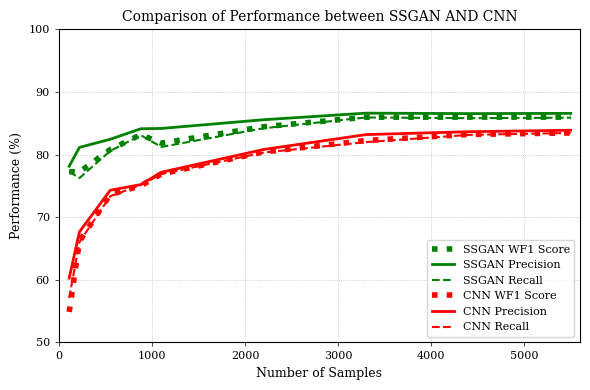

In [14]:
# Load results from JSON file and extract data
with open("results.json", "r") as f:
    results = json.load(f)

samples = sorted([int(s) for s in results["samples"].keys()])

ssgan_wf1_score = [results["samples"][str(s)]["GAN"]["Wf1_score"]*100 for s in samples]
ssgan_precision = [results["samples"][str(s)]["GAN"]["Wprecision"]*100 for s in samples]
ssgan_recall = [results["samples"][str(s)]["GAN"]["Wrecall"]*100 for s in samples]

cnn_wf1_score = [results["samples"][str(s)]["CNN"]["Wf1_score"]*100 for s in samples]
cnn_precision = [results["samples"][str(s)]["CNN"]["Wprecision"]*100 for s in samples]
cnn_recall = [results["samples"][str(s)]["CNN"]["Wrecall"]*100 for s in samples]

# Define plot settings
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=9)
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Performance (%)')
ax.set_xlim(0, max(samples)+100)
ax.set_ylim(50, 100)
ax.tick_params(axis='both', which='major', length=3, width=0.5)
ax.grid(True, linestyle=':', linewidth=0.5)

# Add data to the plot
ssgan_wf1 = ax.plot(samples, ssgan_wf1_score, color='green', linestyle='dotted', linewidth=4, label='SSGAN WF1 Score')
ssgan_prec = ax.plot(samples, ssgan_precision, color='green', linestyle='-', linewidth=2, label='SSGAN Precision')
ssgan_rec = ax.plot(samples, ssgan_recall, color='green', linestyle='--', linewidth=1.5, label='SSGAN Recall')
cnn_wf1 = ax.plot(samples, cnn_wf1_score, color='red', linestyle='dotted', linewidth=4, label='CNN WF1 Score')
cnn_prec = ax.plot(samples, cnn_precision, color='red', linestyle='-', linewidth=2, label='CNN Precision')
cnn_rec = ax.plot(samples, cnn_recall, color='red', linestyle='--', linewidth=1.5, label='CNN Recall')

# Add legend to the plot
ax.legend(fontsize=8, loc='lower right')
plt.title("Comparison of Performance between SSGAN AND CNN")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig('plot.pdf', dpi=1000)

# Show the plot
plt.show()


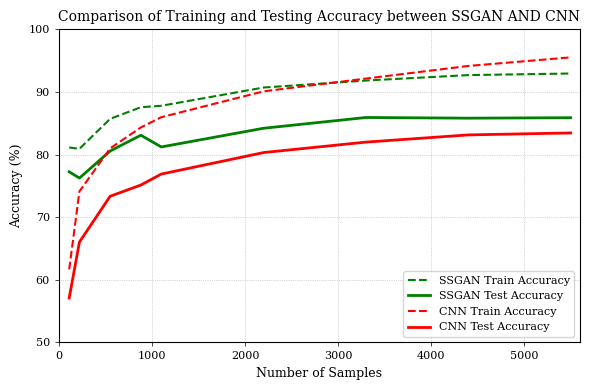

In [13]:
# Load results from JSON file and extract data
with open("results.json", "r") as f:
    results = json.load(f)

samples = sorted([int(s) for s in results["samples"].keys()])

ssgan_train_acc = [results["samples"][str(s)]["GAN"]["train_acc"]*100 for s in samples]
ssgan_test_acc  = [results["samples"][str(s)]["GAN"]["test_acc"]*100 for s in samples]

cnn_train_acc   = [results["samples"][str(s)]["CNN"]["train_acc"]*100 for s in samples]
cnn_test_acc    = [results["samples"][str(s)]["CNN"]["test_acc"]*100 for s in samples]

# Define plot settings
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=9)
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Accuracy (%)')
ax.set_xlim(0, max(samples)+100)
ax.set_ylim(50, 100)
ax.tick_params(axis='both', which='major', length=3, width=0.5)
ax.grid(True, linestyle=':', linewidth=0.5)

# Add data to the plot
ssgan_train = ax.plot(samples, ssgan_train_acc, color='green', linestyle='--', linewidth=1.5, label='SSGAN Train Accuracy')
ssgan_test = ax.plot(samples, ssgan_test_acc, color='green', linestyle='-', linewidth=2, label='SSGAN Test Accuracy')
cnn_train = ax.plot(samples, cnn_train_acc, color='red', linestyle='--', linewidth=1.5, label='CNN Train Accuracy')
cnn_test = ax.plot(samples, cnn_test_acc, color='red', linestyle='-', linewidth=2, label='CNN Test Accuracy')

# Add legend to the plot
ax.legend(fontsize=8, loc='lower right')
plt.title("Comparison of Training and Testing Accuracy between SSGAN AND CNN")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig('accuracy.pdf', dpi=1000)

# Show the plot
plt.show()
